<h1>Student Depression Classification</h1>

<h2>Life Cycle of Machine Learning Project</h2>

<ul>
    <li><b>Understanding the Problem Statement</b></li><br>
    <li><b>Data Collection</b></li><br>
    <li><b>Data Checks to Perform</b></li><br>
    <li><b>Exploratory Data Analysis</b></li><br>
    <li><b>Data Preprocessing</b></li><br>
    <li><b>Model Training</b></li><br>
    <li><b>Choose Best Model</b></li><br>
</ul>


<h3>1. Problem Statememt</h3>
<p>Develop a machine learning model to analyze and predict depression levels among students using demographic, academic, lifestyle, and mental health data, enabling early intervention strategies while ensuring ethical data handling.</p>

<h3>2. Data Collection</h3>
<p>The student depression dataset is in CSV format, where each row represents an individual student, and columns capture various demographic, academic, lifestyle, and mental health attributes.</p>

<p>Key features include <b>Age, Gender, City, CGPA, Sleep Duration, Profession, Work Pressure, Academic Pressure, Study Satisfaction, Job Satisfaction, and Dietary Habits</b>, among others.</p>

<p>The <b>target variable, Depression_Status</b>, is a binary classification (Yes/No) indicating whether a student shows signs of depression.</p>

<p>This dataset is valuable for analyzing factors contributing to student depression and developing predictive models for early intervention.</p>

<h3>Dataset Link</h3>
<p><a href="https://www.kaggle.com/datasets/hopesb/student-depression-dataset?select=Student+Depression+Dataset.csv" target="_blank">Click here to access the dataset</a></p>

<h3>2.1 Import Data and Required Packages</h3>
<p>Importing <b>Numpy, Pandas, Matplotlib, Seaborn and Warnings</b></p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

<h3>Load CSV data as pandas Dataframe</h3>

In [2]:
df = pd.read_csv("data/student_depression_dataset.csv")

<h3>Showing Top 5 and Bottom 5 ROWS</h3>

In [3]:
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [4]:
df.tail()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,'5-6 hours',Unhealthy,'Class 12',Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,'Less than 5 hours',Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,'5-6 hours',Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,'Less than 5 hours',Healthy,'Class 12',Yes,10.0,5.0,No,1
27900,140699,Male,27.0,Patna,Student,4.0,0.0,9.24,1.0,0.0,'Less than 5 hours',Healthy,BCA,Yes,2.0,3.0,Yes,1


<h3>Dataset Shape</h3>

In [5]:
df.shape

(27901, 18)

<h3>2.2 Dataset Information</h3>

In [6]:
## Description of the Dataset

df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,1.000000


In [7]:
df.describe(include='all')

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
count,27901.000000,27901,27901.000000,27901,27901,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901,27901,27901,27901,27901.000000,27901,27901,27901.000000
unique,NaN,2,NaN,52,14,NaN,NaN,NaN,NaN,NaN,5,4,28,2,NaN,6,2,NaN
top,NaN,Male,NaN,Kalyan,Student,NaN,NaN,NaN,NaN,NaN,'Less than 5 hours',Unhealthy,'Class 12',Yes,NaN,5.0,No,NaN
freq,NaN,15547,NaN,1570,27870,NaN,NaN,NaN,NaN,NaN,8310,10317,6080,17656,NaN,6715,14398,NaN
mean,70442.149421,NaN,25.822300,NaN,NaN,3.141214,0.000430,7.656104,2.943837,0.000681,NaN,NaN,NaN,NaN,7.156984,NaN,NaN,0.585499
std,40641.175216,NaN,4.905687,NaN,NaN,1.381465,0.043992,1.470707,1.361148,0.044394,NaN,NaN,NaN,NaN,3.707642,NaN,NaN,0.492645
min,2.000000,NaN,18.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000
25%,35039.000000,NaN,21.000000,NaN,NaN,2.000000,0.000000,6.290000,2.000000,0.000000,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,0.000000
50%,70684.000000,NaN,25.000000,NaN,NaN,3.000000,0.000000,7.770000,3.000000,0.000000,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,1.000000
75%,105818.000000,NaN,30.000000,NaN,NaN,4.000000,0.000000,8.920000,4.000000,0.000000,NaN,NaN,NaN,NaN,10.000000,NaN,NaN,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [9]:
columns = df.columns
columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [10]:
columns.value_counts()

id                                       1
Gender                                   1
Family History of Mental Illness         1
Financial Stress                         1
Work/Study Hours                         1
Have you ever had suicidal thoughts ?    1
Degree                                   1
Dietary Habits                           1
Sleep Duration                           1
Job Satisfaction                         1
Study Satisfaction                       1
CGPA                                     1
Work Pressure                            1
Academic Pressure                        1
Profession                               1
City                                     1
Age                                      1
Depression                               1
Name: count, dtype: int64

In [11]:
df['Gender'].unique()
print(df['Gender'].value_counts())

Gender
Male      15547
Female    12354
Name: count, dtype: int64


In [12]:
df['Family History of Mental Illness'].unique()
print(df['Family History of Mental Illness'].value_counts())

Family History of Mental Illness
No     14398
Yes    13503
Name: count, dtype: int64


In [13]:
print(df['Financial Stress'].unique())
print(df['Financial Stress'].value_counts())

['1.0' '2.0' '5.0' '3.0' '4.0' '?']
Financial Stress
5.0    6715
4.0    5775
3.0    5226
1.0    5121
2.0    5061
?         3
Name: count, dtype: int64


In [14]:
df['Work/Study Hours'].unique()

array([ 3.,  9.,  4.,  1.,  0., 12.,  2., 11., 10.,  6.,  8.,  5.,  7.])

In [15]:
df['Have you ever had suicidal thoughts ?'].unique()
print(df['Have you ever had suicidal thoughts ?'].value_counts())

Have you ever had suicidal thoughts ?
Yes    17656
No     10245
Name: count, dtype: int64


In [16]:
print(df['Degree'].unique())
print(df['Degree'].value_counts())

['B.Pharm' 'BSc' 'BA' 'BCA' 'M.Tech' 'PhD' "'Class 12'" 'B.Ed' 'LLB' 'BE'
 'M.Ed' 'MSc' 'BHM' 'M.Pharm' 'MCA' 'MA' 'B.Com' 'MD' 'MBA' 'MBBS' 'M.Com'
 'B.Arch' 'LLM' 'B.Tech' 'BBA' 'ME' 'MHM' 'Others']
Degree
'Class 12'    6080
B.Ed          1867
B.Com         1506
B.Arch        1478
BCA           1433
MSc           1190
B.Tech        1152
MCA           1044
M.Tech        1022
BHM            925
BSc            888
M.Ed           821
B.Pharm        810
M.Com          734
MBBS           696
BBA            696
LLB            671
BE             613
BA             600
M.Pharm        582
MD             572
MBA            562
MA             544
PhD            522
LLM            482
MHM            191
ME             185
Others          35
Name: count, dtype: int64


In [17]:
df['Dietary Habits'].unique()

array(['Healthy', 'Moderate', 'Unhealthy', 'Others'], dtype=object)

In [18]:
df['Dietary Habits'].value_counts()

Dietary Habits
Unhealthy    10317
Moderate      9921
Healthy       7651
Others          12
Name: count, dtype: int64

In [19]:
df['Sleep Duration'].unique()

array(["'5-6 hours'", "'Less than 5 hours'", "'7-8 hours'",
       "'More than 8 hours'", 'Others'], dtype=object)

In [20]:
df['Sleep Duration'].value_counts()

Sleep Duration
'Less than 5 hours'    8310
'7-8 hours'            7346
'5-6 hours'            6183
'More than 8 hours'    6044
Others                   18
Name: count, dtype: int64

In [21]:
df['Job Satisfaction'].unique()

array([0., 3., 4., 2., 1.])

In [22]:
df['Study Satisfaction'].unique()

array([2., 5., 3., 4., 1., 0.])

In [23]:
df['CGPA'].unique()

array([ 8.97  ,  5.9   ,  7.03  ,  5.59  ,  8.13  ,  5.7   ,  9.54  ,
        8.04  ,  9.79  ,  8.38  ,  6.1   ,  7.04  ,  8.52  ,  5.64  ,
        8.58  ,  6.51  ,  7.25  ,  7.83  ,  9.93  ,  8.74  ,  6.73  ,
        5.57  ,  8.59  ,  7.1   ,  6.08  ,  5.74  ,  9.86  ,  6.7   ,
        6.21  ,  5.87  ,  6.37  ,  9.72  ,  5.88  ,  9.56  ,  6.99  ,
        5.24  ,  9.21  ,  7.85  ,  6.95  ,  5.86  ,  7.92  ,  9.66  ,
        8.94  ,  9.71  ,  7.87  ,  5.6   ,  7.9   ,  5.46  ,  6.79  ,
        8.7   ,  7.38  ,  8.5   ,  7.09  ,  9.82  ,  8.89  ,  7.94  ,
        9.11  ,  6.75  ,  7.53  ,  9.49  ,  9.01  ,  7.64  ,  5.27  ,
        6.    ,  9.44  ,  5.75  ,  7.51  ,  9.05  ,  6.38  ,  8.95  ,
        9.88  ,  5.32  ,  6.27  ,  7.7   ,  8.1   ,  9.59  ,  8.96  ,
        5.51  ,  7.43  ,  8.79  ,  9.95  ,  5.37  ,  6.86  ,  8.32  ,
        9.74  ,  5.66  ,  7.48  ,  8.23  ,  8.81  ,  6.03  ,  5.56  ,
        5.68  ,  5.14  ,  7.61  ,  6.17  ,  8.17  ,  9.87  ,  8.75  ,
        6.16  ,  9.5

In [24]:
df['Work Pressure'].unique()

array([0., 5., 2.])

In [25]:
df['Academic Pressure'].unique()

array([5., 2., 3., 4., 1., 0.])

In [26]:
df['Profession'].unique()

array(['Student', "'Civil Engineer'", 'Architect', "'UX/UI Designer'",
       "'Digital Marketer'", "'Content Writer'",
       "'Educational Consultant'", 'Teacher', 'Manager', 'Chef', 'Doctor',
       'Lawyer', 'Entrepreneur', 'Pharmacist'], dtype=object)

In [27]:
df['Profession'].value_counts()

Profession
Student                     27870
Architect                       8
Teacher                         6
'Digital Marketer'              3
'Content Writer'                2
Chef                            2
Doctor                          2
Pharmacist                      2
'Civil Engineer'                1
'UX/UI Designer'                1
'Educational Consultant'        1
Manager                         1
Lawyer                          1
Entrepreneur                    1
Name: count, dtype: int64

In [28]:
df['City'].unique()

array(['Visakhapatnam', 'Bangalore', 'Srinagar', 'Varanasi', 'Jaipur',
       'Pune', 'Thane', 'Chennai', 'Nagpur', 'Nashik', 'Vadodara',
       'Kalyan', 'Rajkot', 'Ahmedabad', 'Kolkata', 'Mumbai', 'Lucknow',
       'Indore', 'Surat', 'Ludhiana', 'Bhopal', 'Meerut', 'Agra',
       'Ghaziabad', 'Hyderabad', 'Vasai-Virar', 'Kanpur', 'Patna',
       'Faridabad', 'Delhi', 'Saanvi', 'M.Tech', 'Bhavna', "'Less Delhi'",
       'City', '3.0', "'Less than 5 Kalyan'", 'Mira', 'Harsha', 'Vaanya',
       'Gaurav', 'Harsh', 'Reyansh', 'Kibara', 'Rashi', 'ME', 'M.Com',
       'Nalyan', 'Mihir', 'Nalini', 'Nandini', 'Khaziabad'], dtype=object)

In [29]:
df['City'].value_counts()

City
Kalyan                  1570
Srinagar                1372
Hyderabad               1340
Vasai-Virar             1290
Lucknow                 1155
Thane                   1139
Ludhiana                1111
Agra                    1094
Surat                   1078
Kolkata                 1066
Jaipur                  1036
Patna                   1007
Visakhapatnam            969
Pune                     968
Ahmedabad                951
Bhopal                   934
Chennai                  885
Meerut                   825
Rajkot                   816
Delhi                    768
Bangalore                767
Ghaziabad                745
Mumbai                   699
Vadodara                 694
Varanasi                 685
Nagpur                   651
Indore                   643
Kanpur                   609
Nashik                   547
Faridabad                461
Saanvi                     2
Bhavna                     2
City                       2
Harsha                     2
Kibara   

In [30]:
df['Age'].unique()

array([33., 24., 31., 28., 25., 29., 30., 27., 19., 20., 23., 18., 21.,
       22., 34., 32., 26., 39., 35., 42., 36., 58., 49., 38., 51., 44.,
       43., 46., 59., 54., 48., 56., 37., 41.])

In [31]:
df['Depression'].unique()

array([1, 0], dtype=int64)

<h3>Retriving the Numerical Columns</h3>

In [32]:
numerical_columns = df.select_dtypes(include = ['number']).columns.tolist()
print(numerical_columns)

['id', 'Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours', 'Depression']


<h3>Retriving the Categorical Columns</h3>

In [33]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print(categorical_columns)

['Gender', 'City', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Financial Stress', 'Family History of Mental Illness']


<h3>3. Data Checks to Perform</h3>

<ul>
    <li><b>Check Missing Values</b></li><br>
    <li><b>Check Duplicates</b></li><br>
    <li><b>Check Data Type</b></li><br>
    <li><b>Check the Number of Unique Values of Each Column</b></li><br>
    <li><b>Check Statistics of Dataset</b></li><br>
    <li><b>Check Various Categories Present in Different Categorical Columns</b></li><br>
</ul>


<h3>3.1 Checking Missing Values</h3>

In [34]:
df.isnull()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
27897,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
27898,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
27899,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [35]:
df.isna().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [36]:
df.isna().any()

id                                       False
Gender                                   False
Age                                      False
City                                     False
Profession                               False
Academic Pressure                        False
Work Pressure                            False
CGPA                                     False
Study Satisfaction                       False
Job Satisfaction                         False
Sleep Duration                           False
Dietary Habits                           False
Degree                                   False
Have you ever had suicidal thoughts ?    False
Work/Study Hours                         False
Financial Stress                         False
Family History of Mental Illness         False
Depression                               False
dtype: bool

In [37]:
# Check for empty strings ("") or spaces instead of NaN

(df == " ").sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [38]:
df.isin(["NA", "null", "-", "?"]).sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64

<p>I found the 3 missing values "?" in financial stress categorical column</p>

In [39]:
# Now Handling Missing values

## first Replace "?" with NaN
df['Financial Stress'].replace("?", np.nan, inplace=True)

# Filling the null values its a categorical column so filling with mode
df['Financial Stress'].fillna(df['Financial Stress'].mode()[0], inplace=True)

# convert to numeric
df['Financial Stress'] = df['Financial Stress'].astype(float)

In [40]:
df.isin(["NA", "null", "-", "?"]).sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [41]:
df['Financial Stress'].unique()
print(df['Financial Stress'].value_counts())

Financial Stress
5.0    6718
4.0    5775
3.0    5226
1.0    5121
2.0    5061
Name: count, dtype: int64


<h3>3.2 Checking Duplicate values</h3>

In [42]:
df.duplicated().sum()

0

<h3>3.3 Checking Data types</h3>

In [43]:
df.dtypes

id                                         int64
Gender                                    object
Age                                      float64
City                                      object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                         float64
Family History of Mental Illness          object
Depression                                 int64
dtype: object

<h3>3.4 Check the Number of unique values of each column</h3>

In [44]:
df.nunique()

id                                       27901
Gender                                       2
Age                                         34
City                                        52
Profession                                  14
Academic Pressure                            6
Work Pressure                                3
CGPA                                       332
Study Satisfaction                           6
Job Satisfaction                             5
Sleep Duration                               5
Dietary Habits                               4
Degree                                      28
Have you ever had suicidal thoughts ?        2
Work/Study Hours                            13
Financial Stress                             5
Family History of Mental Illness             2
Depression                                   2
dtype: int64

<h3>3.5 check statistics of dataset</h3>

In [45]:
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,3.140067,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,1.437399,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


<h3>3.6 Check Various Categories Present in Different Categorical Columns</h3>

In [46]:
for column in columns:
    print(column)
    print(df[column].unique())

id
[     2      8     26 ... 140689 140690 140699]
Gender
['Male' 'Female']
Age
[33. 24. 31. 28. 25. 29. 30. 27. 19. 20. 23. 18. 21. 22. 34. 32. 26. 39.
 35. 42. 36. 58. 49. 38. 51. 44. 43. 46. 59. 54. 48. 56. 37. 41.]
City
['Visakhapatnam' 'Bangalore' 'Srinagar' 'Varanasi' 'Jaipur' 'Pune' 'Thane'
 'Chennai' 'Nagpur' 'Nashik' 'Vadodara' 'Kalyan' 'Rajkot' 'Ahmedabad'
 'Kolkata' 'Mumbai' 'Lucknow' 'Indore' 'Surat' 'Ludhiana' 'Bhopal'
 'Meerut' 'Agra' 'Ghaziabad' 'Hyderabad' 'Vasai-Virar' 'Kanpur' 'Patna'
 'Faridabad' 'Delhi' 'Saanvi' 'M.Tech' 'Bhavna' "'Less Delhi'" 'City'
 '3.0' "'Less than 5 Kalyan'" 'Mira' 'Harsha' 'Vaanya' 'Gaurav' 'Harsh'
 'Reyansh' 'Kibara' 'Rashi' 'ME' 'M.Com' 'Nalyan' 'Mihir' 'Nalini'
 'Nandini' 'Khaziabad']
Profession
['Student' "'Civil Engineer'" 'Architect' "'UX/UI Designer'"
 "'Digital Marketer'" "'Content Writer'" "'Educational Consultant'"
 'Teacher' 'Manager' 'Chef' 'Doctor' 'Lawyer' 'Entrepreneur' 'Pharmacist']
Academic Pressure
[5. 2. 3. 4. 1. 0.]
Work P

In [47]:
from scipy.stats import chi2_contingency

# Define a function to compute the chi-square test
def chi_square_test(df, column, target='Depression'):
    contingency_table = pd.crosstab(df[column], df[target])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    return p  # p-value

# Check correlation of categorical variables with Depression
columns_to_check = ['City', 'Academic Pressure', 'Work Pressure', 'Study Satisfaction', 'Job Satisfaction']
chi_square_results = {col: chi_square_test(df, col) for col in columns_to_check}

# Print results
for col, p_value in chi_square_results.items():
    print(f"Chi-Square p-value for {col} vs Depression: {p_value}")


Chi-Square p-value for City vs Depression: 1.4718284584775762e-17
Chi-Square p-value for Academic Pressure vs Depression: 0.0
Chi-Square p-value for Work Pressure vs Depression: 0.4788192767997911
Chi-Square p-value for Study Satisfaction vs Depression: 2.4483608651299193e-169
Chi-Square p-value for Job Satisfaction vs Depression: 0.806178200196884


In [48]:
import numpy as np

# Function to calculate Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

# Apply Cramér's V to check correlation strength
cramer_results = {col: cramers_v(df[col], df['Depression']) for col in ['City', 'Academic Pressure', 'Work Pressure', 'Study Satisfaction', 'Job Satisfaction']}

# Print results
for col, value in cramer_results.items():
    print(f"Cramér's V for {col} vs Depression: {value}")


Cramér's V for City vs Depression: 0.08207193569881106
Cramér's V for Academic Pressure vs Depression: 0.47995739283249844
Cramér's V for Work Pressure vs Depression: 0.0072655994628677036
Cramér's V for Study Satisfaction vs Depression: 0.1686807322239128
Cramér's V for Job Satisfaction vs Depression: 0.007606997057669841


<h3>Droping unwnated columns</h3>

In [49]:
df.drop(columns = ['id', 'City'], inplace = True)

In [50]:
## Numerical Columns
df_numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
df_numerical_columns

['Age',
 'Academic Pressure',
 'Work Pressure',
 'CGPA',
 'Study Satisfaction',
 'Job Satisfaction',
 'Work/Study Hours',
 'Financial Stress',
 'Depression']

In [51]:
## Categorical Columns
df_categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
df_categorical_columns

['Gender',
 'Profession',
 'Sleep Duration',
 'Dietary Habits',
 'Degree',
 'Have you ever had suicidal thoughts ?',
 'Family History of Mental Illness']

In [52]:
df.head()

,Gender,Age,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [53]:
df.shape

(27901, 16)

<h3>4. Exploare Data through Visualization</h3>

**Univariate Numerical Column Analysis**

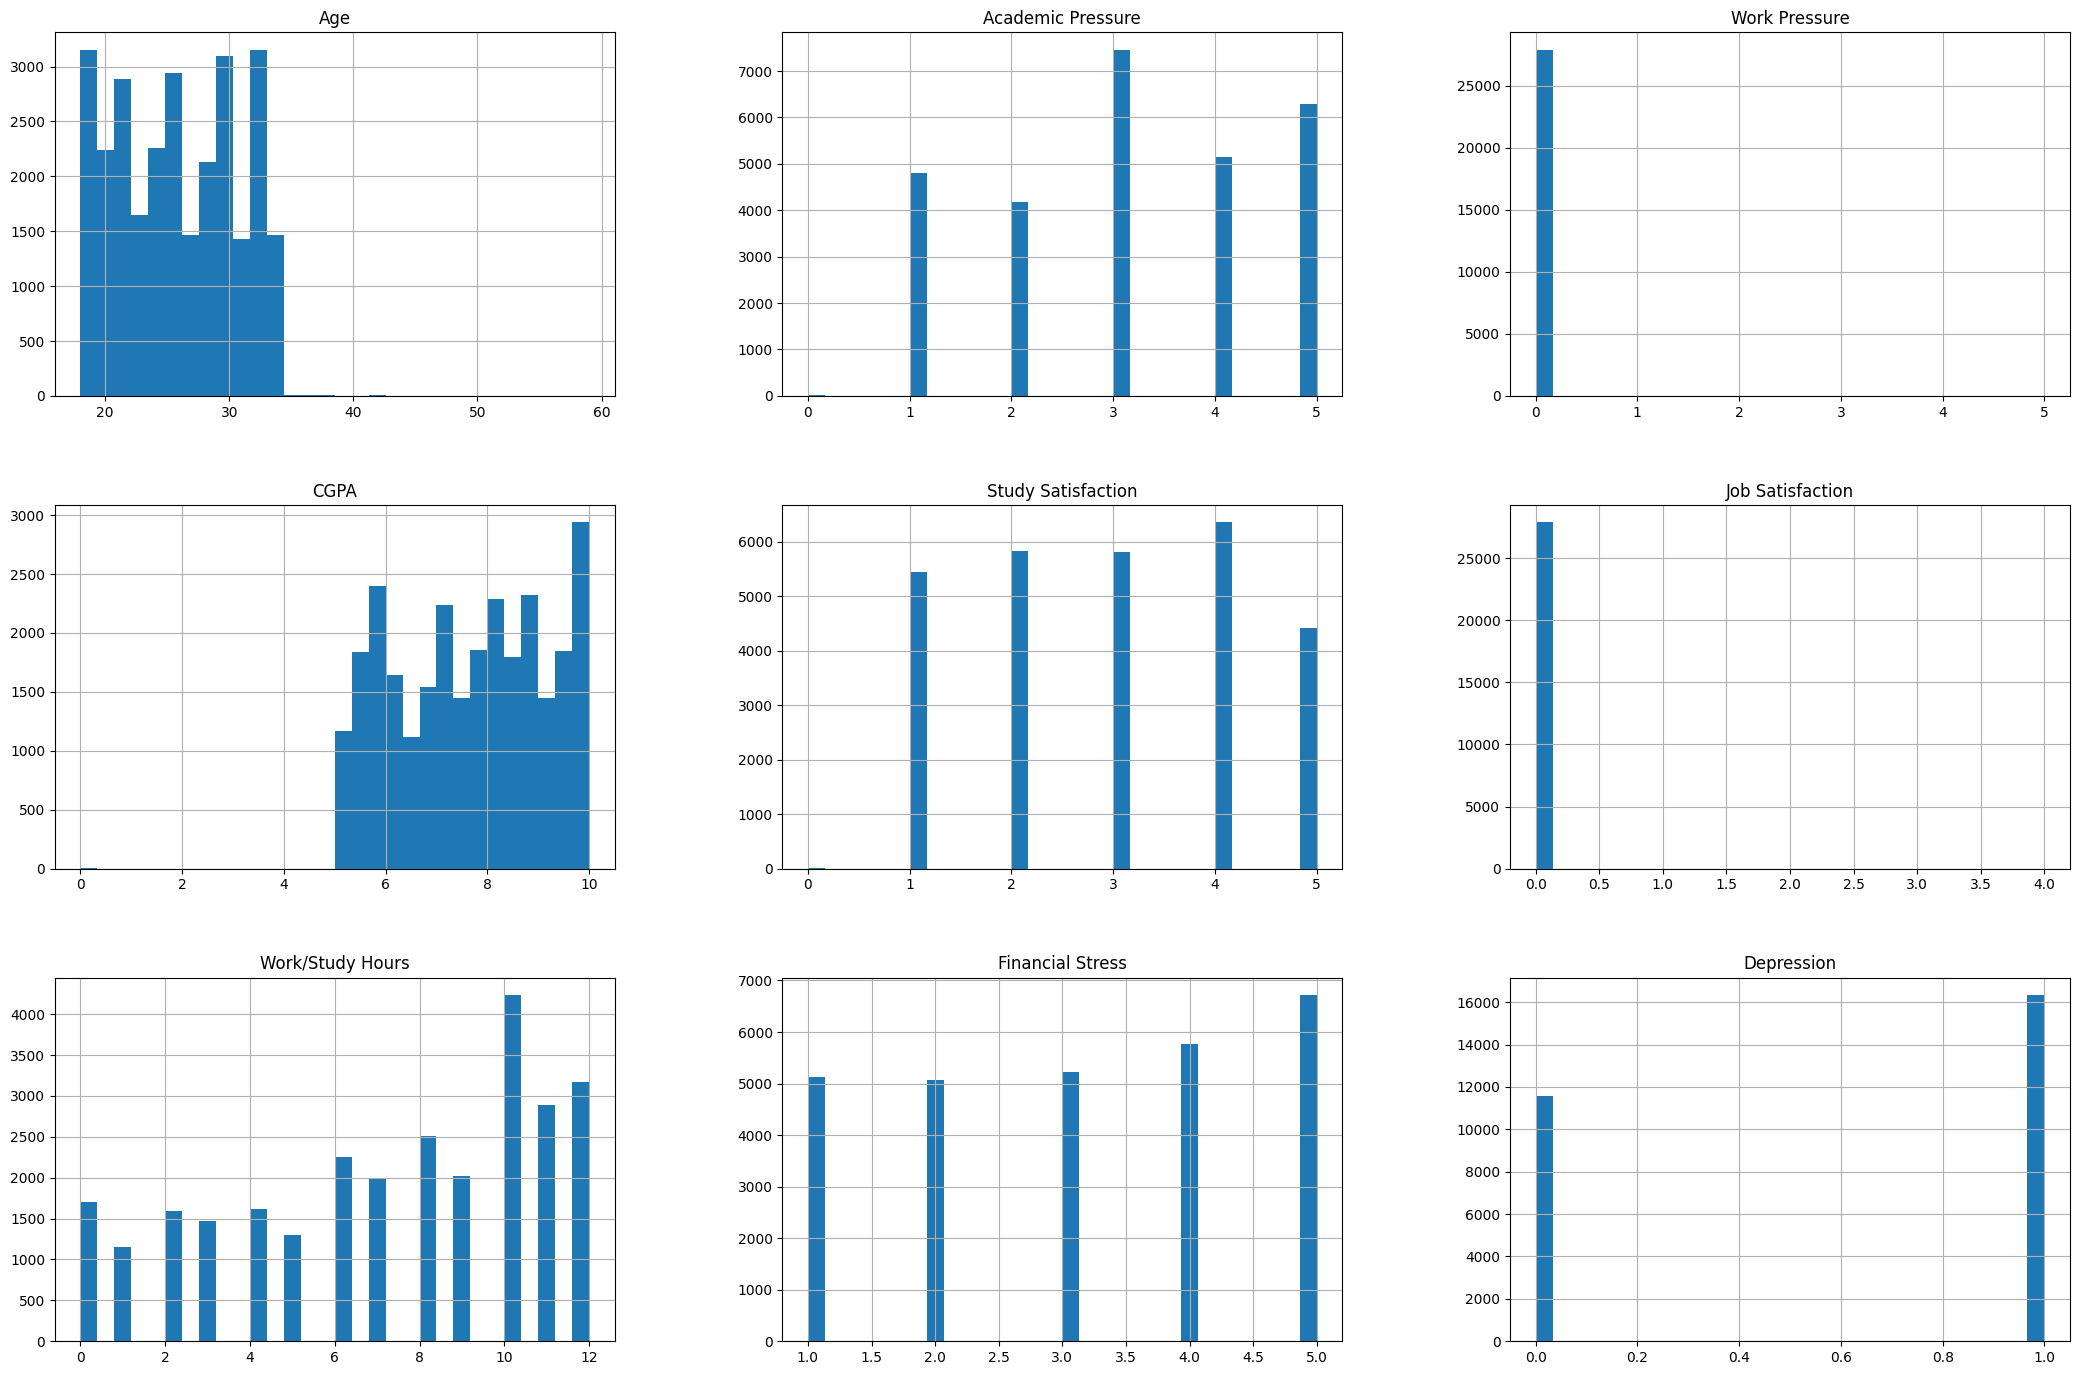

In [54]:
# histoplot for numerical columns
df.hist(figsize=(26, 17), bins=30)
plt.show()

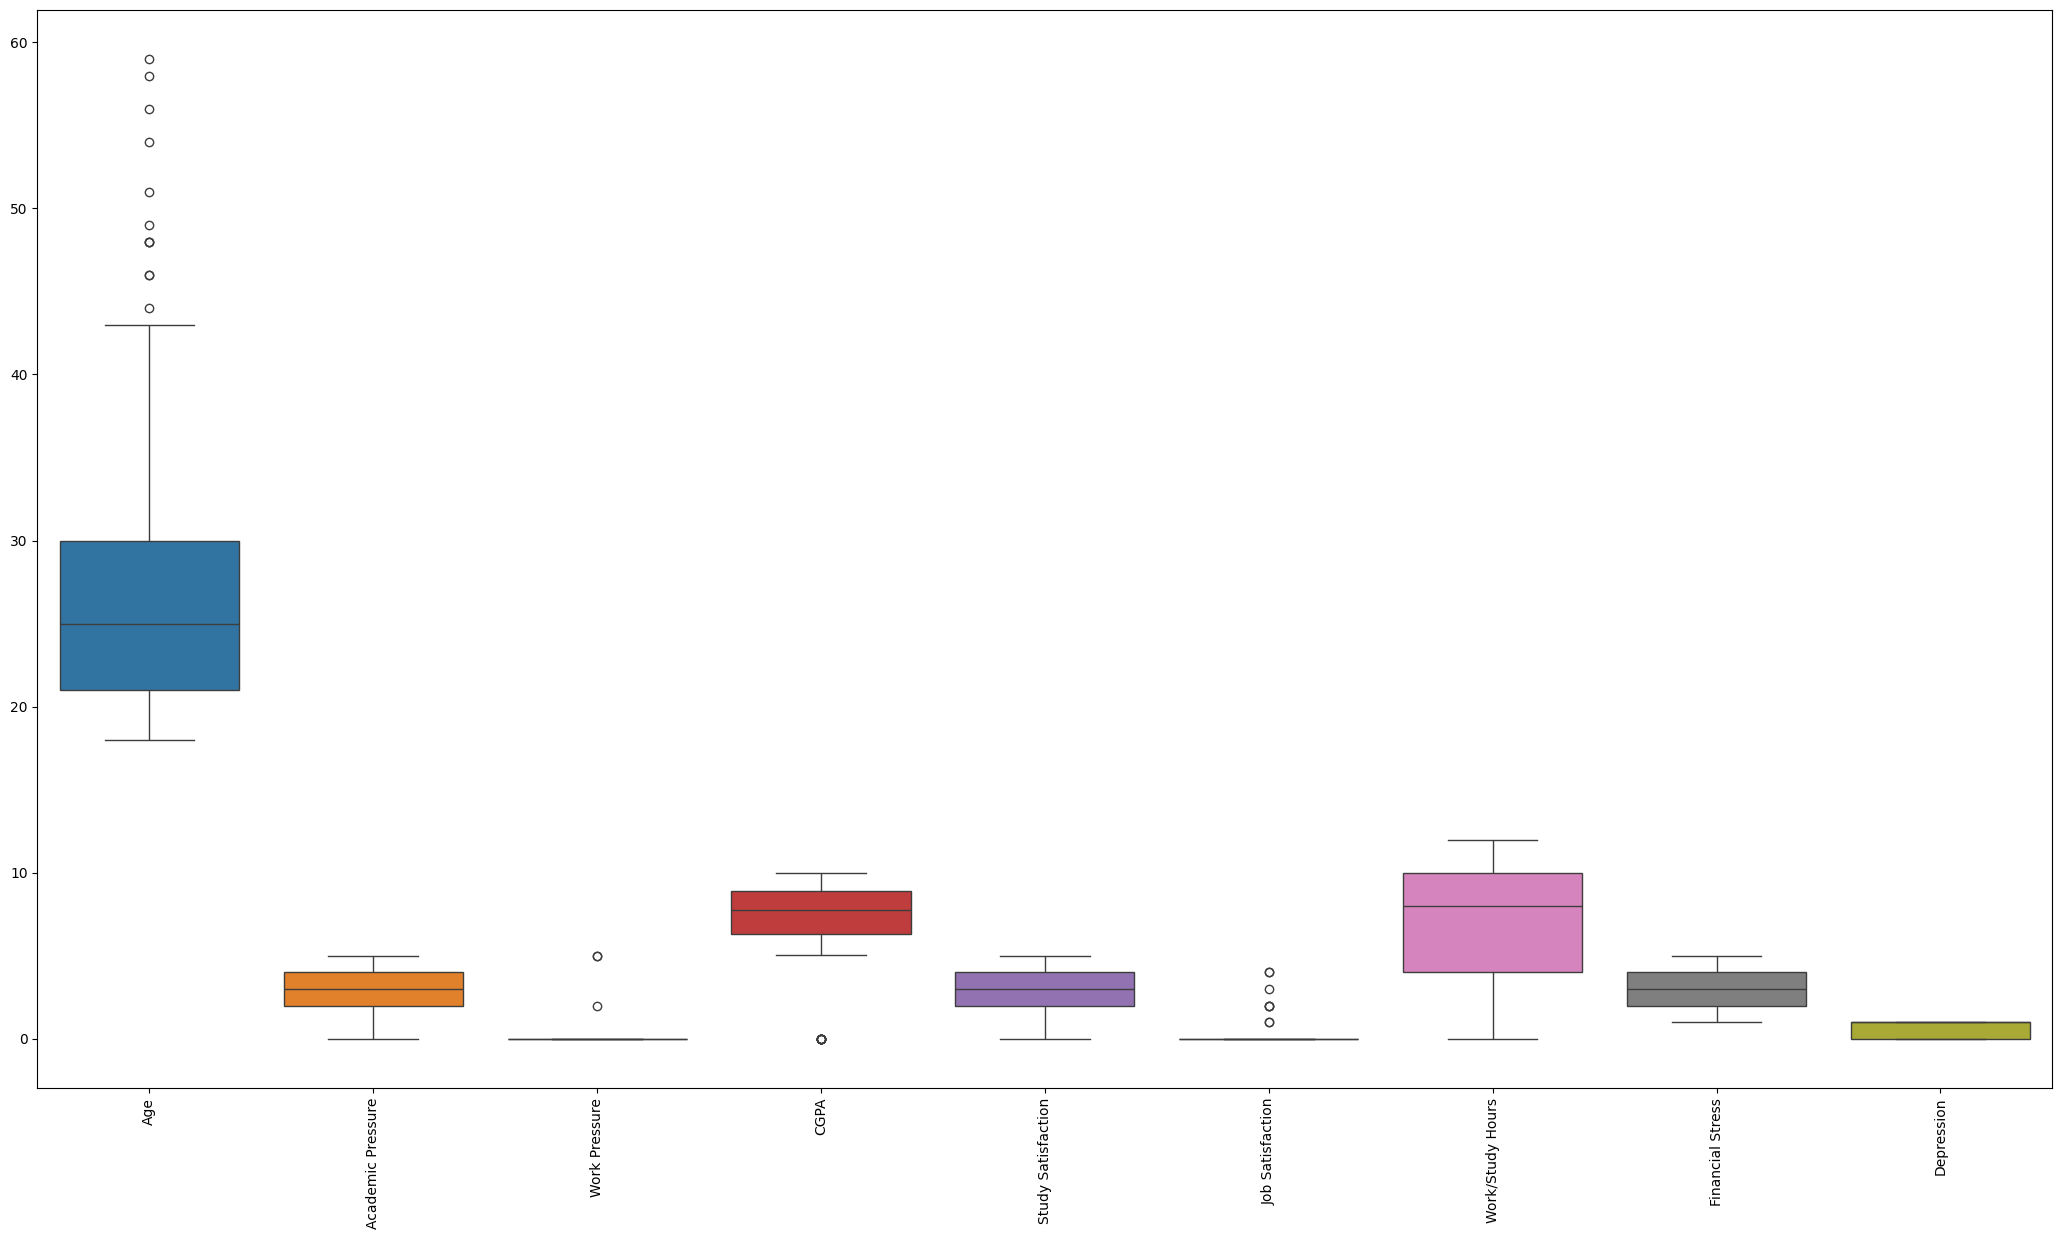

In [55]:
# Boxplot for Outliers
plt.figure(figsize=(26, 14))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

<h3>4.1 Visualize Depression distribution to make some conclusion.</h3>

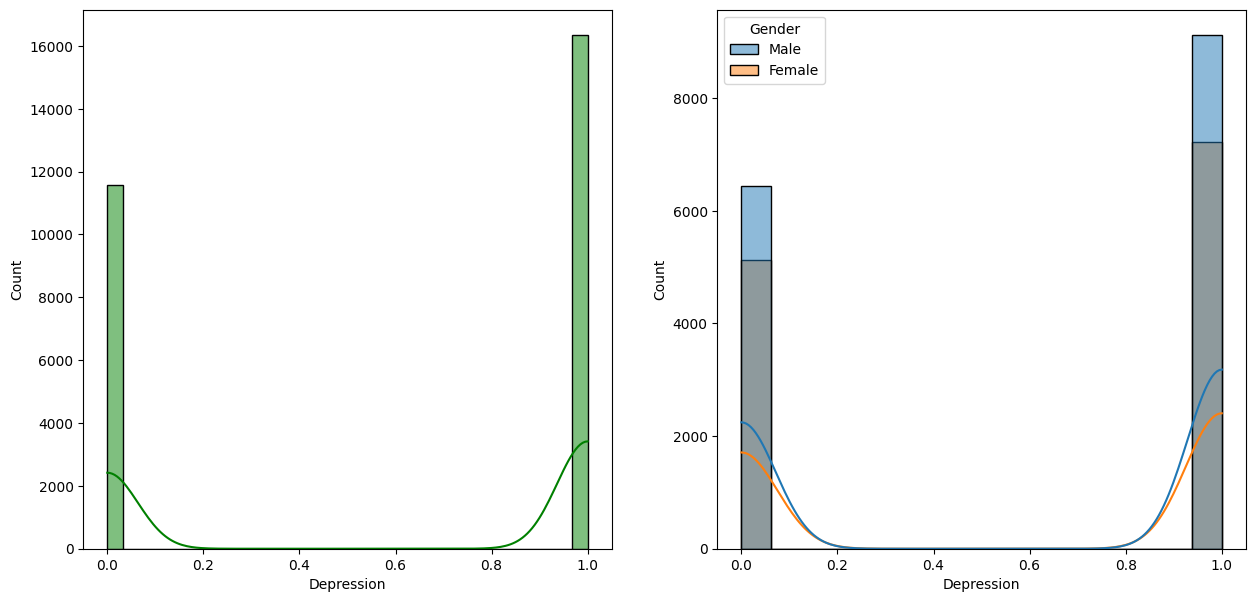

In [56]:
# Depression with respect to Gender
fig, axes = plt.subplots(1, 2, figsize = (15, 7))
plt.subplot(121)
sns.histplot(data=df, x='Depression', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='Depression', kde=True, hue='Gender')
plt.show()

<b>Insights</b>
  <p>Male Candidates are more Depressed then Female Candidates</p>

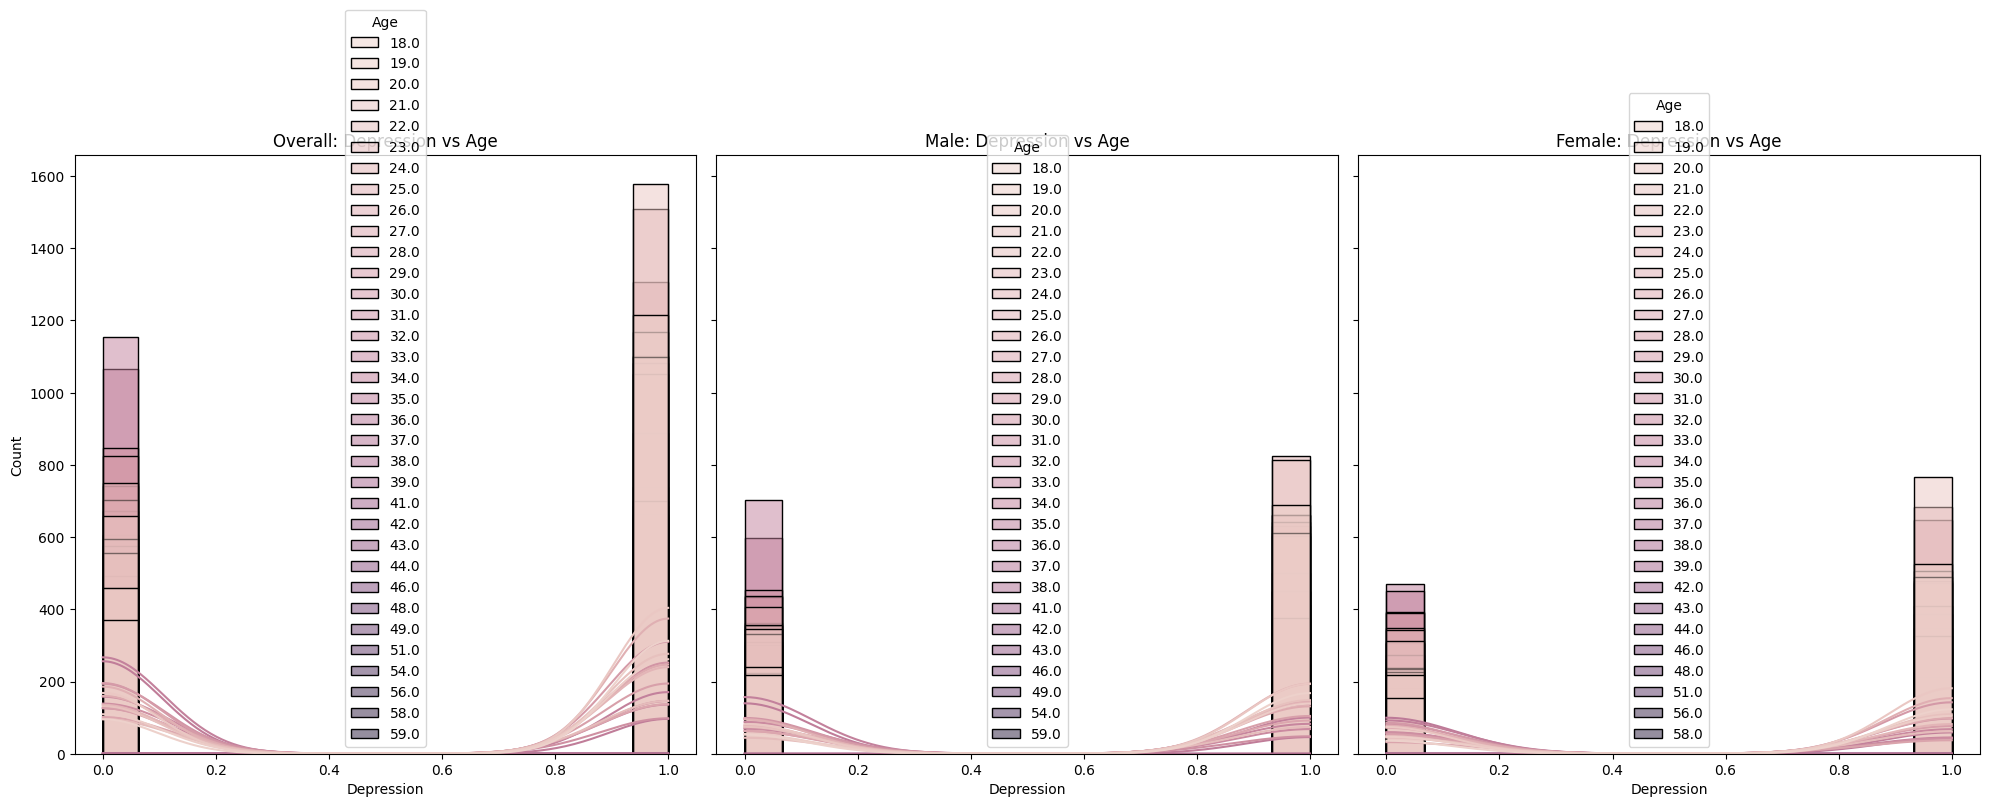

In [57]:
# Overall: Depression vs Age
fig, axes = plt.subplots(1, 3, figsize=(20, 8), sharey=True)  # Adjust size and share y-axis

# Overall distribution
sns.histplot(data=df, x='Depression', kde=True, hue='Age', ax=axes[0])
axes[0].set_title("Overall: Depression vs Age")

# Male distribution
sns.histplot(data=df[df.Gender == 'Male'], x='Depression', kde=True, hue='Age', ax=axes[1])
axes[1].set_title("Male: Depression vs Age")

# Female distribution
sns.histplot(data=df[df.Gender == 'Female'], x='Depression', kde=True, hue='Age', ax=axes[2])
axes[2].set_title("Female: Depression vs Age")

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

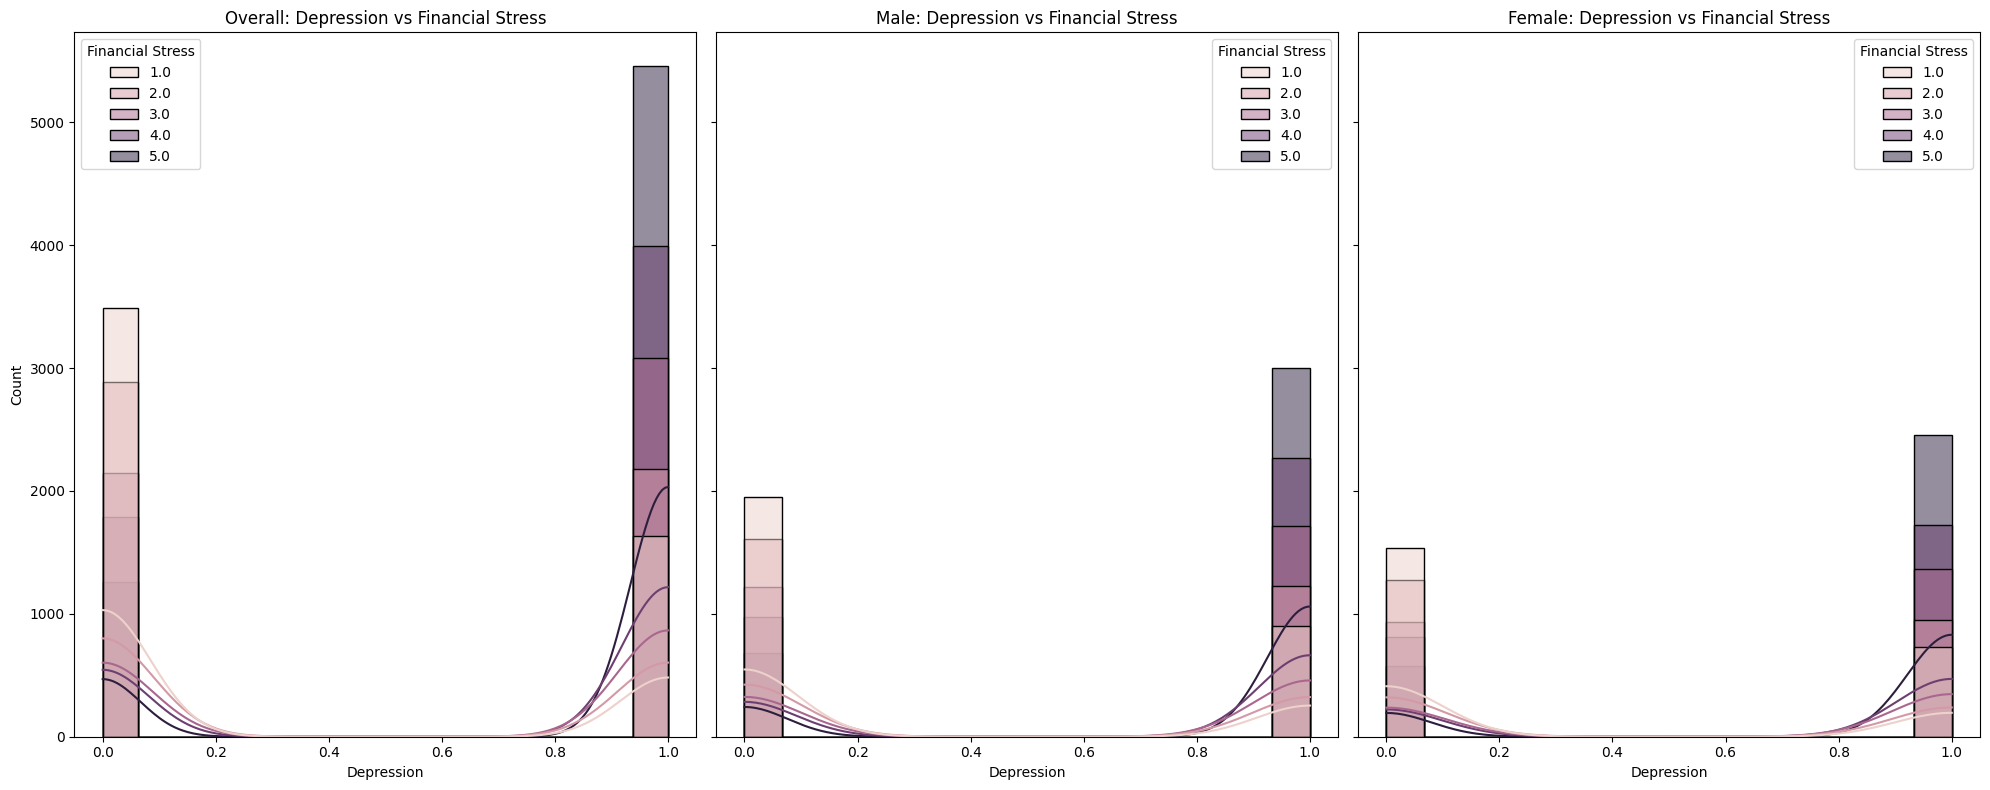

In [58]:
# Overall: Depression vs Financial Stress
fig, axes = plt.subplots(1, 3, figsize=(20, 8), sharey=True)  # Adjust figure size and share y-axis

# Overall distribution
sns.histplot(data=df, x='Depression', kde=True, hue='Financial Stress', ax=axes[0])
axes[0].set_title("Overall: Depression vs Financial Stress")

# Male distribution
sns.histplot(data=df[df.Gender == 'Male'], x='Depression', kde=True, hue='Financial Stress', ax=axes[1])
axes[1].set_title("Male: Depression vs Financial Stress")

# Female distribution
sns.histplot(data=df[df.Gender == 'Female'], x='Depression', kde=True, hue='Financial Stress', ax=axes[2])
axes[2].set_title("Female: Depression vs Financial Stress")

plt.tight_layout()  # Adjust spacing
plt.show()

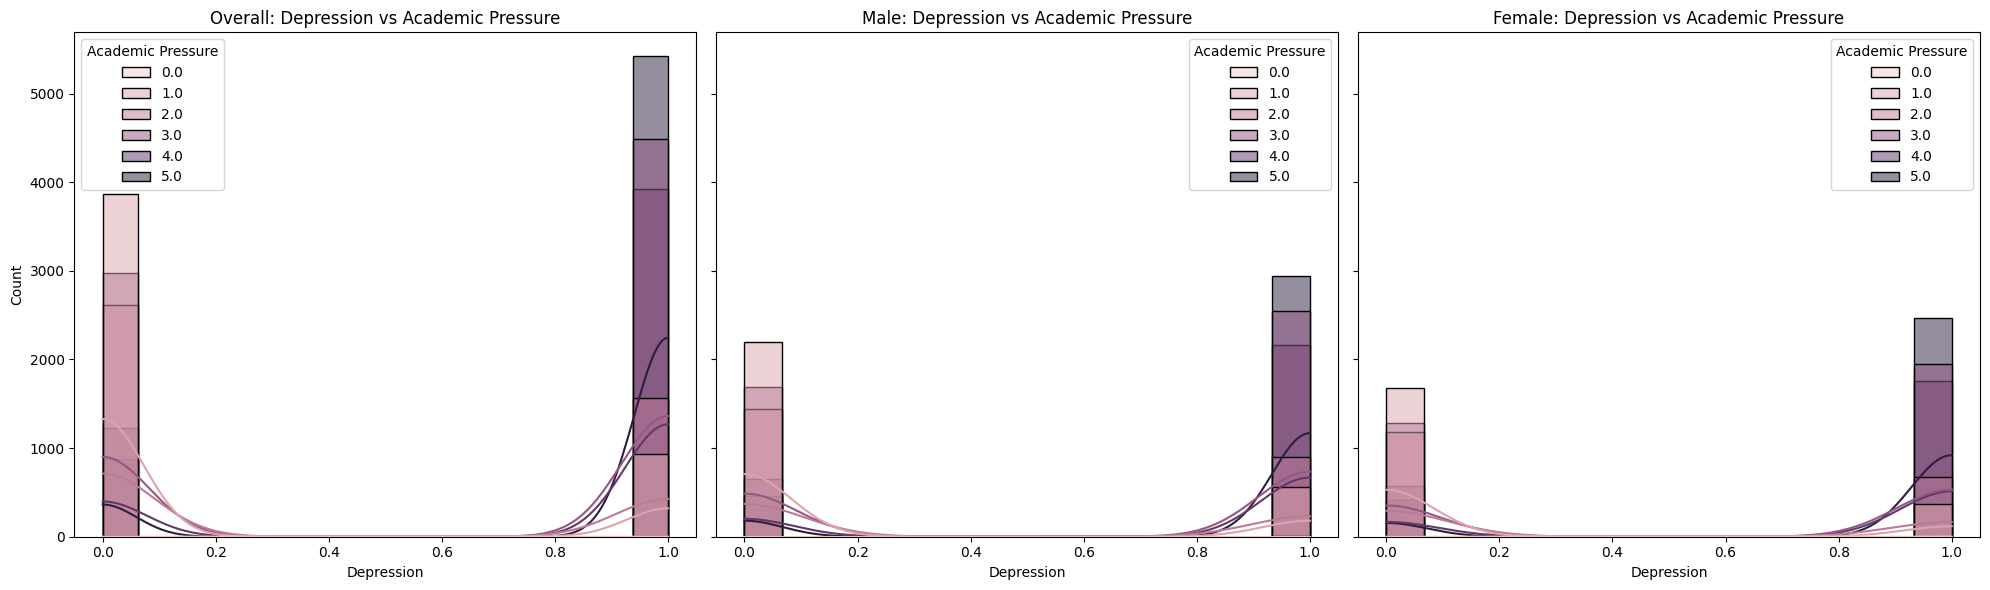

In [59]:
# Overall: Depression vs Academic Pressure
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)  # Ensure shared y-axis

# Overall distribution
sns.histplot(data=df, x='Depression', kde=True, hue='Academic Pressure', ax=axes[0])
axes[0].set_title("Overall: Depression vs Academic Pressure")

# Male distribution
sns.histplot(data=df[df.Gender == 'Male'], x='Depression', kde=True, hue='Academic Pressure', ax=axes[1])
axes[1].set_title("Male: Depression vs Academic Pressure")

# Female distribution
sns.histplot(data=df[df.Gender == 'Female'], x='Depression', kde=True, hue='Academic Pressure', ax=axes[2])
axes[2].set_title("Female: Depression vs Academic Pressure")

plt.tight_layout()  # Adjust spacing
plt.show()


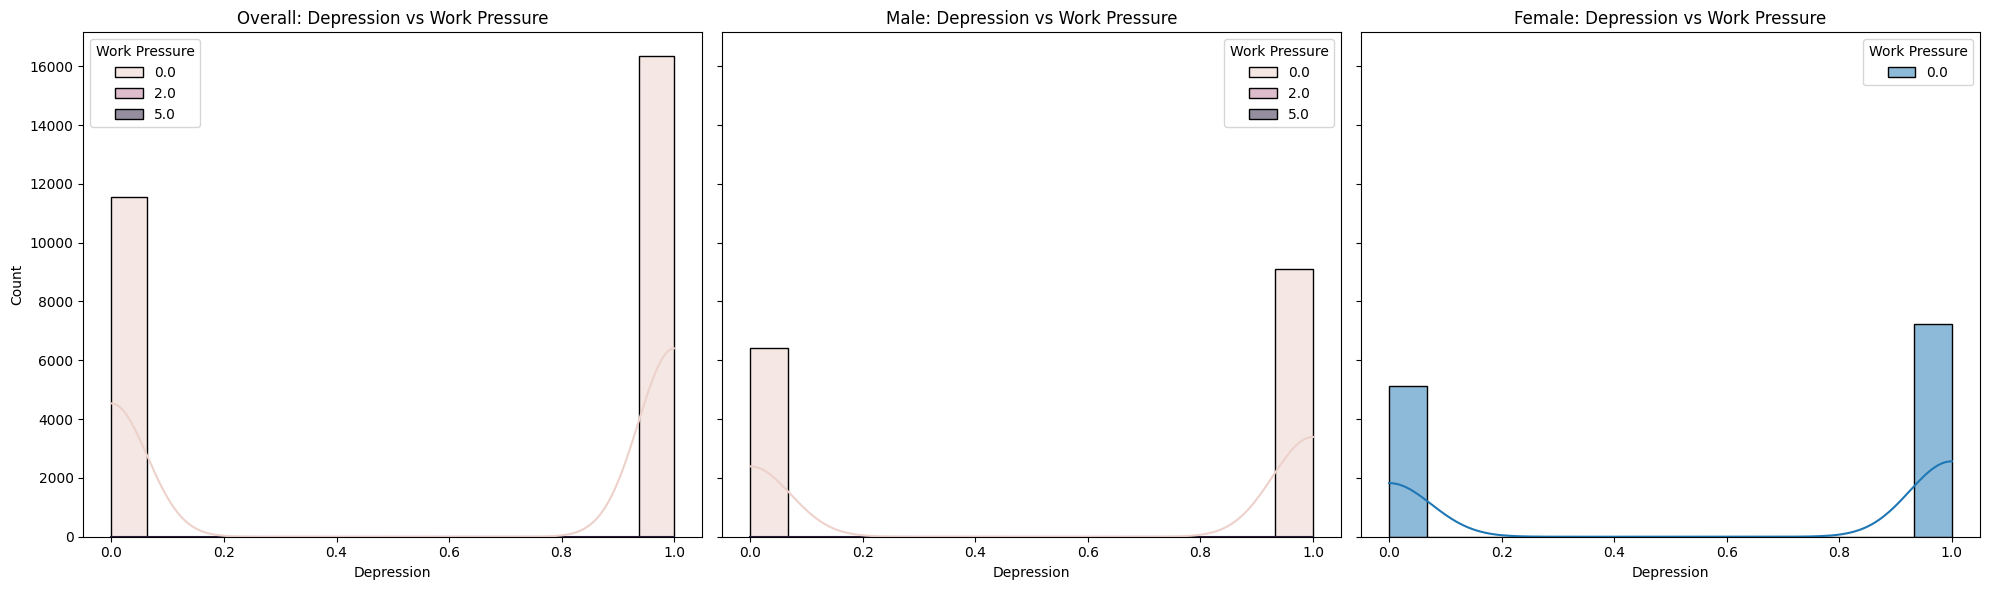

In [60]:
# Overall: Depression vs Work Pressure
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)  # Ensure shared y-axis

# Overall distribution
sns.histplot(data=df, x='Depression', kde=True, hue='Work Pressure', ax=axes[0])
axes[0].set_title("Overall: Depression vs Work Pressure")

# Male distribution
sns.histplot(data=df[df.Gender == 'Male'], x='Depression', kde=True, hue='Work Pressure', ax=axes[1])
axes[1].set_title("Male: Depression vs Work Pressure")

# Female distribution
sns.histplot(data=df[df.Gender == 'Female'], x='Depression', kde=True, hue='Work Pressure', ax=axes[2])
axes[2].set_title("Female: Depression vs Work Pressure")

plt.tight_layout()  # Adjust spacing
plt.show()


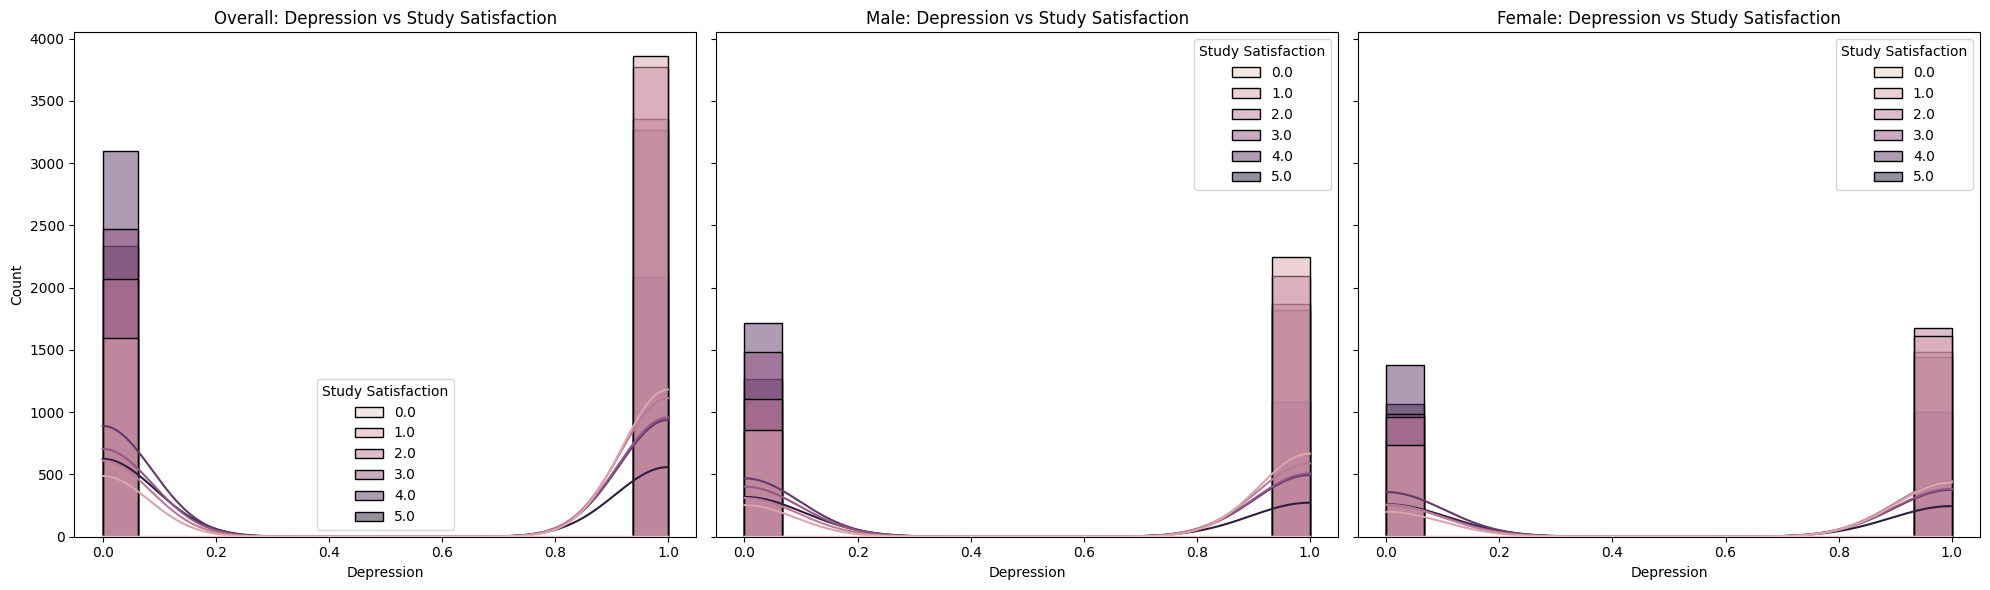

In [61]:
# Overall: Depression vs Study Satisfaction
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)  # Ensure shared y-axis

# Overall distribution
sns.histplot(data=df, x='Depression', kde=True, hue='Study Satisfaction', ax=axes[0])
axes[0].set_title("Overall: Depression vs Study Satisfaction")

# Male distribution
sns.histplot(data=df[df.Gender == 'Male'], x='Depression', kde=True, hue='Study Satisfaction', ax=axes[1])
axes[1].set_title("Male: Depression vs Study Satisfaction")

# Female distribution
sns.histplot(data=df[df.Gender == 'Female'], x='Depression', kde=True, hue='Study Satisfaction', ax=axes[2])
axes[2].set_title("Female: Depression vs Study Satisfaction")

plt.tight_layout()  # Adjust spacing
plt.show()


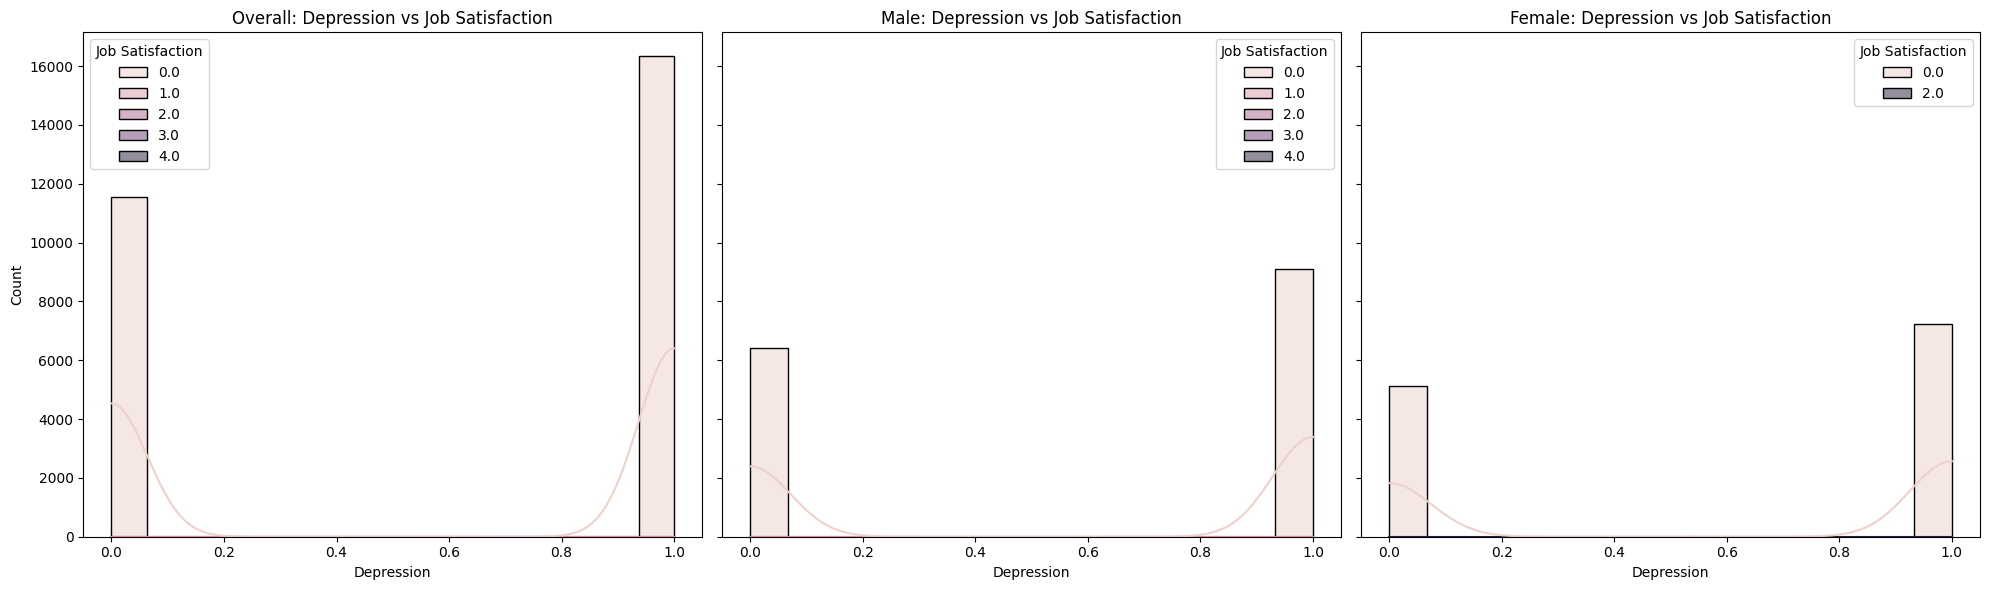

In [62]:
# Overall: Depression vs Job Satisfaction
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)  # Ensure shared y-axis

# Overall distribution
sns.histplot(data=df, x='Depression', kde=True, hue='Job Satisfaction', ax=axes[0])
axes[0].set_title("Overall: Depression vs Job Satisfaction")

# Male distribution
sns.histplot(data=df[df.Gender == 'Male'], x='Depression', kde=True, hue='Job Satisfaction', ax=axes[1])
axes[1].set_title("Male: Depression vs Job Satisfaction")

# Female distribution
sns.histplot(data=df[df.Gender == 'Female'], x='Depression', kde=True, hue='Job Satisfaction', ax=axes[2])
axes[2].set_title("Female: Depression vs Job Satisfaction")

plt.tight_layout()  # Adjust spacing
plt.show()


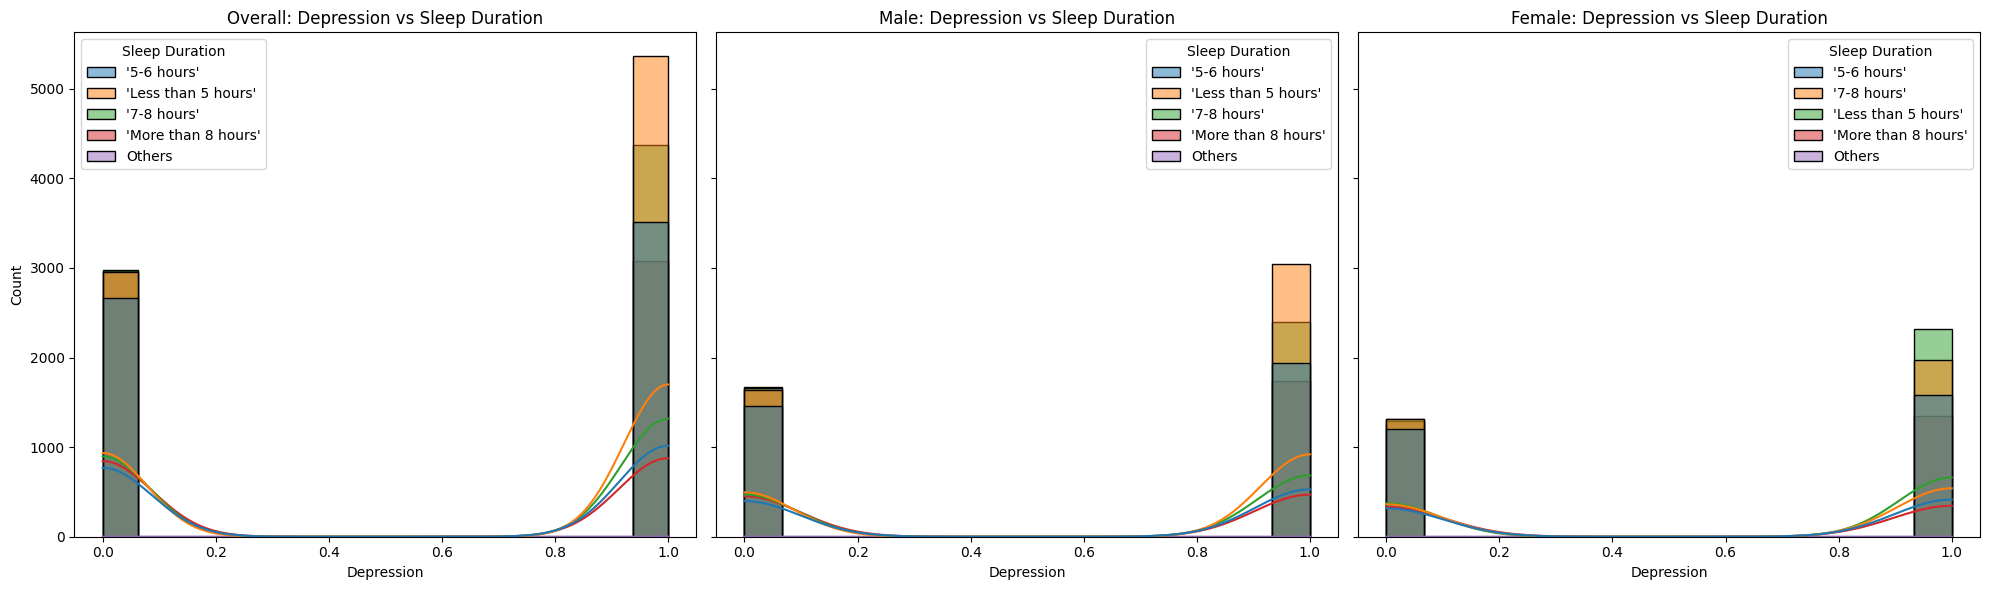

In [63]:
# Overall: Depression vs Sleep Duration
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)  # Ensure shared y-axis

# Overall distribution
sns.histplot(data=df, x='Depression', kde=True, hue='Sleep Duration', ax=axes[0])
axes[0].set_title("Overall: Depression vs Sleep Duration")

# Male distribution
sns.histplot(data=df[df.Gender == 'Male'], x='Depression', kde=True, hue='Sleep Duration', ax=axes[1])
axes[1].set_title("Male: Depression vs Sleep Duration")

# Female distribution
sns.histplot(data=df[df.Gender == 'Female'], x='Depression', kde=True, hue='Sleep Duration', ax=axes[2])
axes[2].set_title("Female: Depression vs Sleep Duration")

plt.tight_layout()  # Adjust spacing
plt.show()


<h3>Key Insights from Depression vs Sleep Duration</h3>
<ul>
    <li><strong>Overall Trend:</strong> Individuals with shorter sleep durations (less than 5 hours) show a higher correlation with depression, as indicated by the stacked bars at depression level 1.</li>
    <li><strong>Gender Differences:</strong> The trend remains similar for both males and females, but females show a slightly higher proportion of depression among those with irregular sleep patterns.</li>
    <li><strong>Healthy Sleep vs Depression:</strong> Those sleeping 7-8 hours or more tend to have lower depression rates, highlighting the importance of sufficient sleep in mental well-being.</li>
</ul>


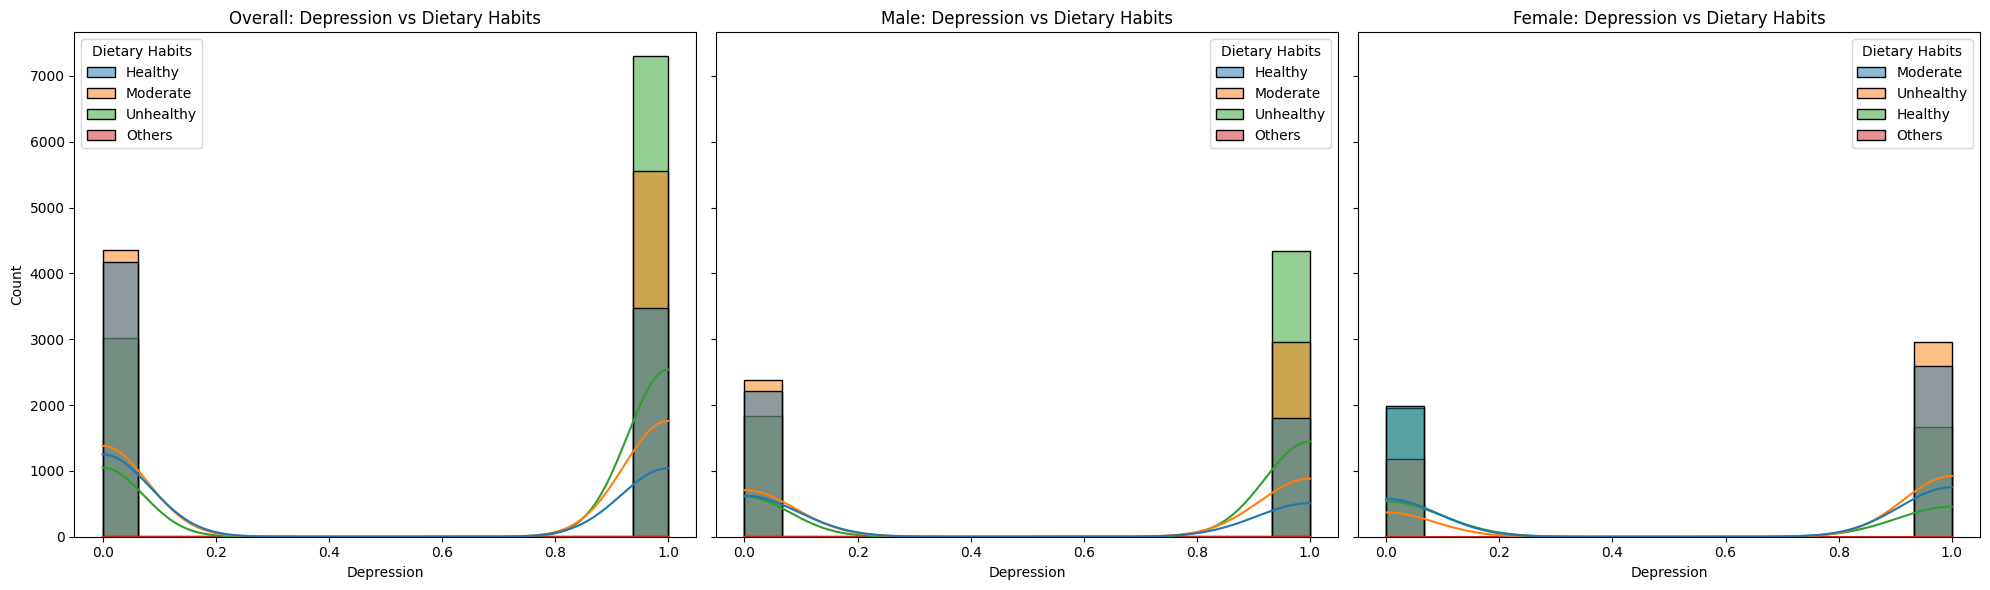

In [64]:
# Overall: Depression vs Dietary Habits
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)  # Ensure shared y-axis

# Overall distribution
sns.histplot(data=df, x='Depression', kde=True, hue='Dietary Habits', ax=axes[0])
axes[0].set_title("Overall: Depression vs Dietary Habits")

# Male distribution
sns.histplot(data=df[df.Gender == 'Male'], x='Depression', kde=True, hue='Dietary Habits', ax=axes[1])
axes[1].set_title("Male: Depression vs Dietary Habits")

# Female distribution
sns.histplot(data=df[df.Gender == 'Female'], x='Depression', kde=True, hue='Dietary Habits', ax=axes[2])
axes[2].set_title("Female: Depression vs Dietary Habits")

plt.tight_layout()  # Adjust spacing
plt.show()


<h3>Overall: Depression vs Dietary Habits</h3>
<ul>
    <li>Individuals with unhealthy dietary habits tend to have a higher likelihood of depression compared to those with healthy or moderate diets.</li>
    <li>The distribution shows a strong polarization, with most individuals being classified as either having depression or not, rather than intermediate values.</li>
    <li>Across genders, similar patterns emerge, but males show a slightly higher proportion of unhealthy dietary habits correlated with depression.</li>
</ul>

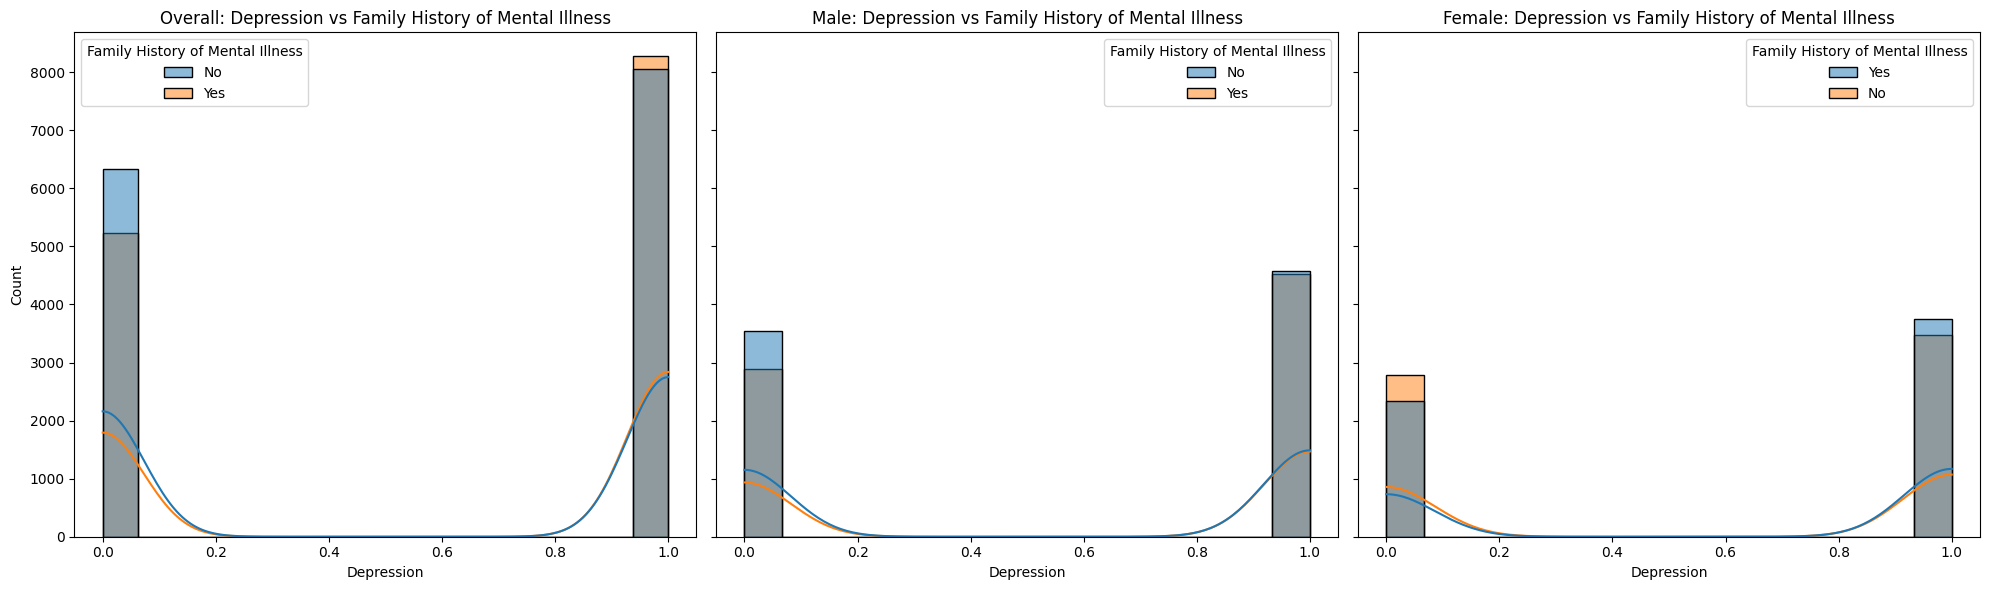

In [65]:
# Overall: Depression vs Family History of Mental Illness
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)  # Ensure shared y-axis

# Overall distribution
sns.histplot(data=df, x='Depression', kde=True, hue='Family History of Mental Illness', ax=axes[0])
axes[0].set_title("Overall: Depression vs Family History of Mental Illness")

# Male distribution
sns.histplot(data=df[df.Gender == 'Male'], x='Depression', kde=True, hue='Family History of Mental Illness', ax=axes[1])
axes[1].set_title("Male: Depression vs Family History of Mental Illness")

# Female distribution
sns.histplot(data=df[df.Gender == 'Female'], x='Depression', kde=True, hue='Family History of Mental Illness', ax=axes[2])
axes[2].set_title("Female: Depression vs Family History of Mental Illness")

plt.tight_layout()  # Adjust spacing
plt.show()


<h3>Overall: Depression vs Family History of Mental Illness</h3>
<ul>
    <li>Individuals with a family history of mental illness have a higher proportion of depression cases compared to those without.</li>
    <li>For both males and females, a significant portion of individuals without depression comes from families without a history of mental illness.</li>
    <li>The trend is consistent across genders, but the proportion of males with depression and no family history is slightly higher than in females.</li>
</ul>

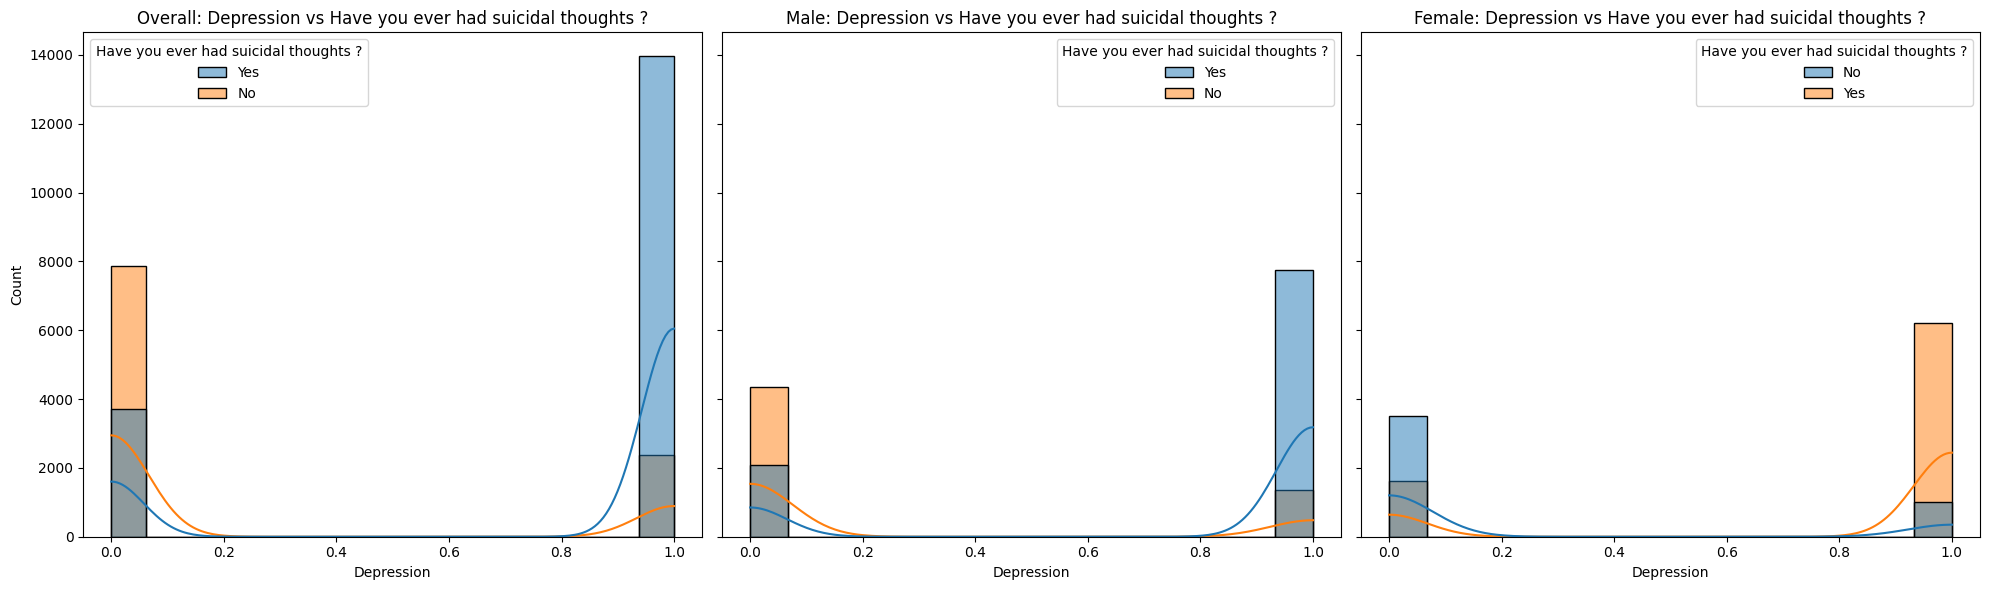

In [66]:
# Overall: Depression vs Have you ever had suicidal thoughts ?
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)  # Ensure shared y-axis

# Overall distribution
sns.histplot(data=df, x='Depression', kde=True, hue='Have you ever had suicidal thoughts ?', ax=axes[0])
axes[0].set_title("Overall: Depression vs Have you ever had suicidal thoughts ?")

# Male distribution
sns.histplot(data=df[df.Gender == 'Male'], x='Depression', kde=True, hue='Have you ever had suicidal thoughts ?', ax=axes[1])
axes[1].set_title("Male: Depression vs Have you ever had suicidal thoughts ?")

# Female distribution
sns.histplot(data=df[df.Gender == 'Female'], x='Depression', kde=True, hue='Have you ever had suicidal thoughts ?', ax=axes[2])
axes[2].set_title("Female: Depression vs Have you ever had suicidal thoughts ?")

plt.tight_layout()  # Adjust spacing
plt.show()


<h3>Overall: Depression vs Suicidal Thoughts</h3>
<ul>
    <li>There is a strong correlation between depression and having had suicidal thoughts, as the majority of individuals with depression report such thoughts.</li>
    <li>In both genders, individuals without depression are significantly less likely to have experienced suicidal thoughts.</li>
    <li>The pattern is slightly more pronounced in males, where a higher count of individuals with depression report suicidal thoughts compared to females.</li>
</ul>

<h3>4.2 Multivariate analysis using pieplot</h3>

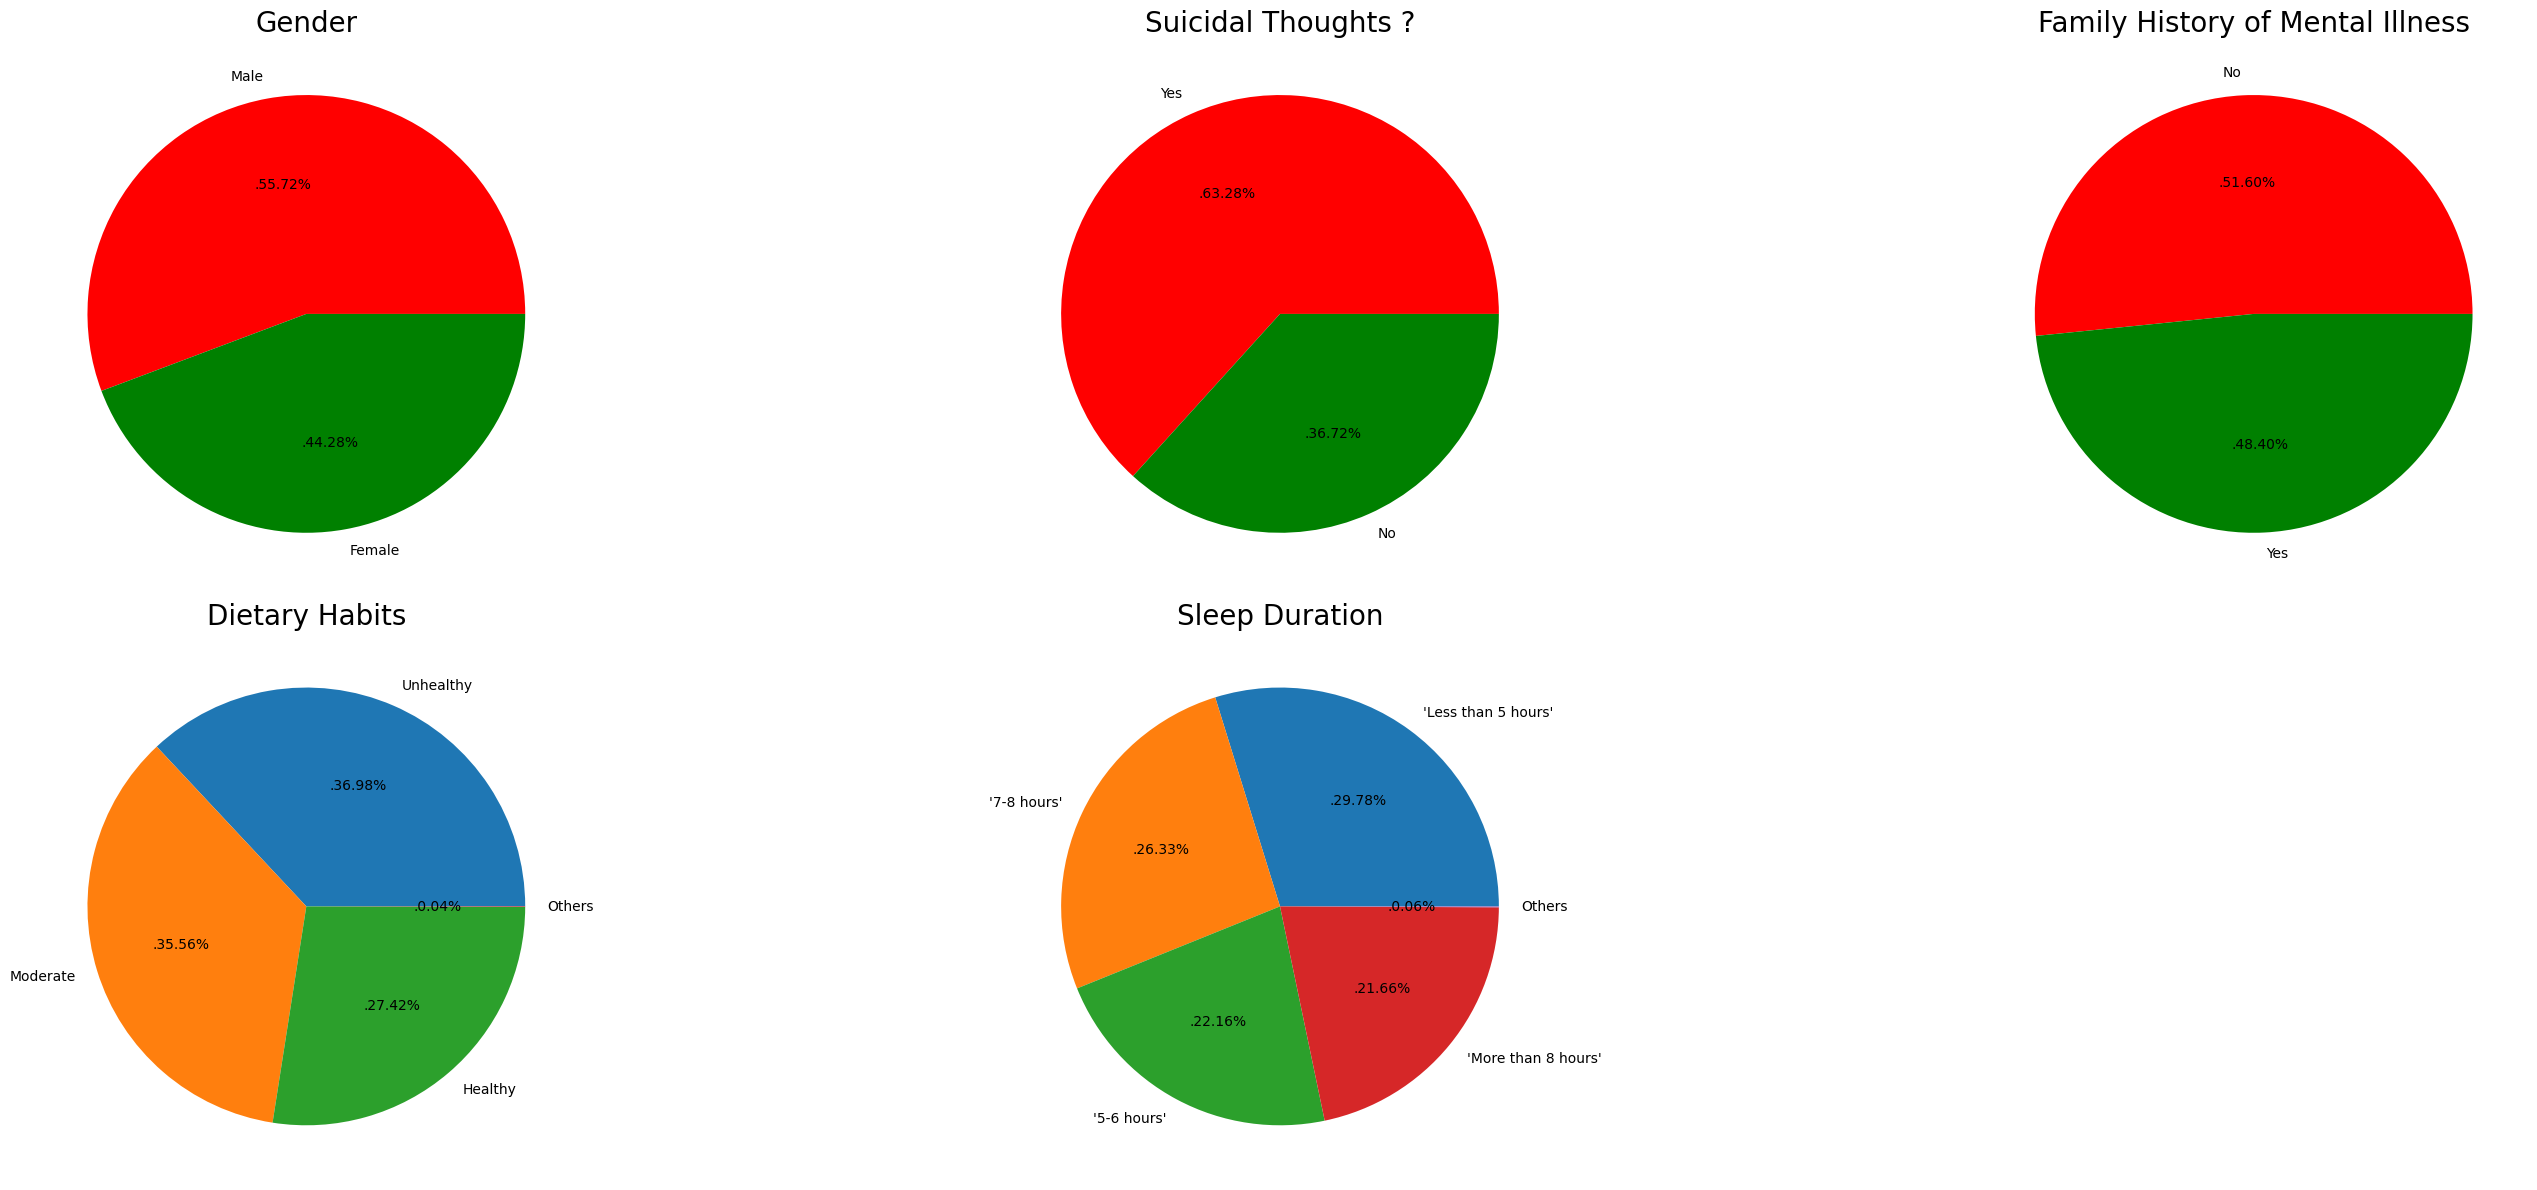

In [67]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(2, 3, 1)
size = df['Gender'].value_counts()
labels = df['Gender'].value_counts().index
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%1.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

plt.subplot(2, 3, 2)
size = df['Have you ever had suicidal thoughts ?'].value_counts()
labels = df['Have you ever had suicidal thoughts ?'].value_counts().index
color = ['red', 'green']

plt.pie(size, colors = color, labels = labels,autopct = '.%1.2f%%')
plt.title('Suicidal Thoughts ?', fontsize = 20)
plt.axis('off')

plt.subplot(2, 3, 3)
size = df['Family History of Mental Illness'].value_counts()
labels = df['Family History of Mental Illness'].value_counts().index
color = ['red', 'green']

plt.pie(size, colors=color, labels=labels, autopct='.%1.2f%%')
plt.title('Family History of Mental Illness', fontsize=20)
plt.axis('off')


plt.subplot(2, 3, 4)
size = df['Dietary Habits'].value_counts()
labels = df['Dietary Habits'].value_counts().index
color = plt.cm.tab10.colors[:len(labels)]

plt.pie(size, colors=color, labels=labels, autopct='.%1.2f%%')
plt.title('Dietary Habits', fontsize=20)
plt.axis('off')

plt.subplot(2, 3, 5)
size = df['Sleep Duration'].value_counts()
labels = df['Sleep Duration'].value_counts().index
color = plt.cm.tab10.colors[:len(labels)]

plt.pie(size, colors=color, labels=labels, autopct='.%1.2f%%')
plt.title('Sleep Duration', fontsize=20)
plt.axis('off')


plt.tight_layout()
plt.grid()
plt.show()



- **High Suicidal Thoughts (63.28%)** – A significant mental health concern.  
- **Poor Sleep Patterns** – 29.78% sleep **less than 5 hours**, which can impact mental well-being.  
- **Unhealthy Diet (36.98%)** – Majority have **poor dietary habits**, affecting overall health.  
- **Almost Half (48.40%) Have Family History** – Suggests a genetic link to mental health issues.  


<h3>4.4 Feature Wise Visualization</h3>

<h4>4.4.1 UNIVARIATE ANALYSIS</h4>

<h4>Gender Column</h4>

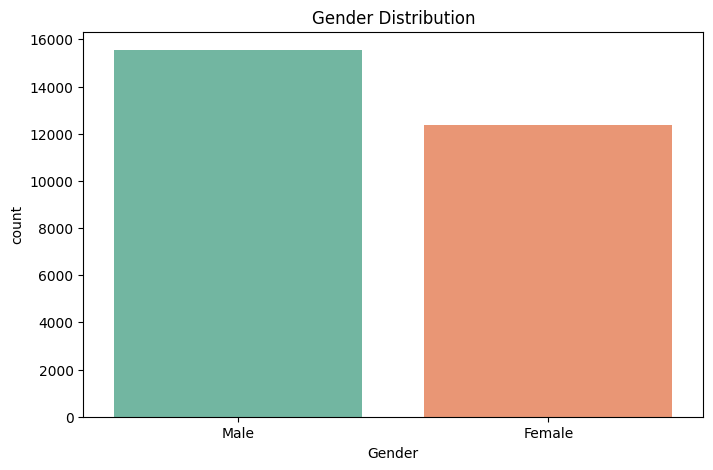

In [68]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['Gender'], palette='Set2')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("count")
plt.show()

<h4>Profession Column</h4>

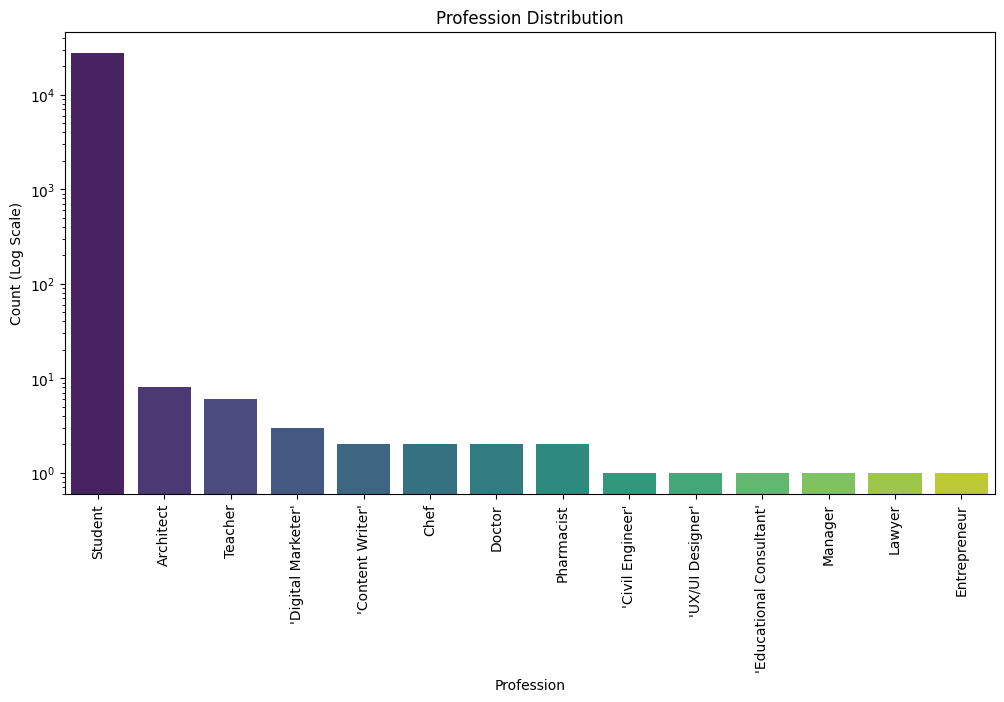

In [69]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df['Profession'].value_counts().index, y=df['Profession'].value_counts(), palette='viridis')
plt.xticks(rotation=90)
plt.yscale('log')  # Log scale to handle large differences
plt.title('Profession Distribution')
plt.xlabel('Profession')
plt.ylabel('Count (Log Scale)')
plt.show()


<h4>Sleep Duration Column</h4>

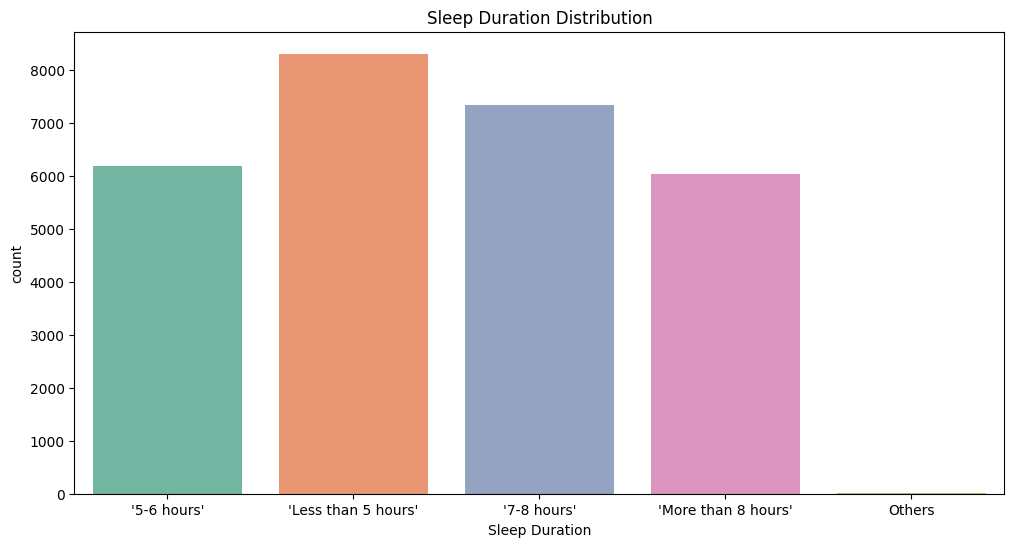

In [70]:
plt.figure(figsize=(12, 6))
sns.countplot(x=df['Sleep Duration'], palette='Set2')
plt.title("Sleep Duration Distribution")
plt.xlabel("Sleep Duration")
plt.ylabel("count")
plt.show()

<h4>Dietary Habits Column</h4>

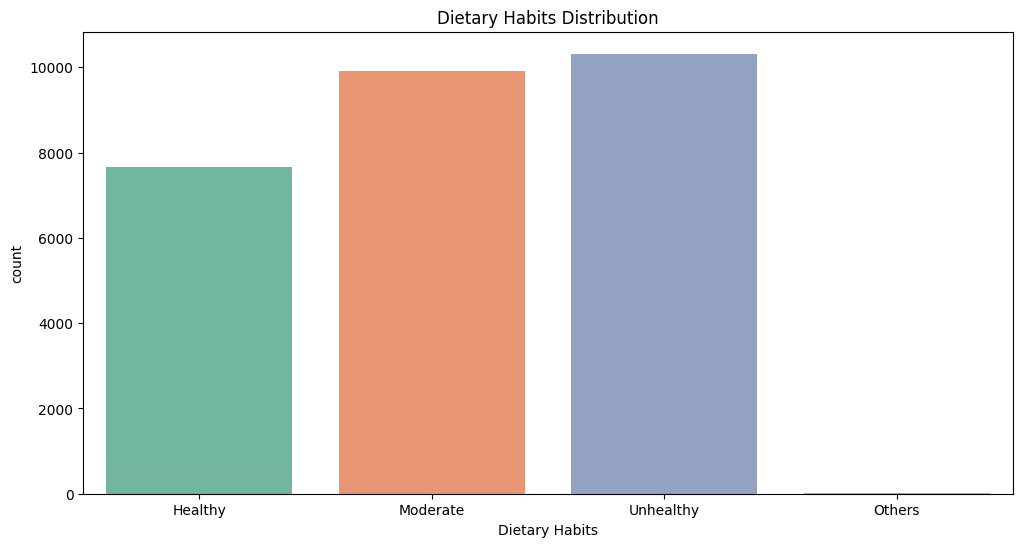

In [71]:
plt.figure(figsize=(12, 6))
sns.countplot(x=df['Dietary Habits'], palette="Set2")
plt.title("Dietary Habits Distribution")
plt.xlabel("Dietary Habits")
plt.ylabel("count")
plt.show()

<h4>Degree Column</h4>

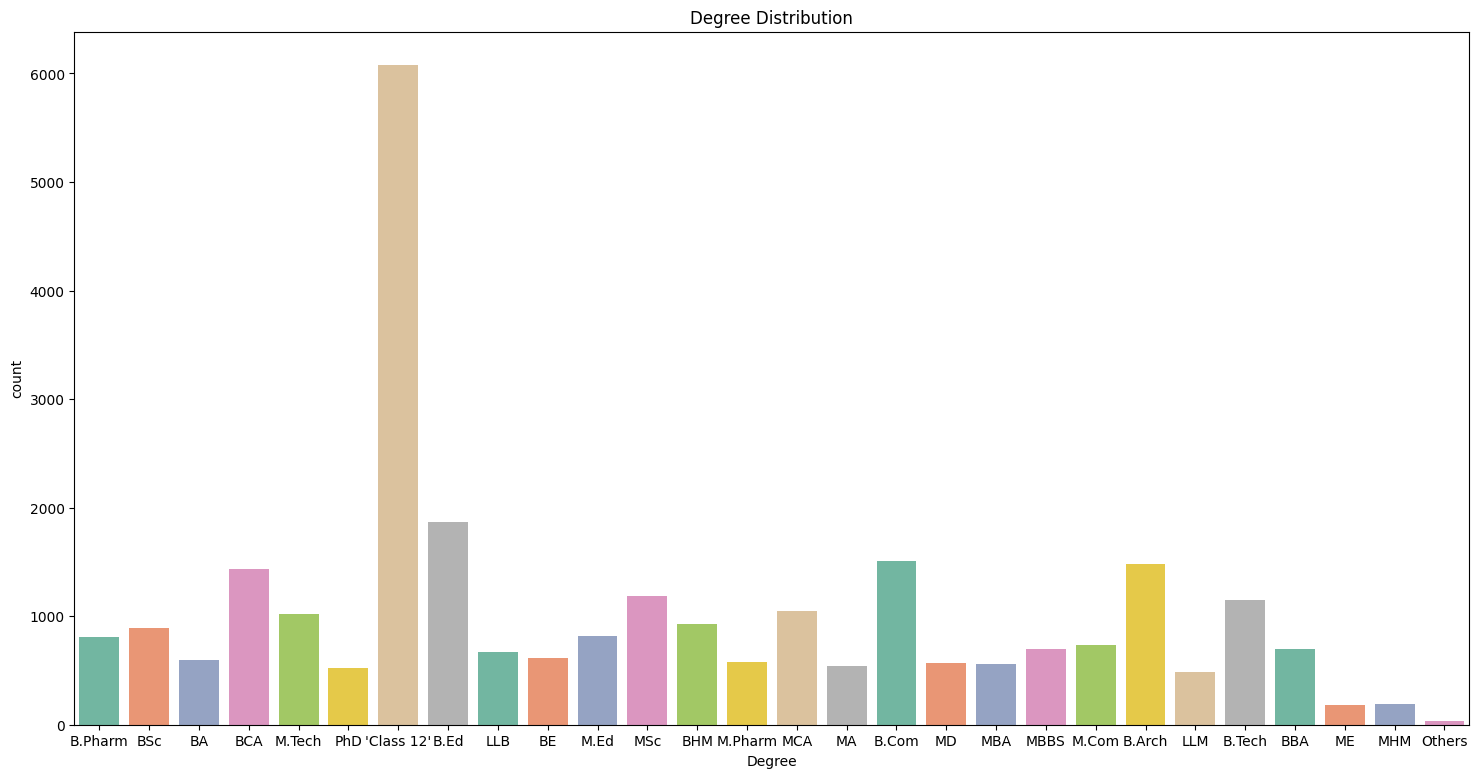

In [72]:
plt.figure(figsize=(18, 9))
sns.countplot(x=df['Degree'], palette='Set2')
plt.title("Degree Distribution")
plt.xlabel('Degree')
plt.ylabel("count")
plt.show()

<h4>Have you ever had suicidal thoughts ? Column</h4>

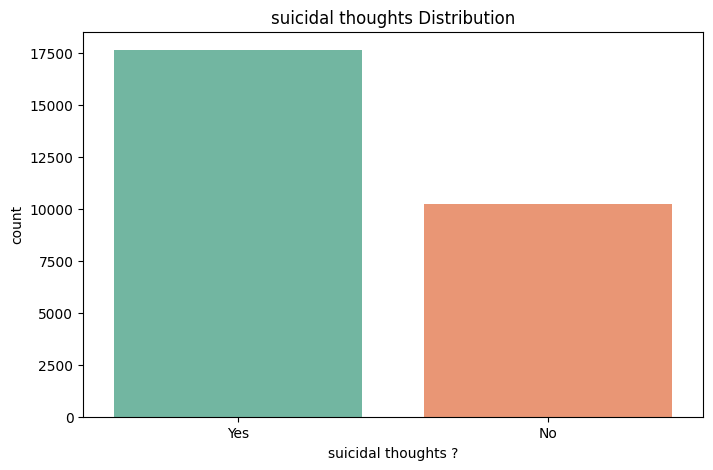

In [73]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df['Have you ever had suicidal thoughts ?'], palette="Set2")
plt.title("suicidal thoughts Distribution")
plt.xlabel("suicidal thoughts ?")
plt.ylabel("count")
plt.show()

<h4>Family History of Mental Illness Column</h4>

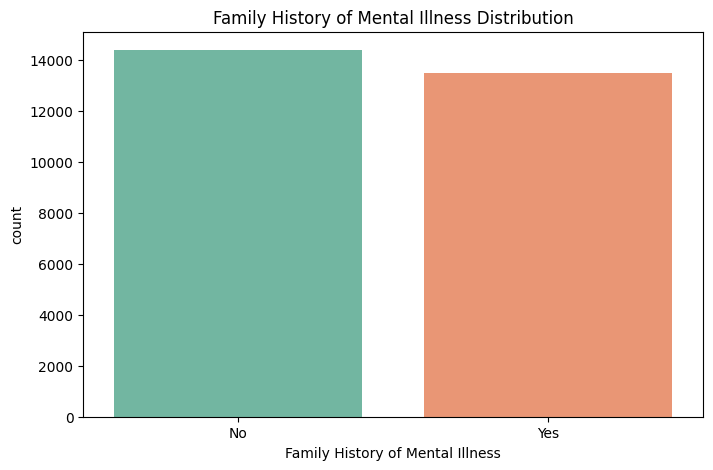

In [74]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df['Family History of Mental Illness'], palette="Set2")
plt.title("Family History of Mental Illness Distribution")
plt.xlabel("Family History of Mental Illness")
plt.ylabel("count")
plt.show()

<h3>4.4.2 BIVARIATE ANALYSIS</h3>

**1. Categorical vs Numerical**

In [75]:
"""['Gender',
 'Profession',
 'Sleep Duration',
 'Dietary Habits',
 'Degree',
 'Have you ever had suicidal thoughts ?',
 'Family History of Mental Illness']"""

"['Gender',\n 'Profession',\n 'Sleep Duration',\n 'Dietary Habits',\n 'Degree',\n 'Have you ever had suicidal thoughts ?',\n 'Family History of Mental Illness']"

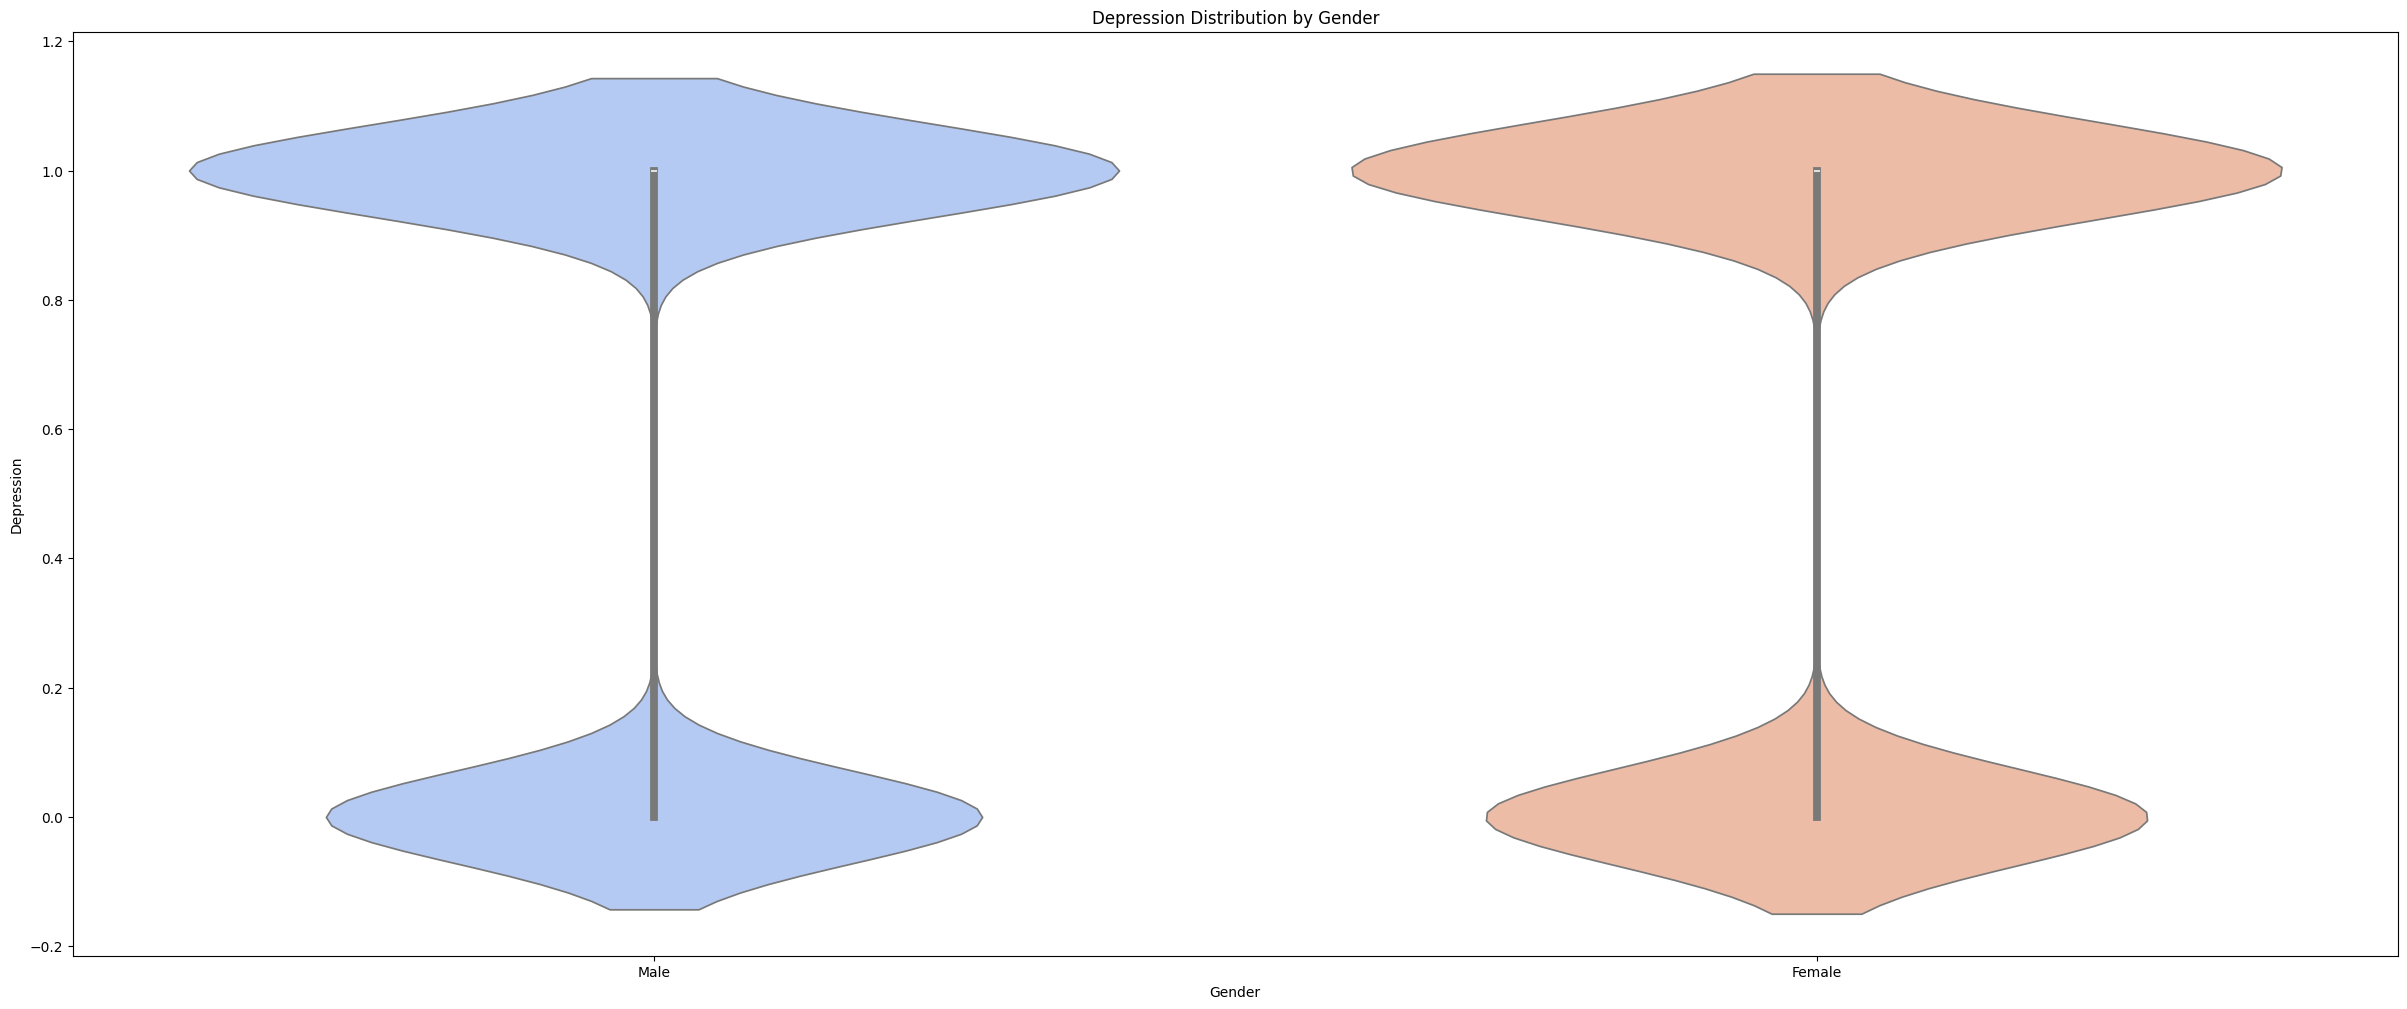

In [76]:
## Is Gender type has any impact on Depression

sns.violinplot(x=df['Gender'], y=df['Depression'], palette='coolwarm')
plt.title('Depression Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Depression')
plt.show()

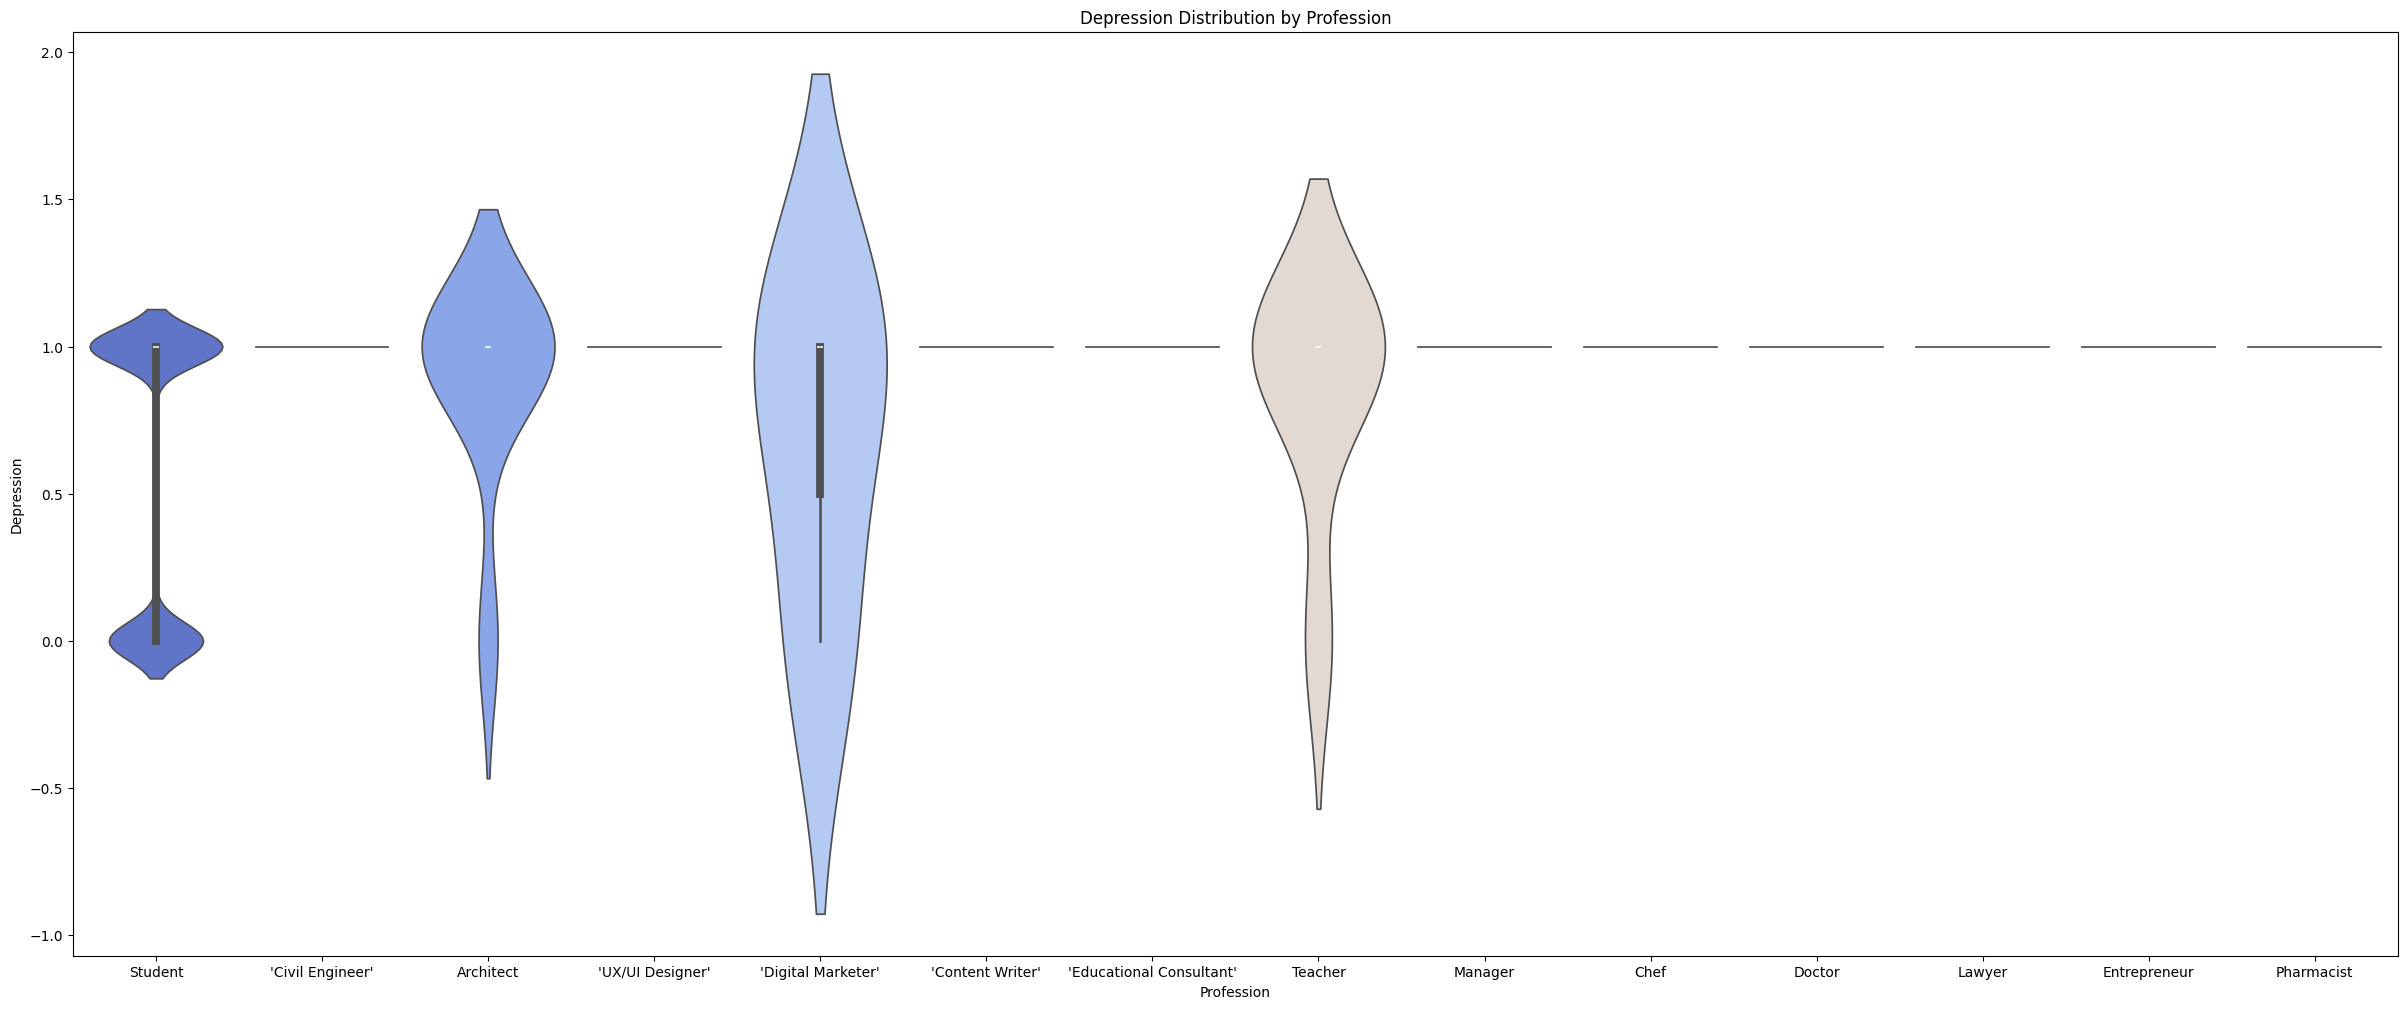

In [77]:
## Is Profeesion type has any impact on Depression

sns.violinplot(x=df['Profession'], y=df['Depression'], palette='coolwarm')
plt.title('Depression Distribution by Profession')
plt.xlabel('Profession')
plt.ylabel('Depression')
plt.show()

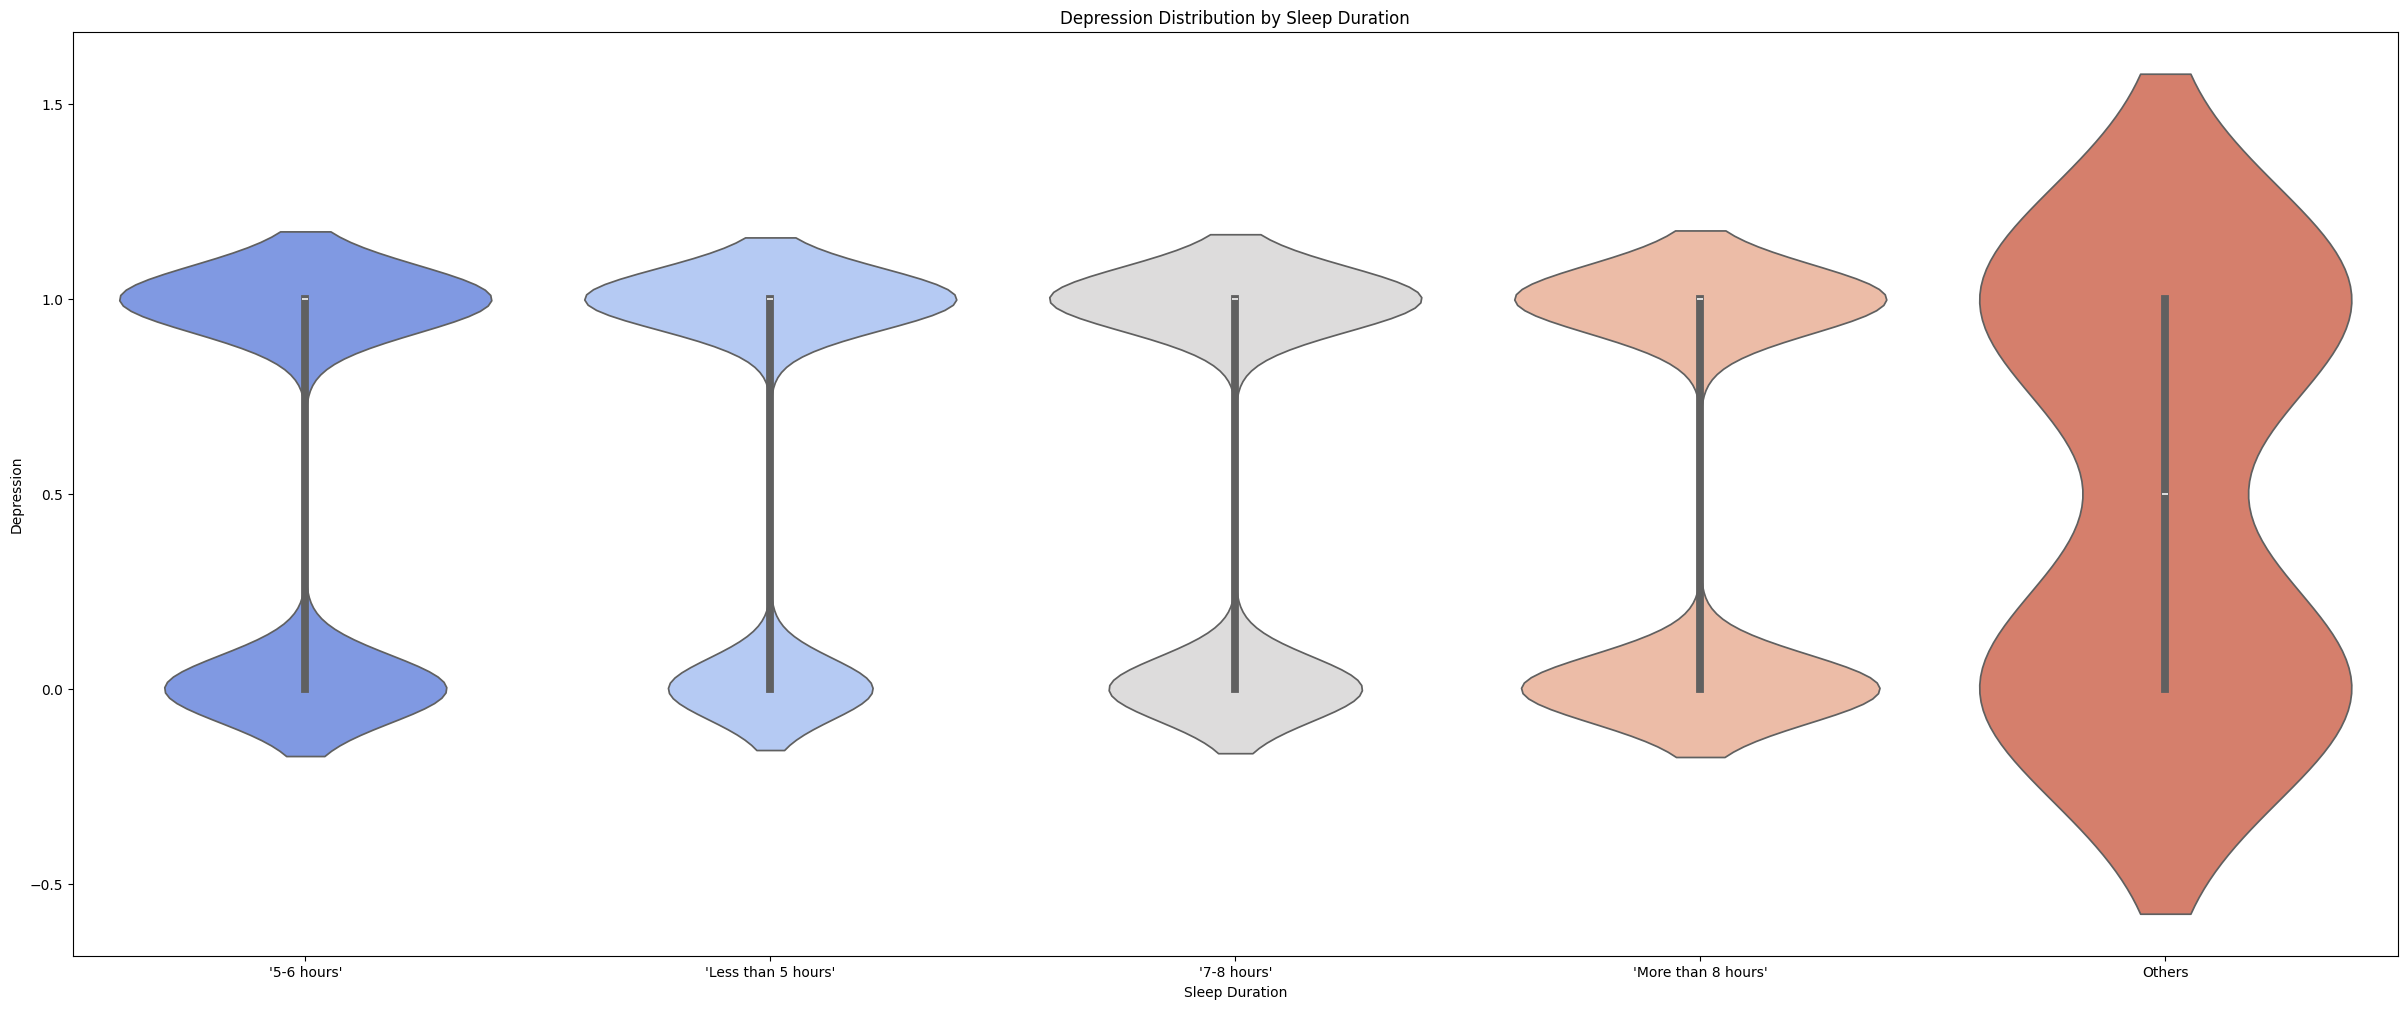

In [78]:
## Is Sleep Duration type has any impact on Depression

sns.violinplot(x=df['Sleep Duration'], y=df['Depression'], palette='coolwarm')
plt.title('Depression Distribution by Sleep Duration')
plt.xlabel('Sleep Duration')
plt.ylabel('Depression')
plt.show()

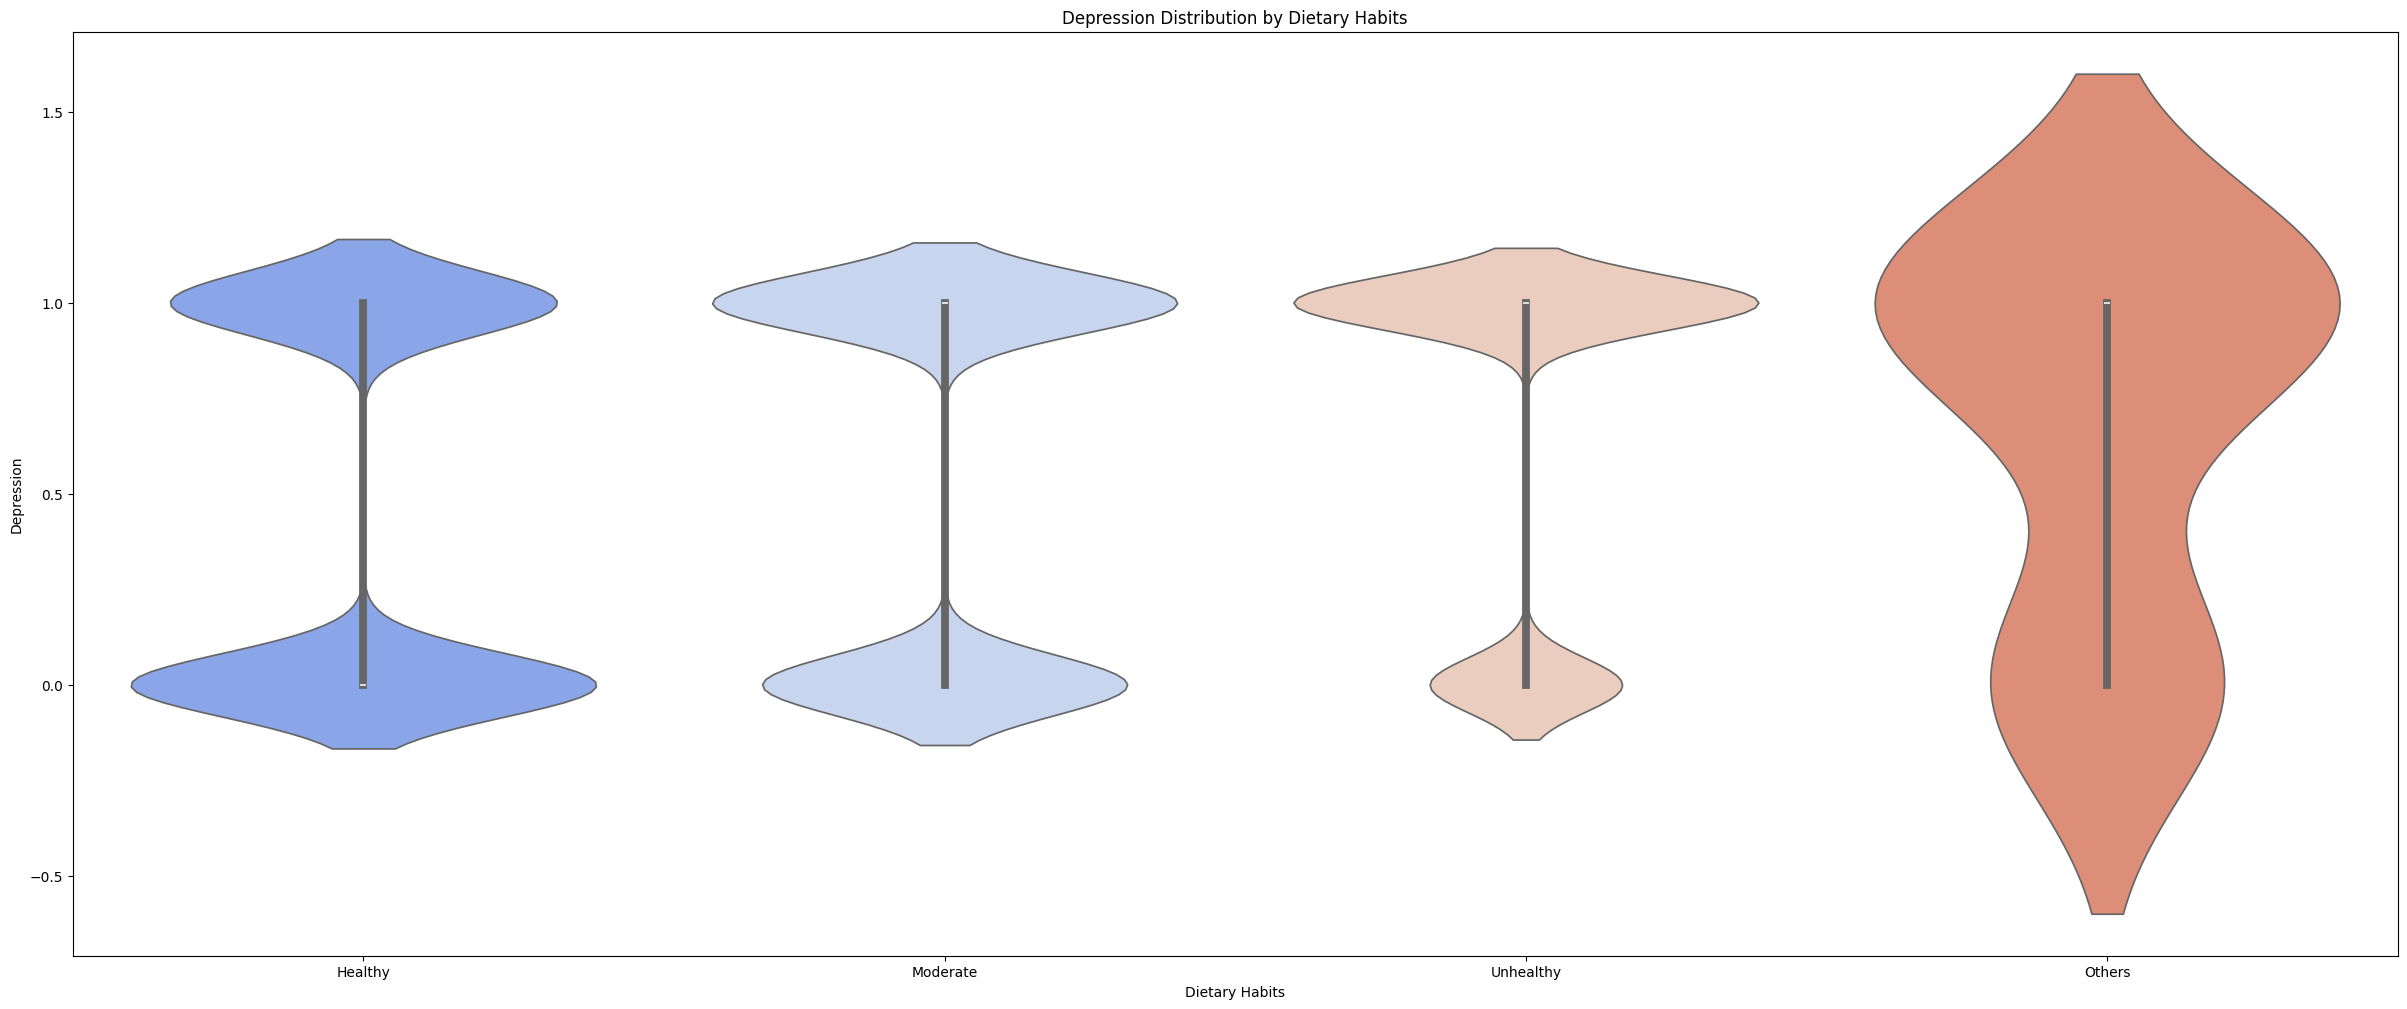

In [79]:
## Is Dietary Habits type has any impact on Depression

sns.violinplot(x=df['Dietary Habits'], y=df['Depression'], palette='coolwarm')
plt.title('Depression Distribution by Dietary Habits')
plt.xlabel('Dietary Habits')
plt.ylabel('Depression')
plt.show()

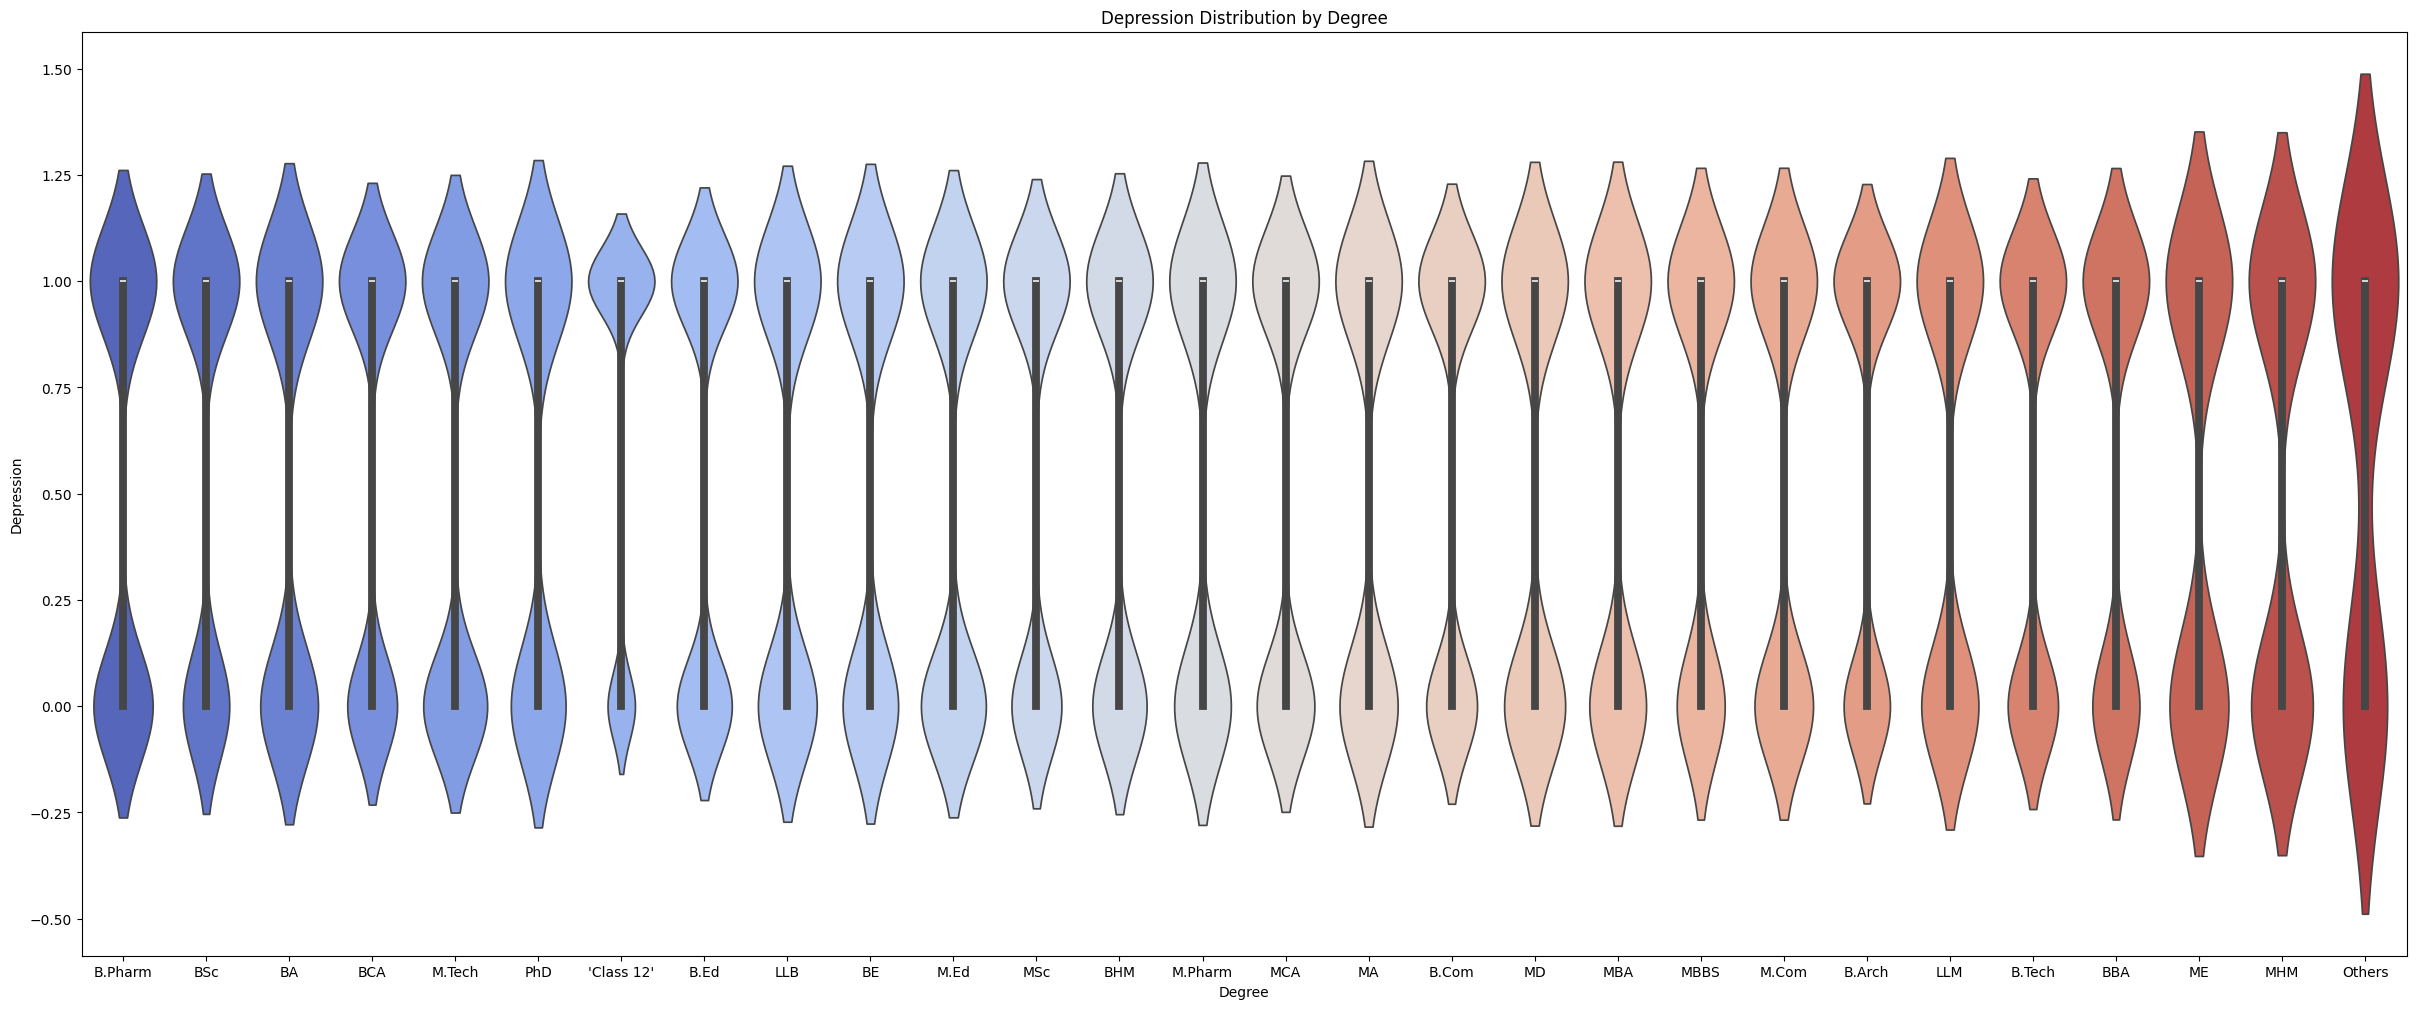

In [80]:
## Is Degree type has any impact on Depression

sns.violinplot(x=df['Degree'], y=df['Depression'], palette='coolwarm')
plt.title('Depression Distribution by Degree')
plt.xlabel('Degree')
plt.ylabel('Depression')
plt.show()

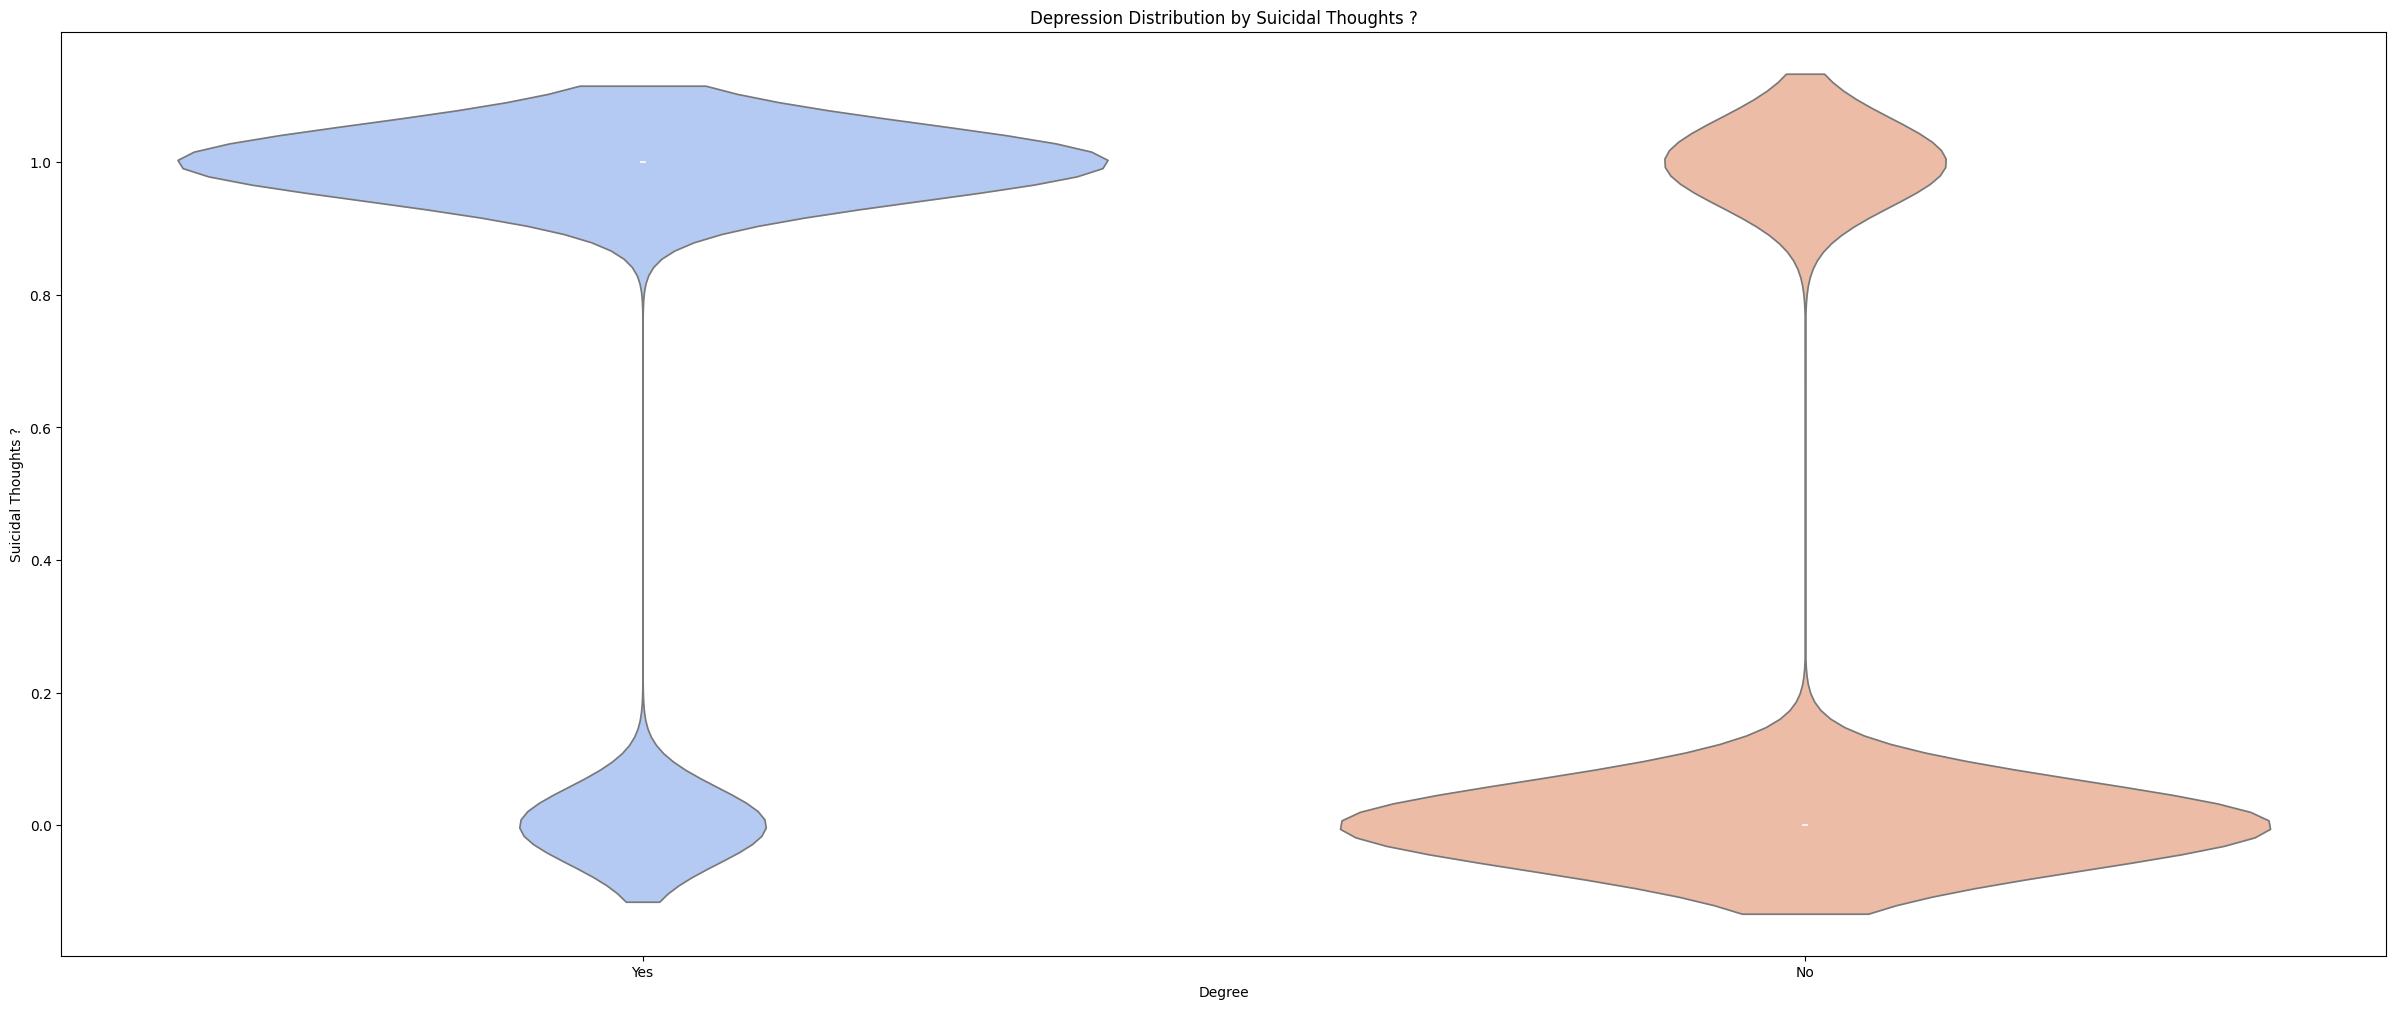

In [81]:
## Is Have you ever had suicidal thoughts ? has any impact on Depression

sns.violinplot(x=df['Have you ever had suicidal thoughts ?'], y=df['Depression'], palette='coolwarm')
plt.title('Depression Distribution by Suicidal Thoughts ?')
plt.xlabel('Degree')
plt.ylabel('Suicidal Thoughts ?')
plt.show()

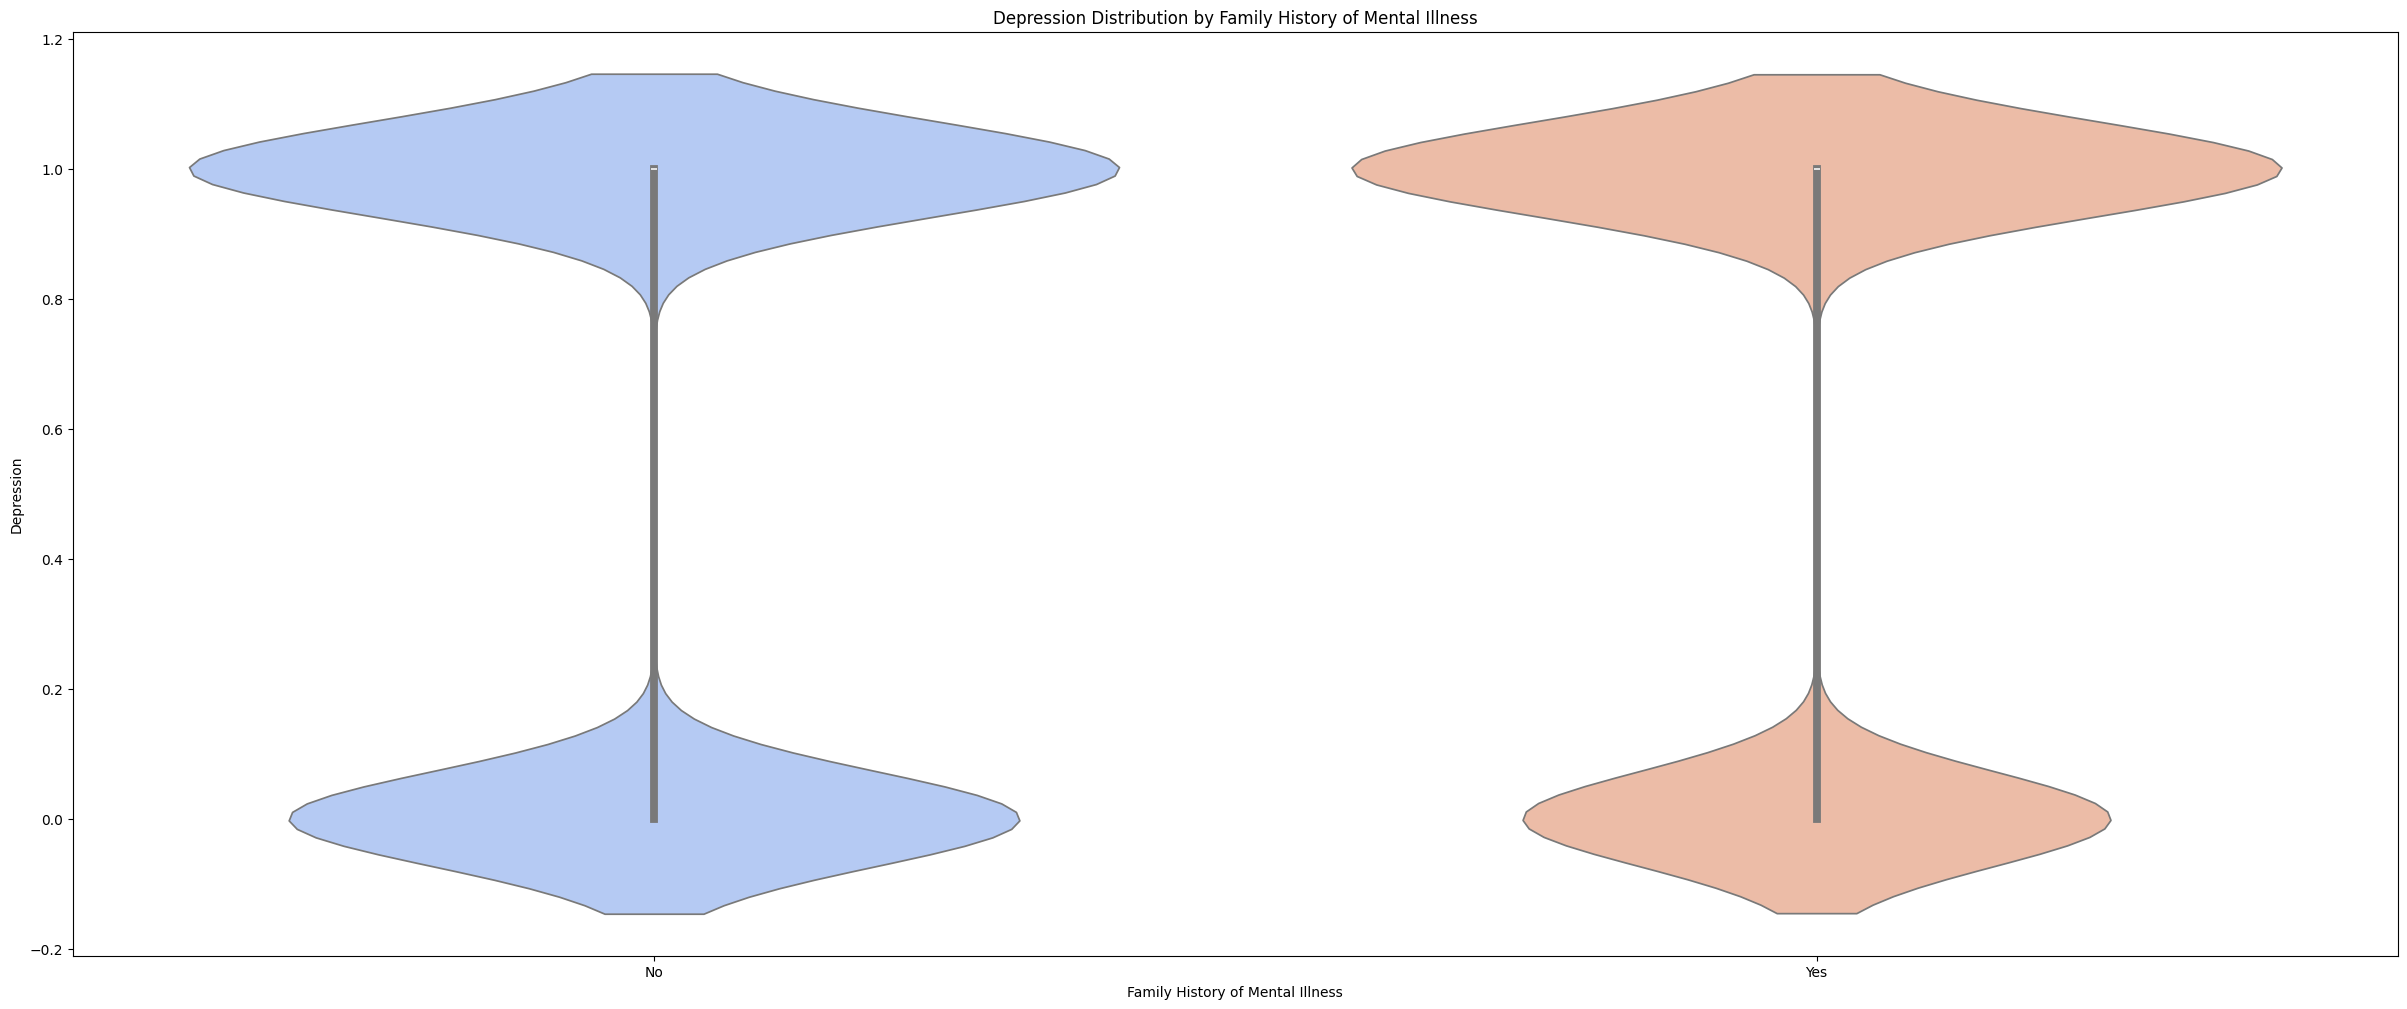

In [82]:
## Is Family History of Mental Illness has any impact on Depression

sns.violinplot(x=df['Family History of Mental Illness'], y=df['Depression'], palette='coolwarm')
plt.title('Depression Distribution by Family History of Mental Illness')
plt.xlabel('Family History of Mental Illness')
plt.ylabel('Depression')
plt.show()

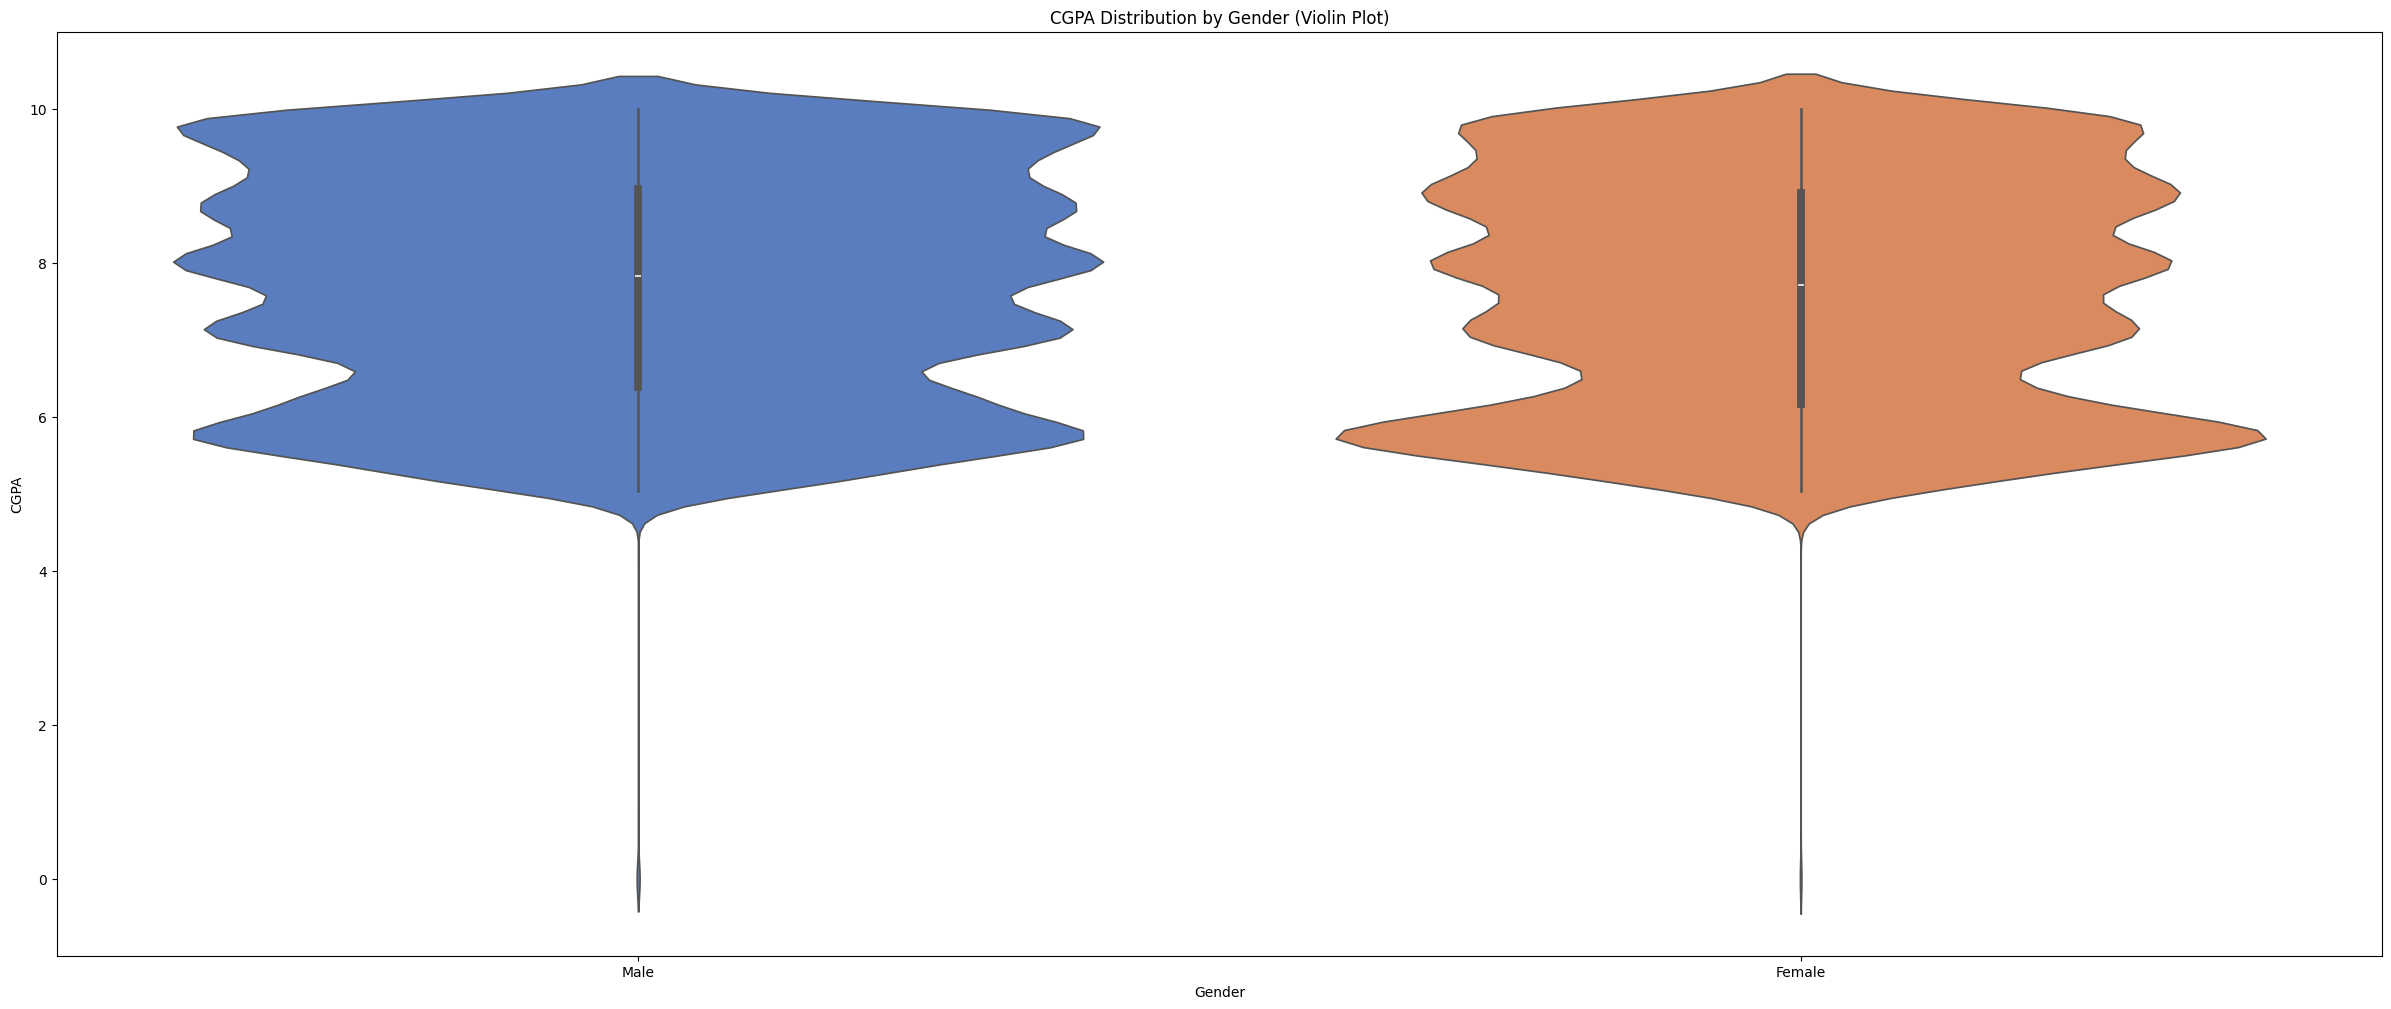

In [83]:
# Gender vs. CGPA

# Violin Plot
sns.violinplot(x=df['Gender'], y=df['CGPA'], palette='muted')
plt.title('CGPA Distribution by Gender (Violin Plot)')
plt.show()

**2. Numerical vs Numerical**

In [84]:
"""['Age',
 'Academic Pressure',
 'Work Pressure',
 'CGPA',
 'Study Satisfaction',
 'Job Satisfaction',
 'Work/Study Hours',
 'Financial Stress',
 'Depression']"""

"['Age',\n 'Academic Pressure',\n 'Work Pressure',\n 'CGPA',\n 'Study Satisfaction',\n 'Job Satisfaction',\n 'Work/Study Hours',\n 'Financial Stress',\n 'Depression']"

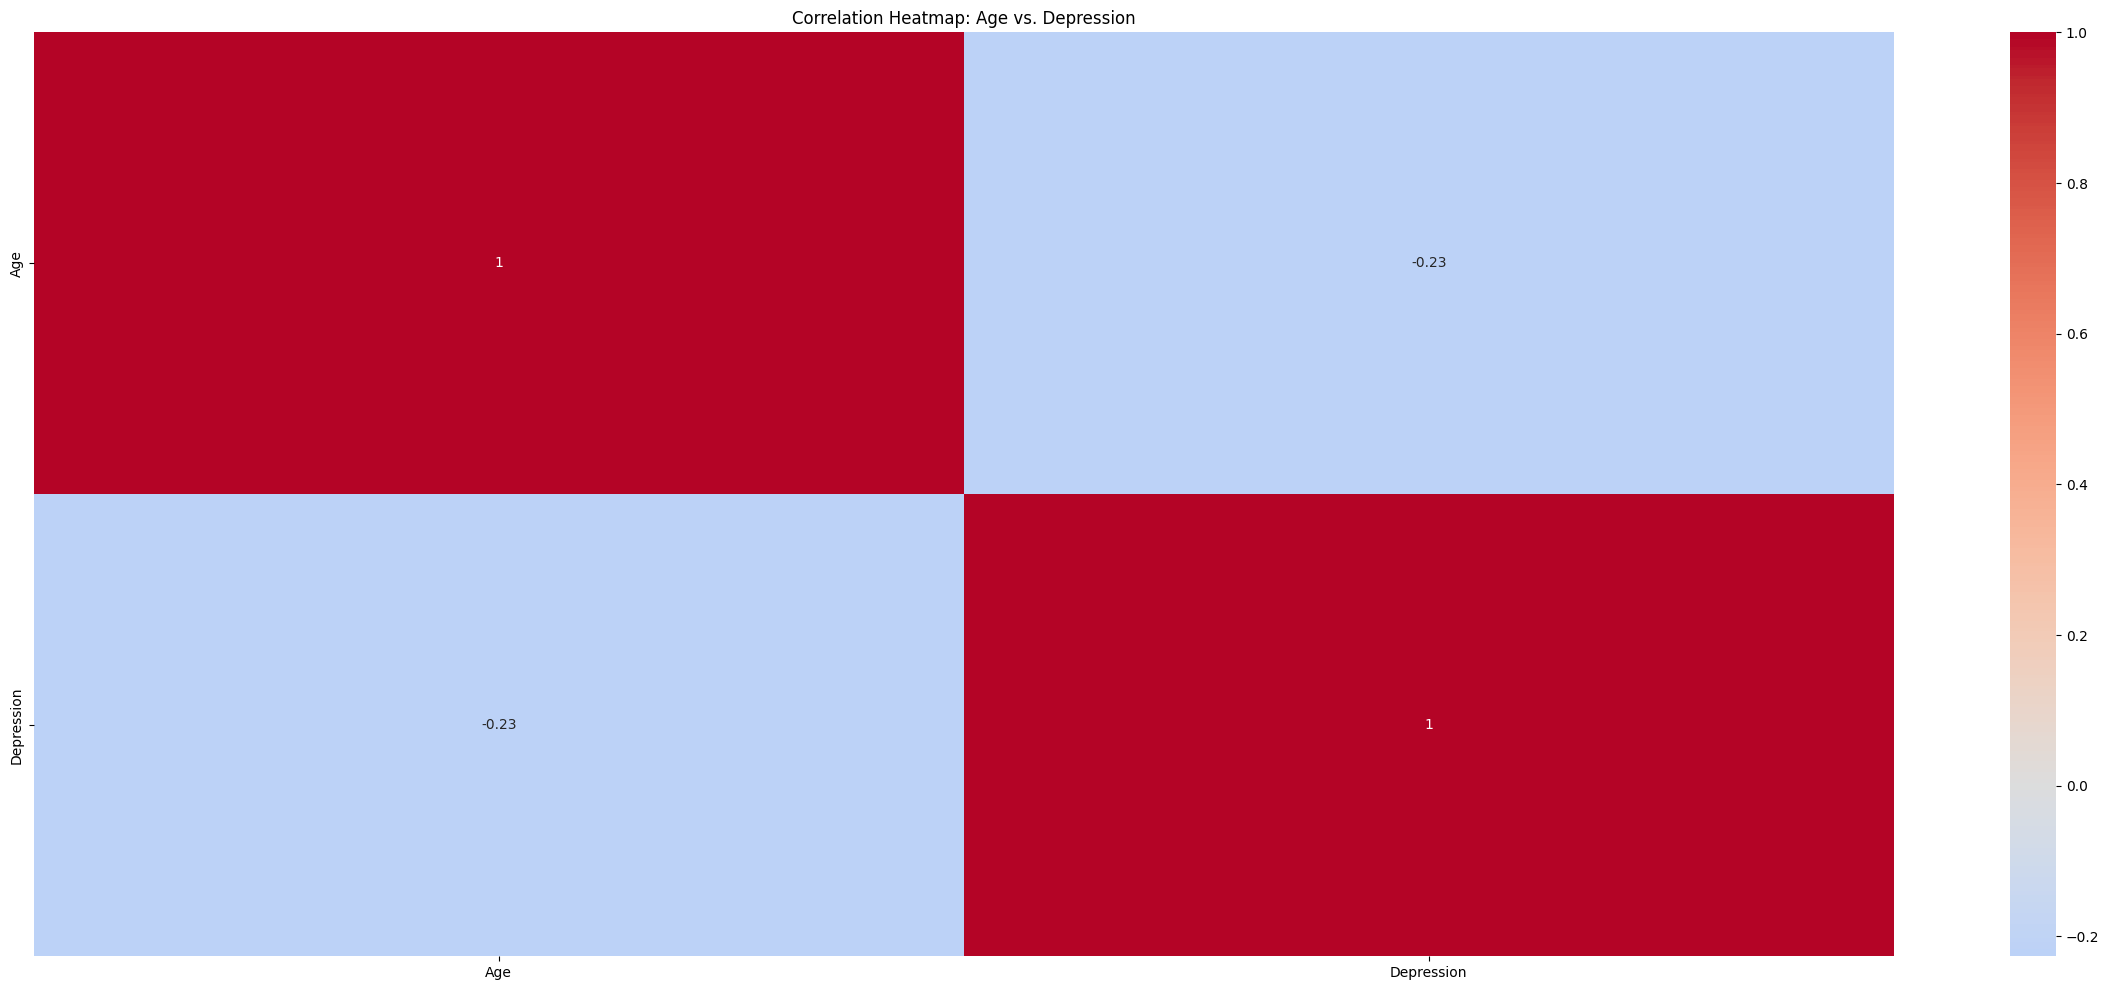

In [85]:
# Correlation Heatmap
# Is Age has any impact on Depression
corr_matrix = df[['Age', 'Depression']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap: Age vs. Depression')
plt.show()


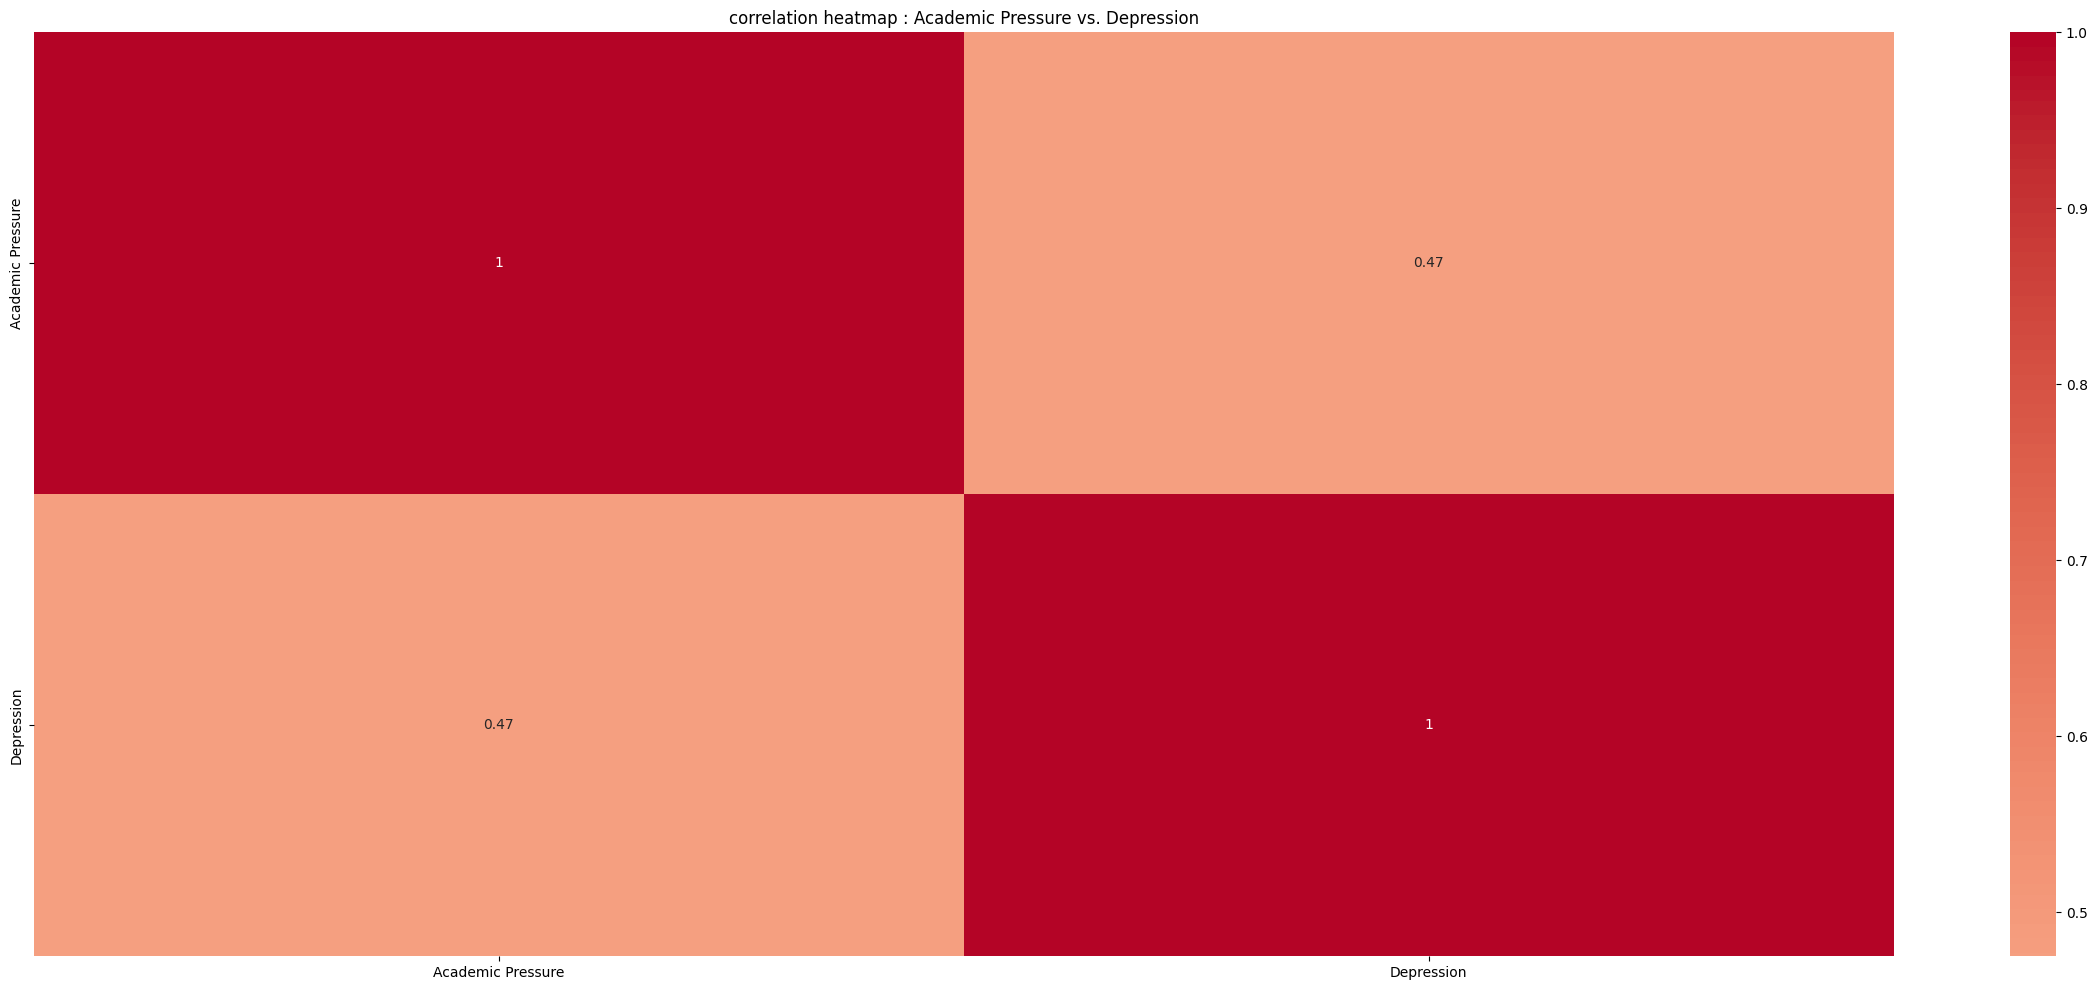

In [86]:
# Is Academic Pressure has any impact on Depression

corr_matrix = df[['Academic Pressure', 'Depression']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('correlation heatmap : Academic Pressure vs. Depression')
plt.show()

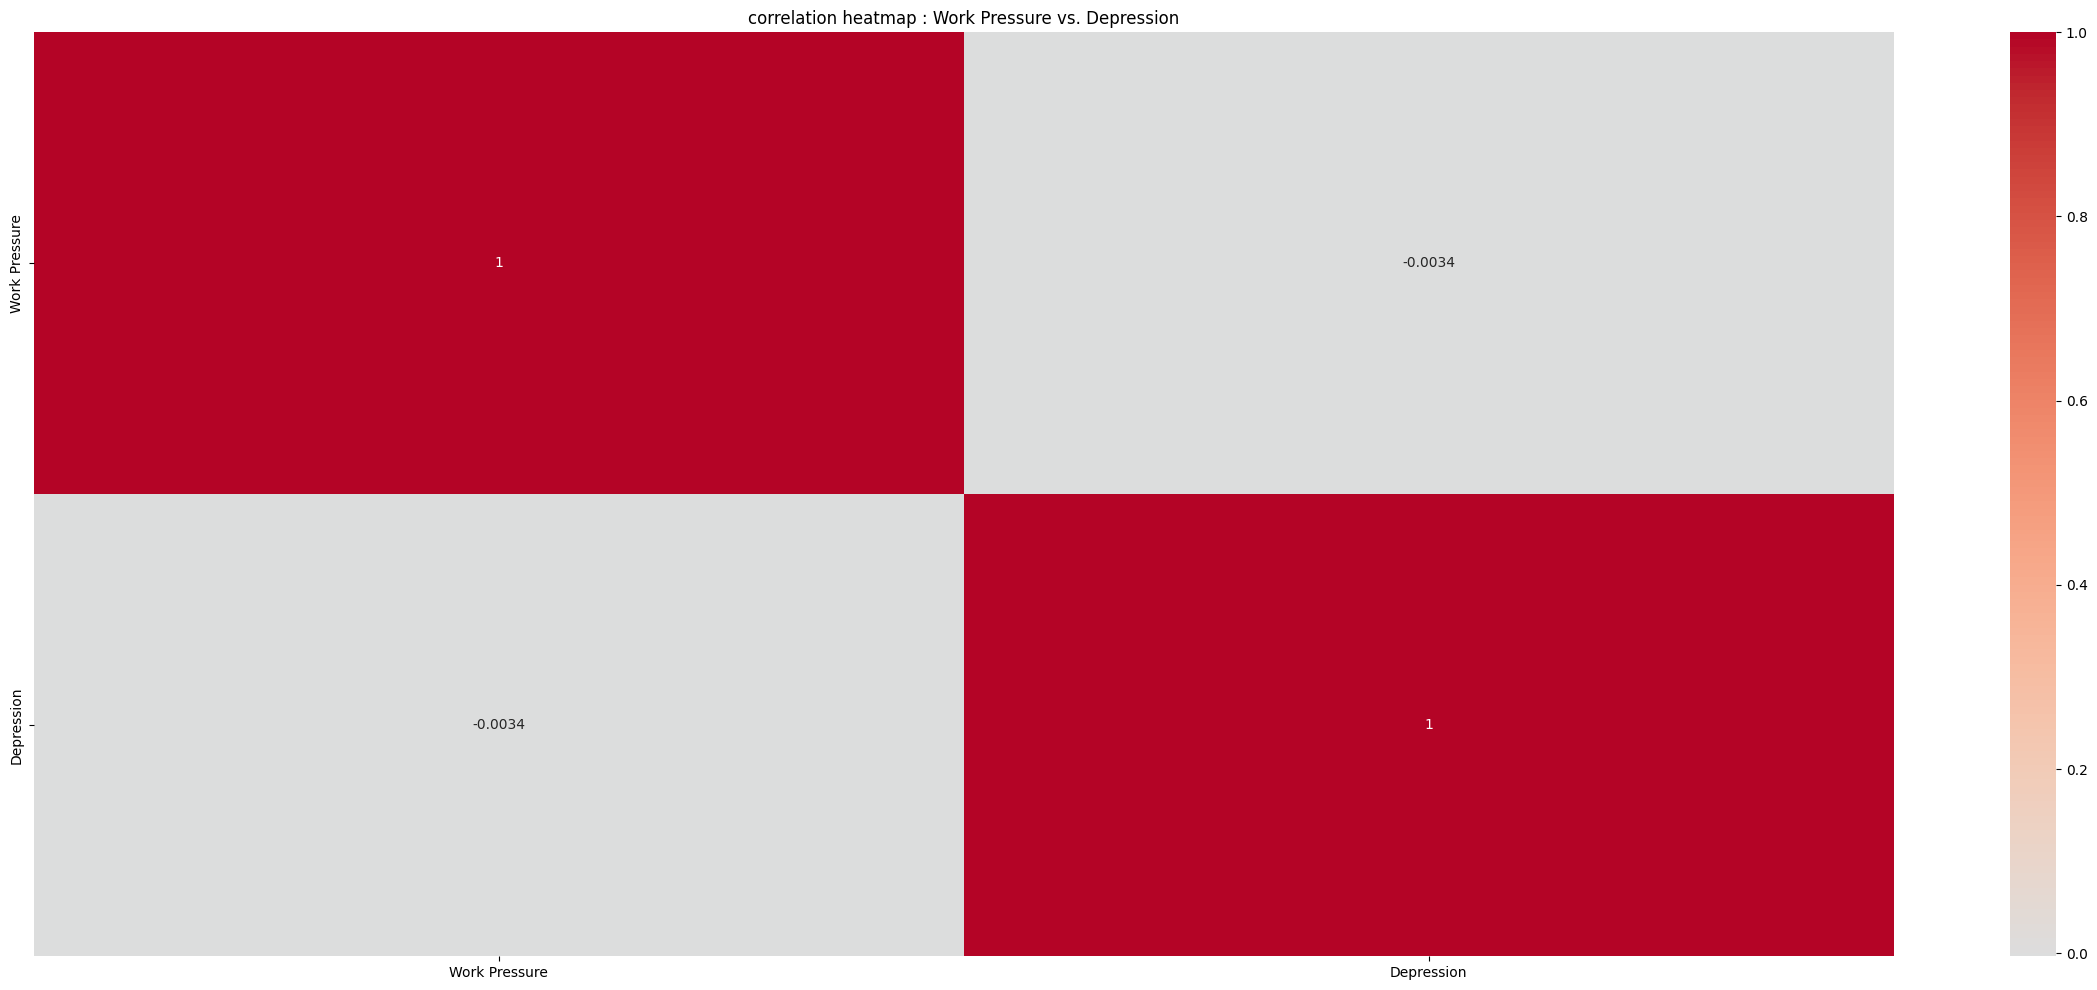

In [87]:
# Is Work Pressure has any impact on Depression

corr_matrix = df[['Work Pressure', 'Depression']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('correlation heatmap : Work Pressure vs. Depression')
plt.show()

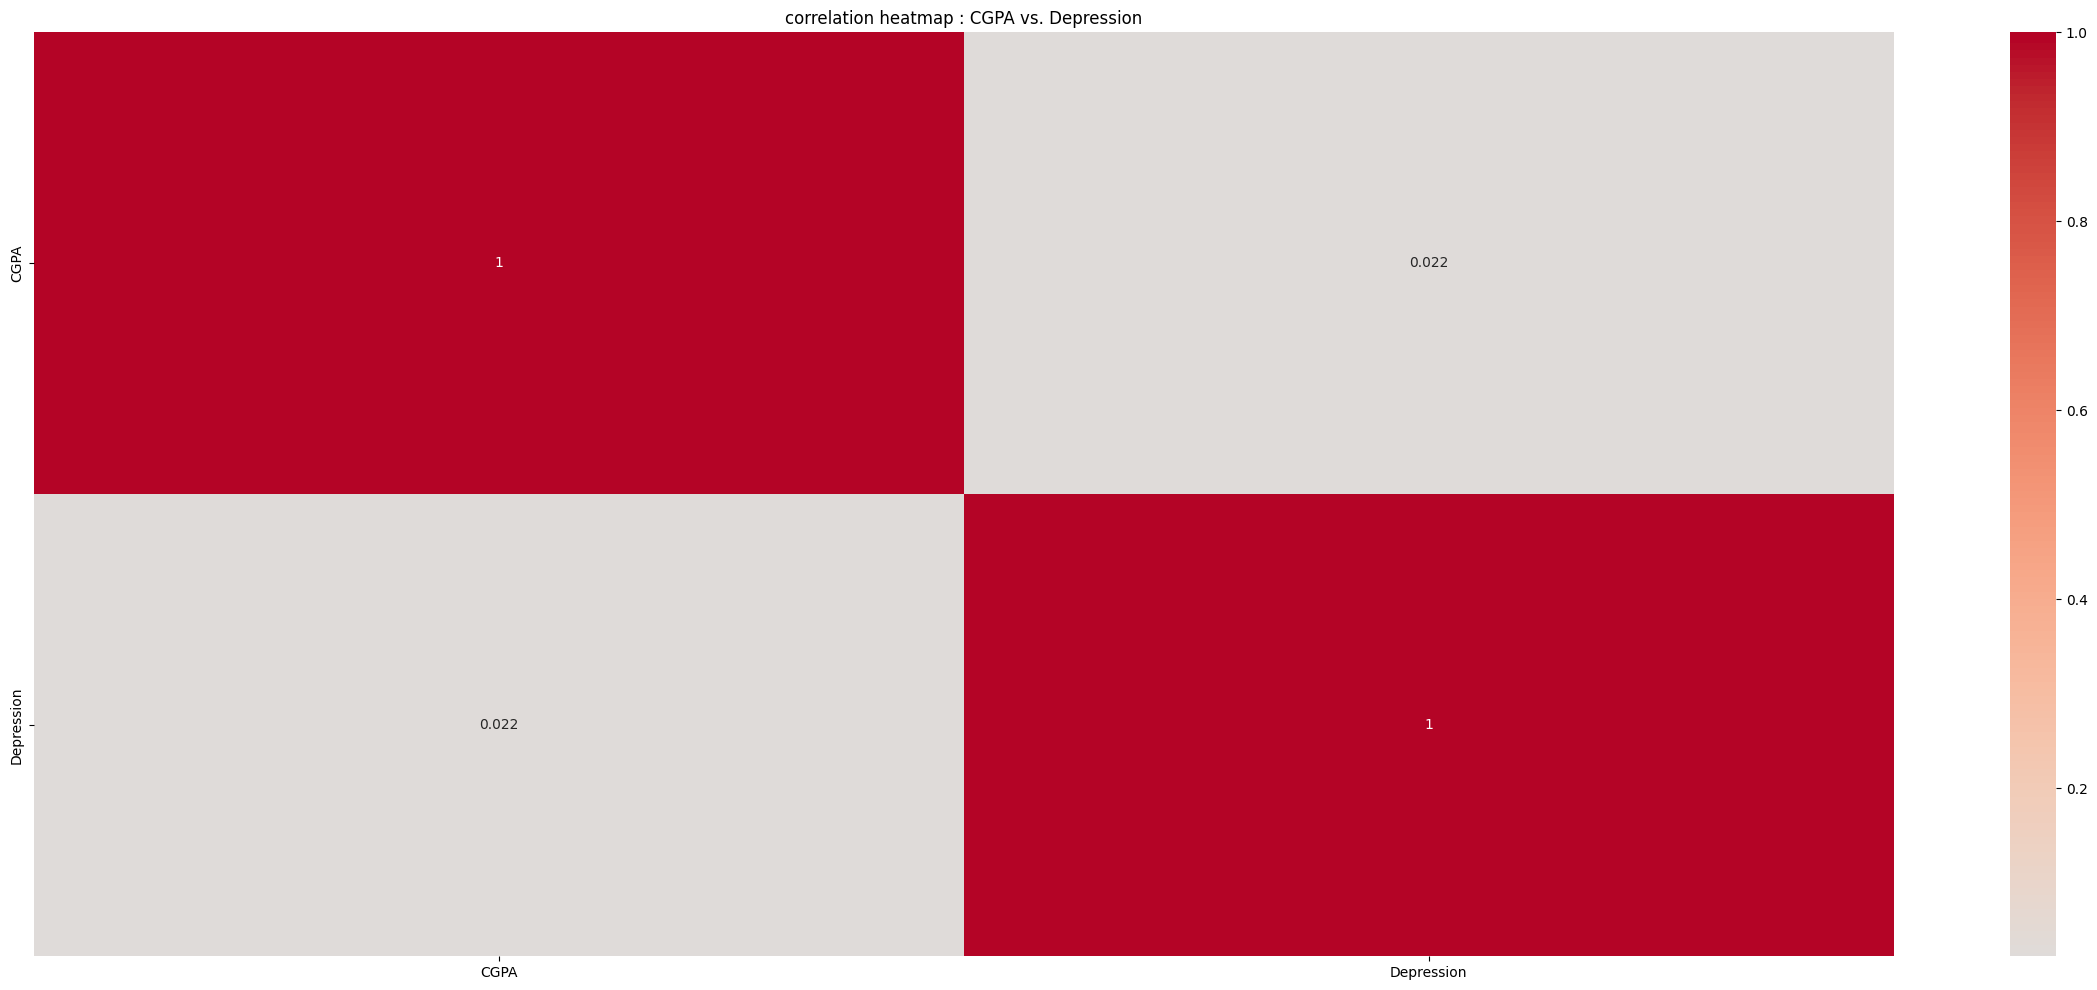

In [88]:
# Is CGPA has any impact on Depression

corr_matrix = df[['CGPA', 'Depression']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('correlation heatmap : CGPA vs. Depression')
plt.show()

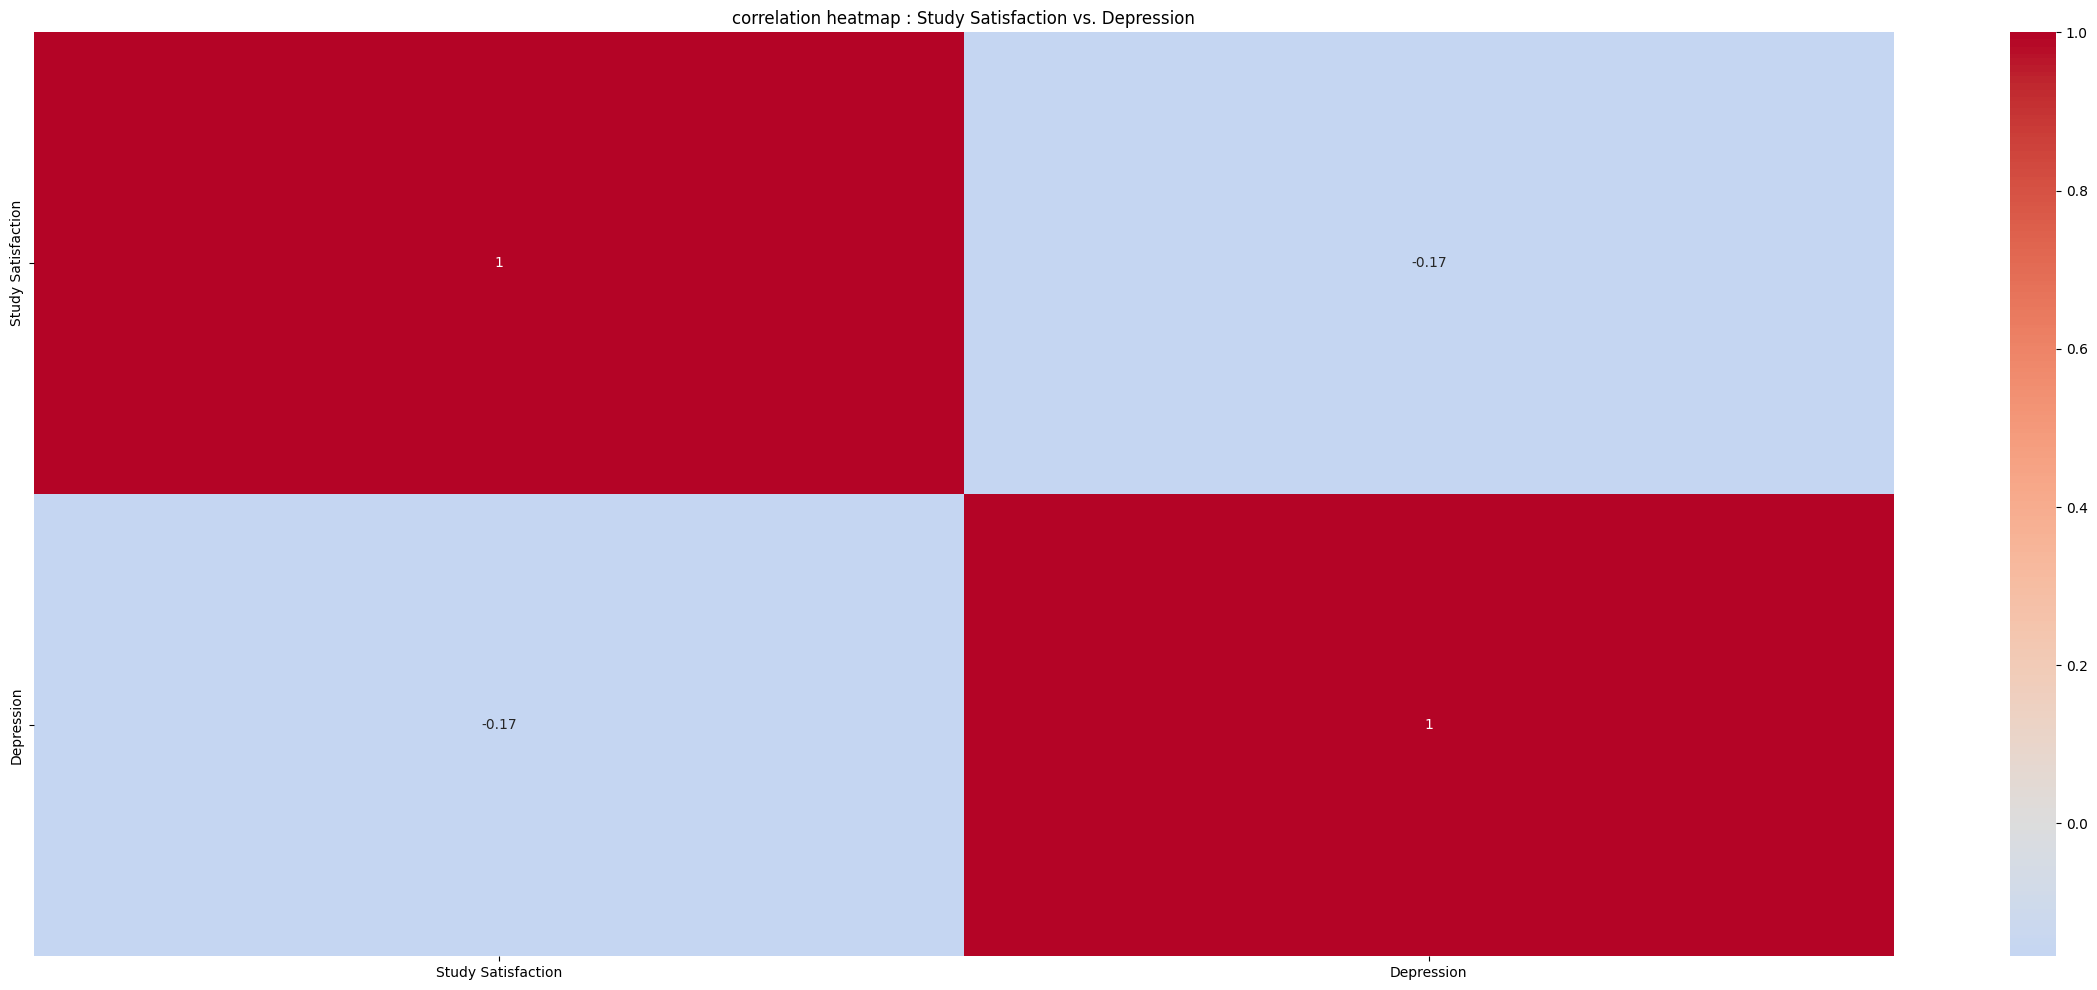

In [89]:
# Is Study Satisfaction has any impact on Depression

corr_matrix = df[['Study Satisfaction', 'Depression']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('correlation heatmap : Study Satisfaction vs. Depression')
plt.show()

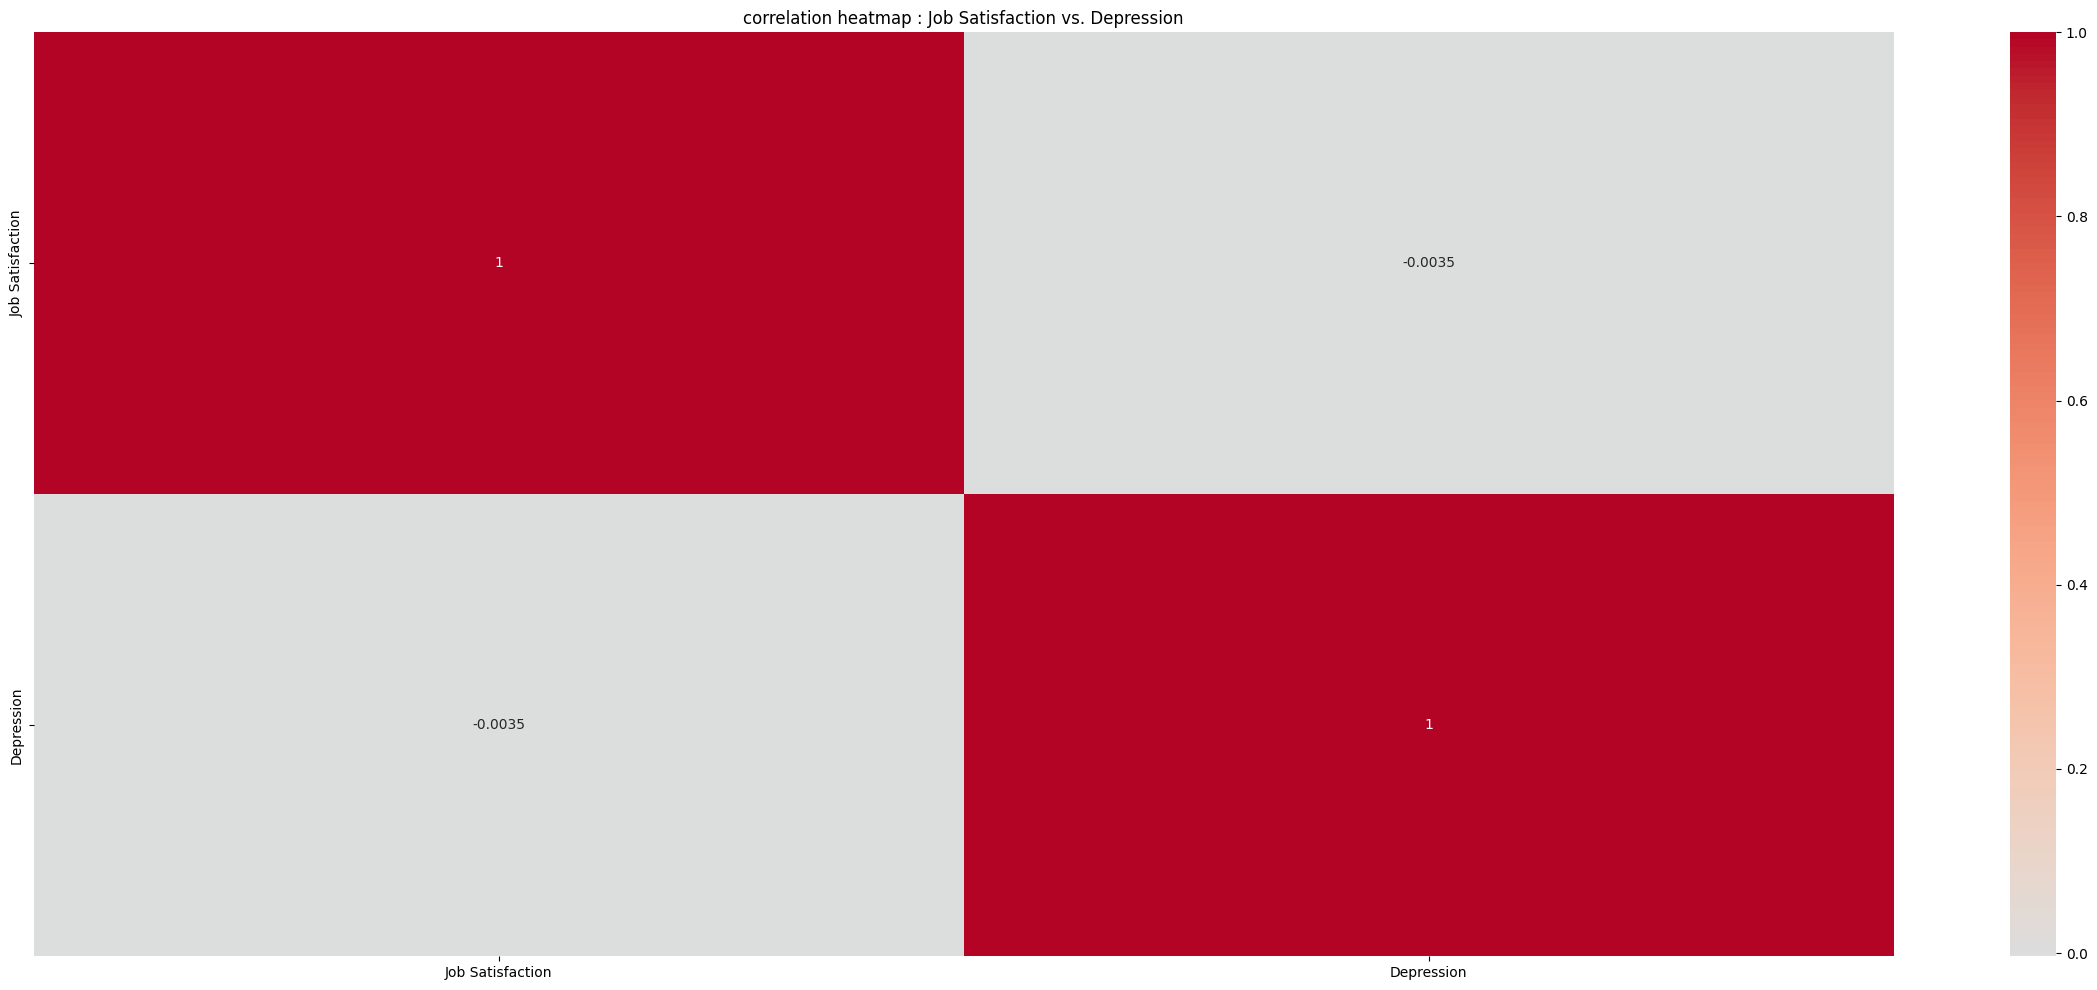

In [90]:
# Is Job Satisfaction has any impact on Depression

corr_matrix = df[['Job Satisfaction', 'Depression']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('correlation heatmap : Job Satisfaction vs. Depression')
plt.show()

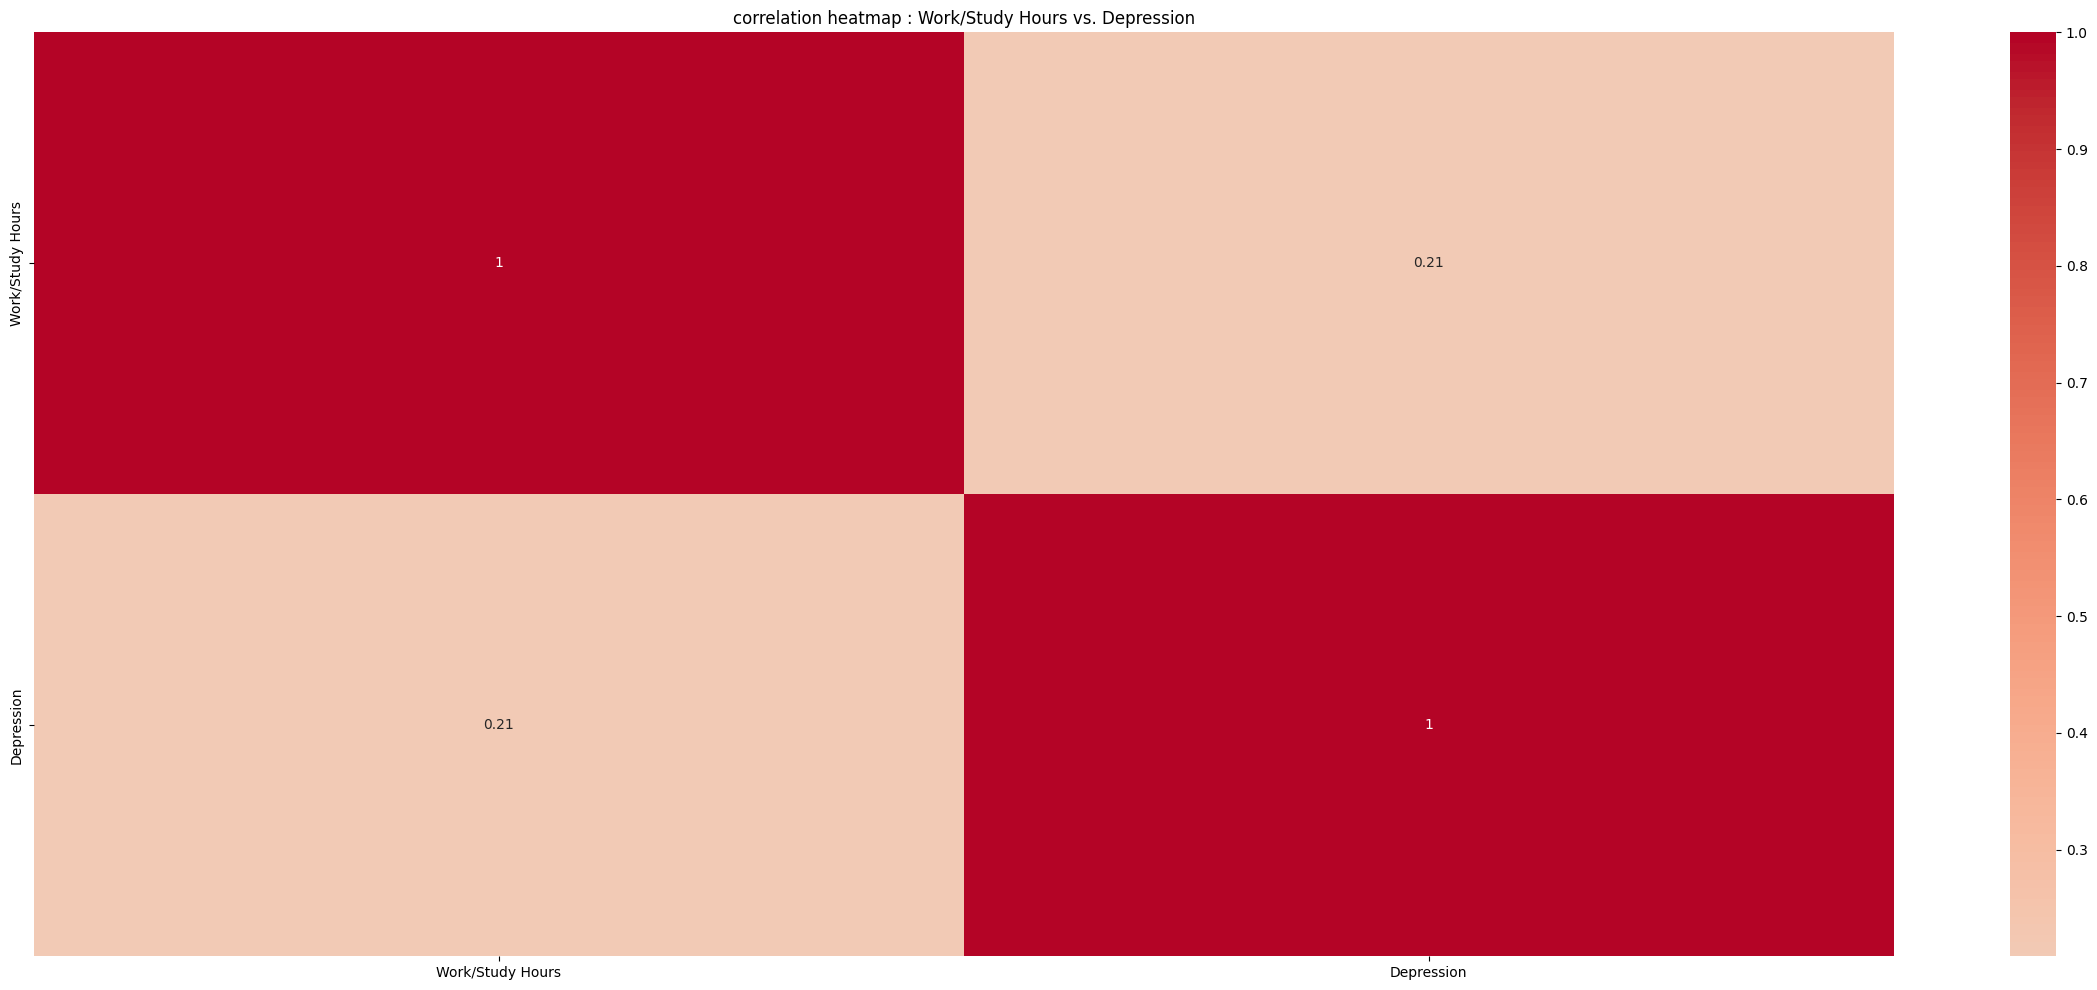

In [91]:
# Is Work/Study Hours has any impact on Depression

corr_matrix = df[['Work/Study Hours', 'Depression']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('correlation heatmap : Work/Study Hours vs. Depression')
plt.show()

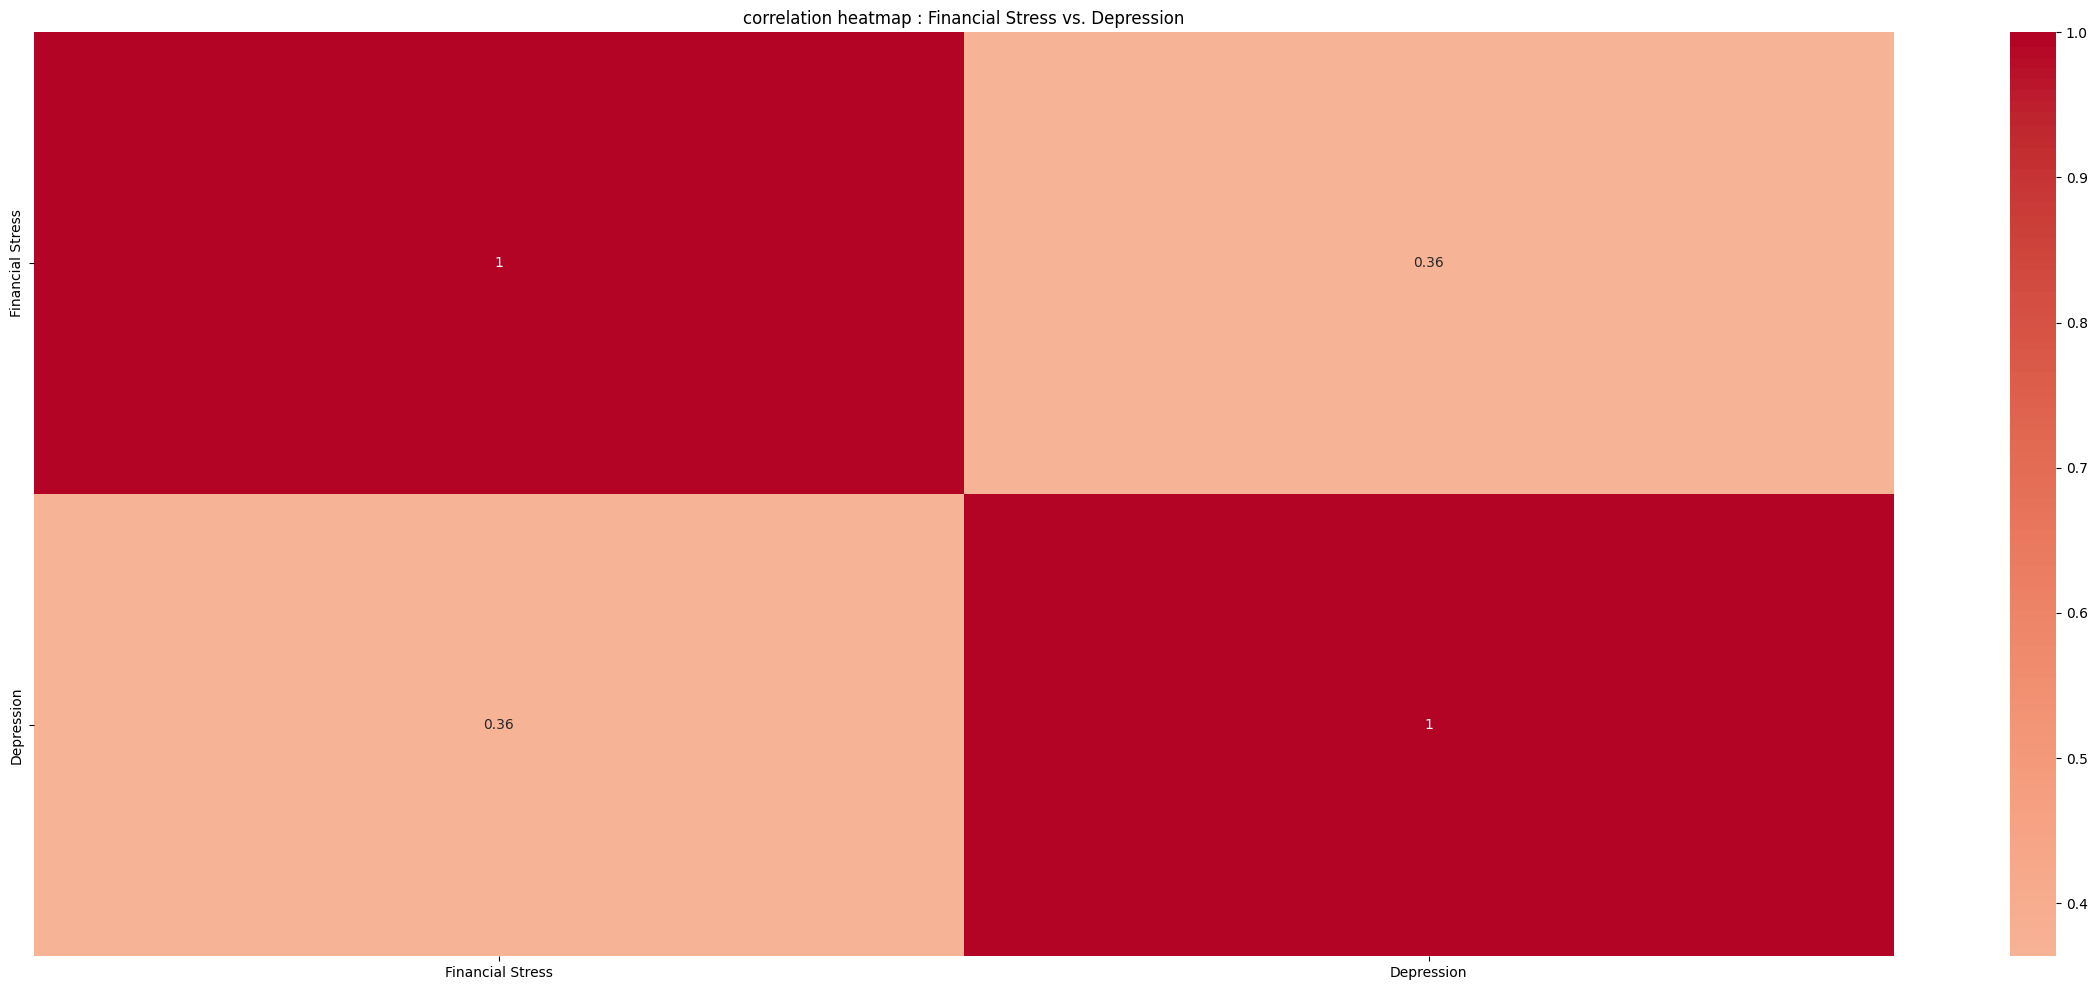

In [92]:
# Is Financial Stress Hours has any impact on Depression

corr_matrix = df[['Financial Stress', 'Depression']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('correlation heatmap : Financial Stress vs. Depression')
plt.show()

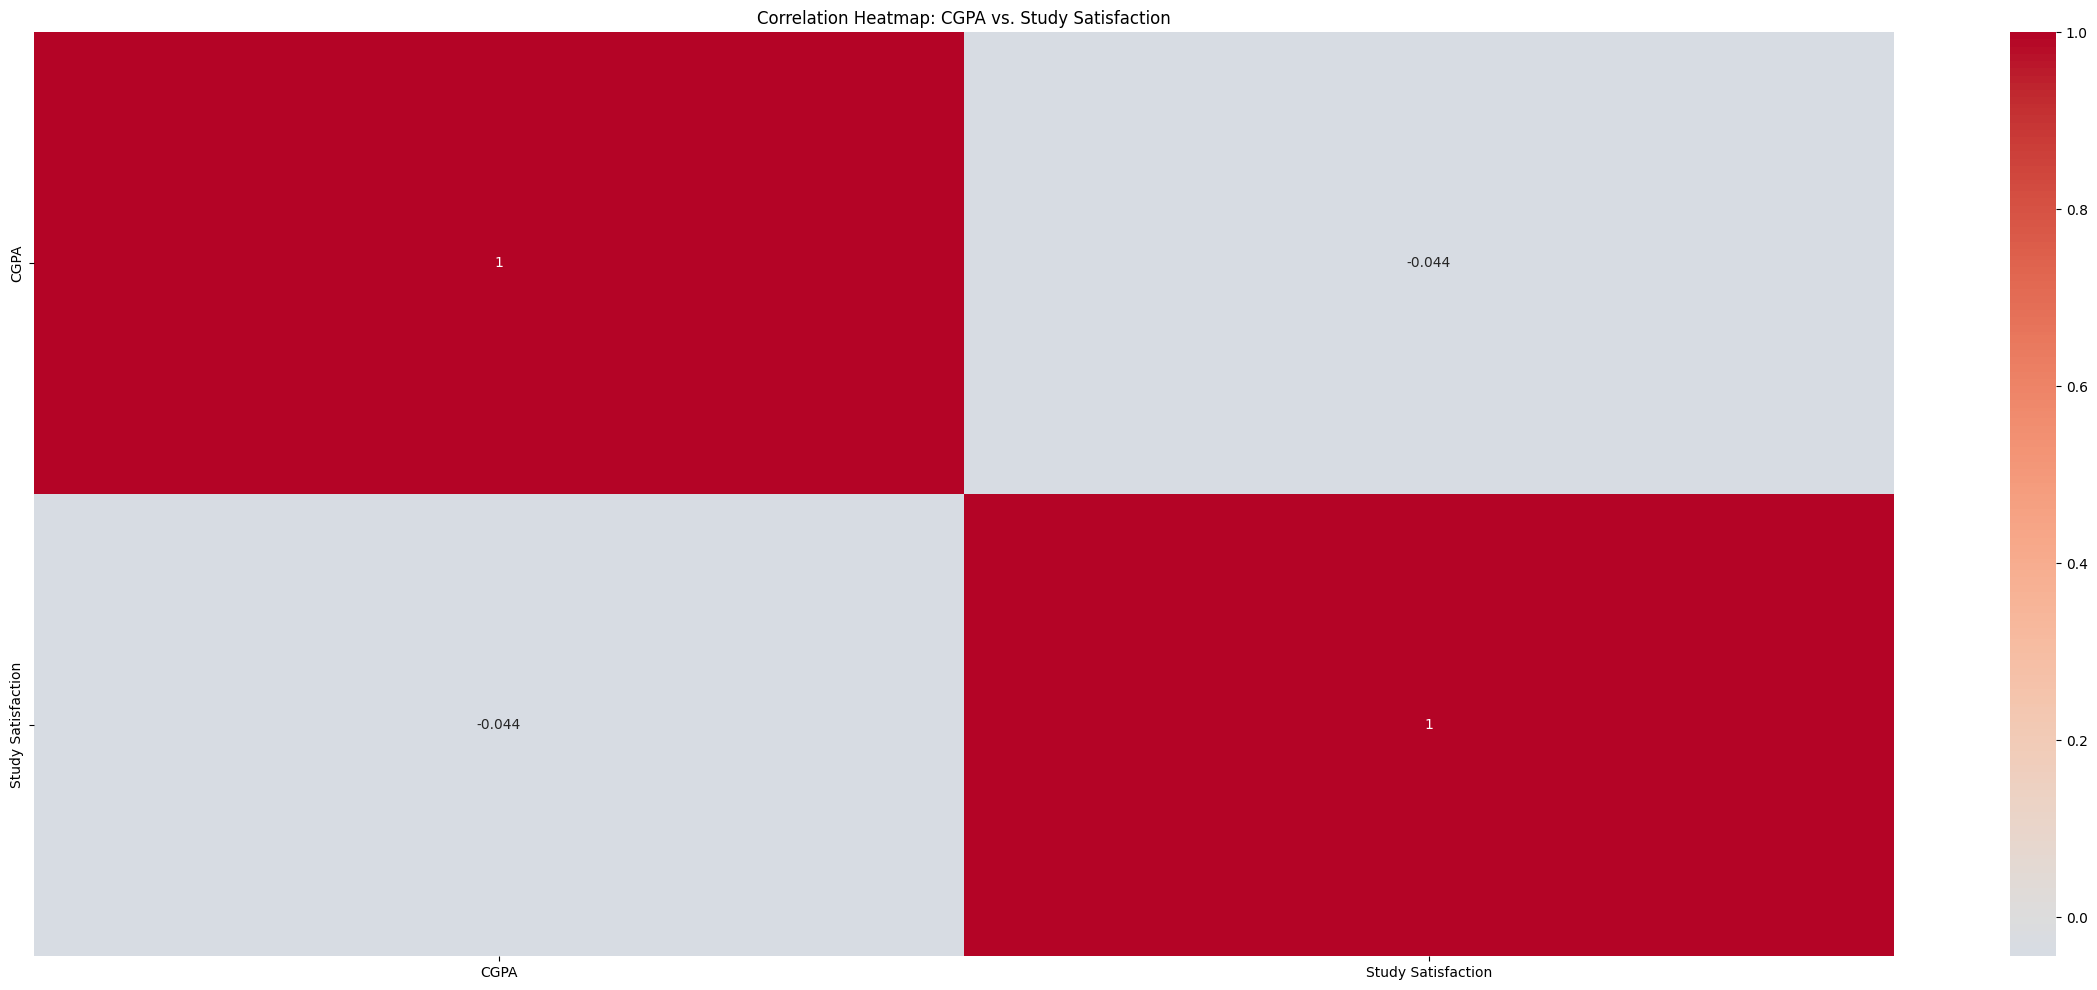

In [93]:
# CGPA vs. Study Satisfaction

corr_matrix = df[['CGPA', 'Study Satisfaction']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap: CGPA vs. Study Satisfaction')
plt.show()

**3. Categorical vs. Categorical**

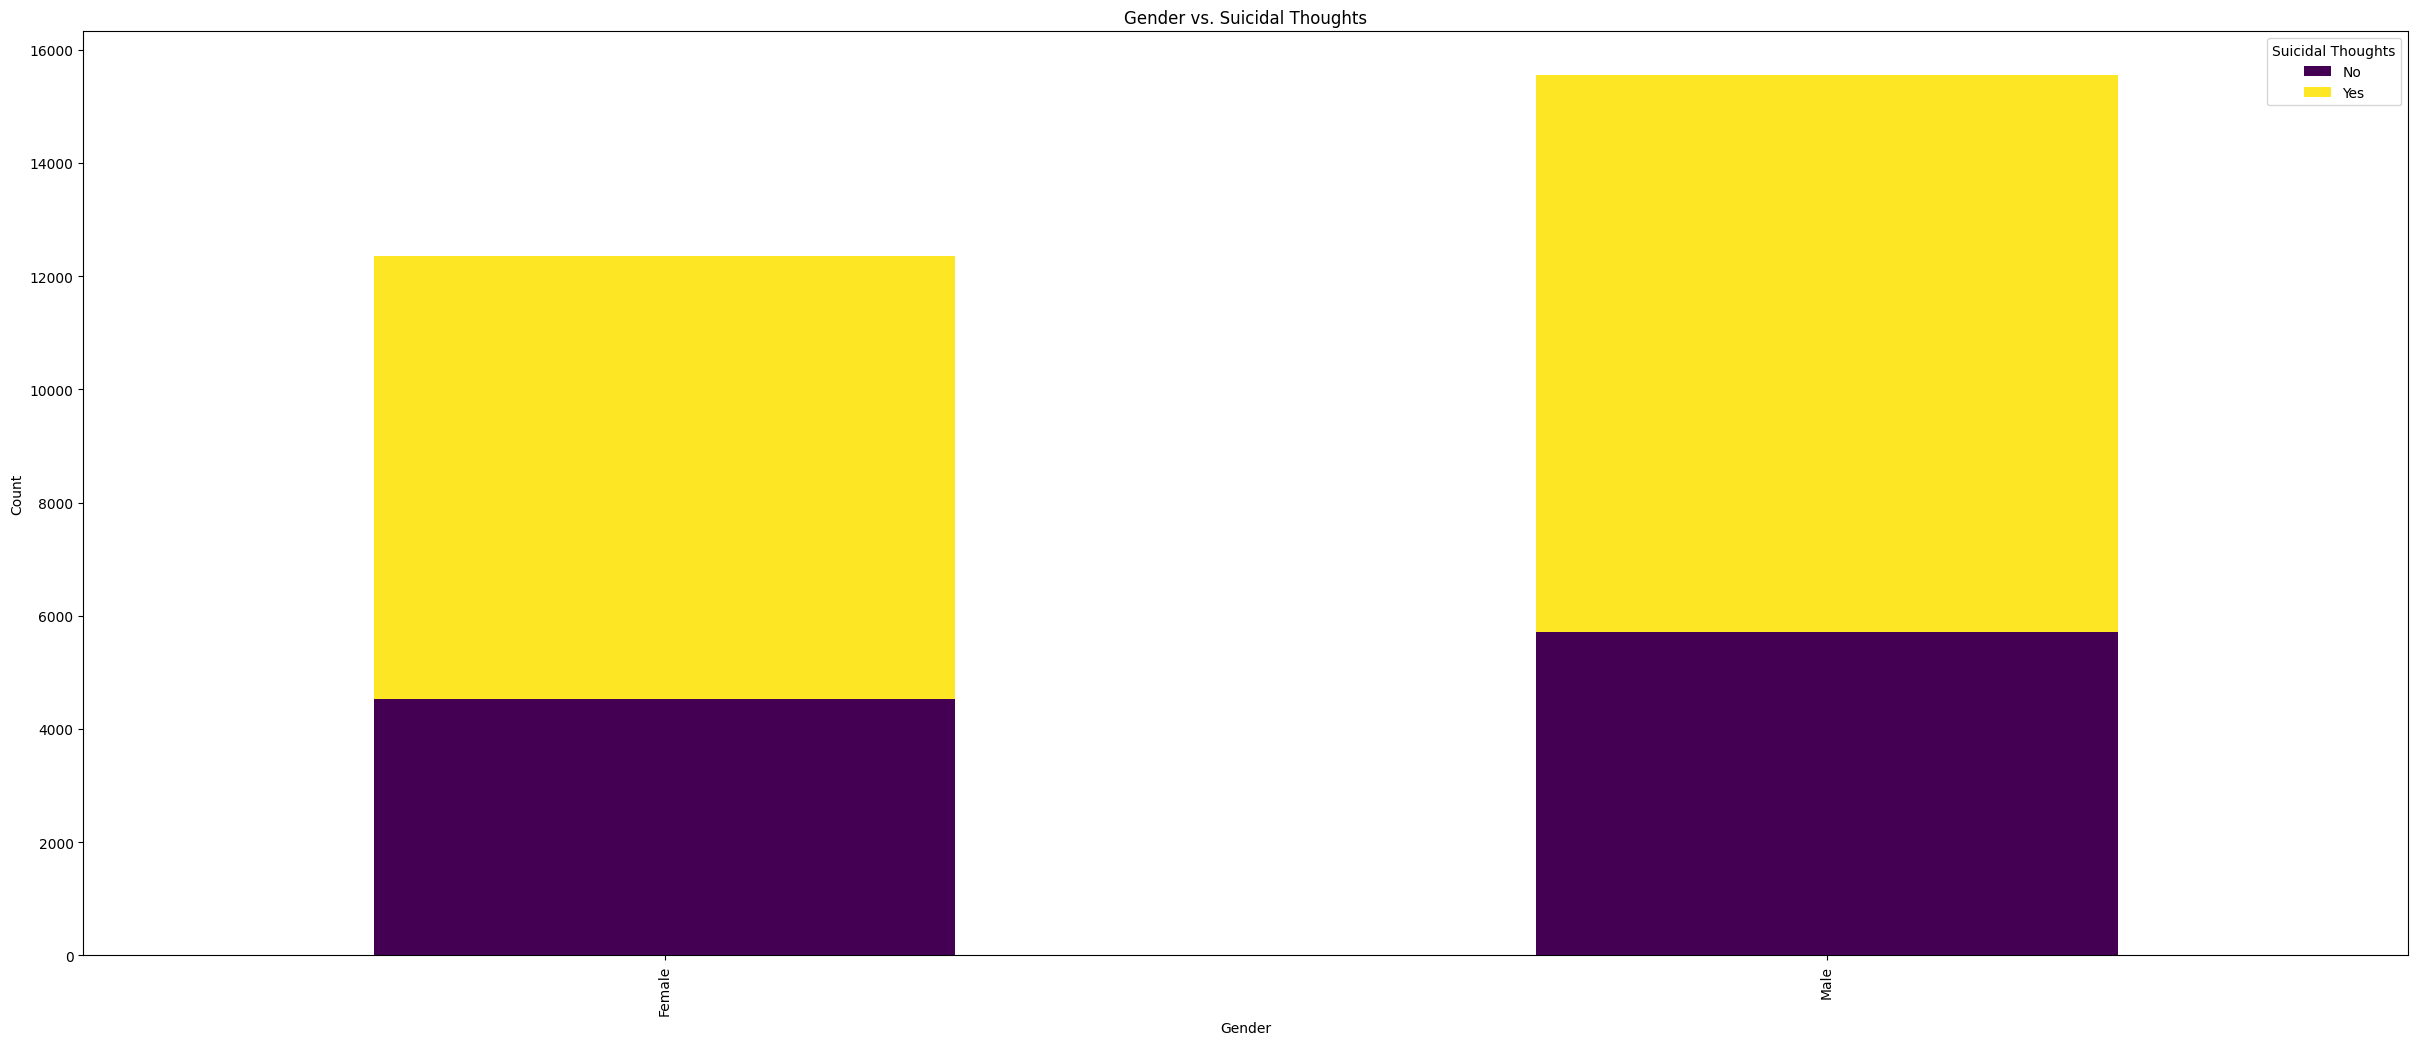

In [94]:
# Gender vs. Suicidal Thoughts

# Stacked Bar Chart
cross_tab = pd.crosstab(df['Gender'], df['Have you ever had suicidal thoughts ?'])
cross_tab.plot(kind='bar', stacked=True, colormap='viridis')

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender vs. Suicidal Thoughts')
plt.legend(title='Suicidal Thoughts')
plt.show()

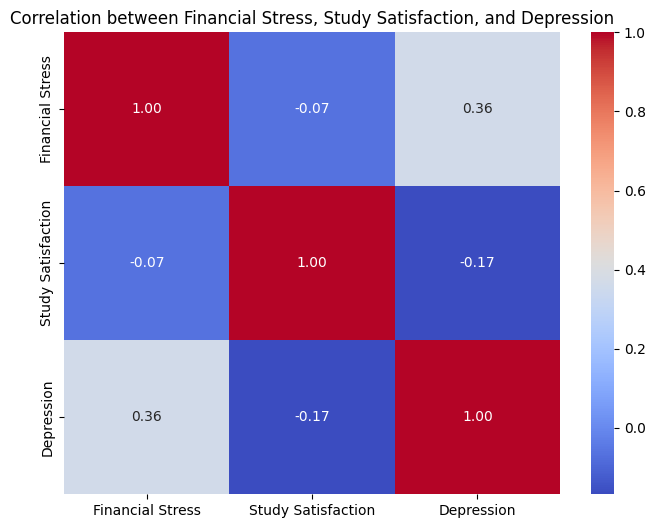

In [95]:
# checking If financial stress, study satisfaction, and depression have strong correlations, they might influence each other.

# Select relevant numerical columns
relevant_columns = ['Financial Stress', 'Study Satisfaction', 'Depression']

# Compute correlation matrix
corr_matrix = df[relevant_columns].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation between Financial Stress, Study Satisfaction, and Depression")
plt.show()

### <h2>Conclusions</h2>

#### **Mental Health is Influenced by Family History & Suicidal Thoughts**
- Students with a **family history of mental illness** are more likely to experience suicidal thoughts.
- **Mental health awareness** and **support systems** are crucial in academic environments.

#### **Academic & Work Pressure Impact Mental Well-being**
- Higher **academic and work pressure** contribute to increased stress levels and depressive tendencies.
- **Study satisfaction** plays a key role in reducing stress, but **CGPA alone does not determine mental health**.

#### **Lifestyle Choices Affect Mental Health**
- Poor **sleep duration** and **unhealthy dietary habits** are linked to higher stress and depression levels.
- Maintaining a **balanced lifestyle** with proper **sleep and diet** can improve mental well-being.

#### **Gender Differences in Mental Health Trends**
- **Gender-based differences** exist in mental health struggles, with varying levels of reported stress and depression.
- More **targeted interventions** may be needed based on **gender-specific mental health trends**.

#### **Future Implications**
- **Mental health support** should be integrated into academic institutions to help students manage stress.
- Further analysis is needed to explore deeper interactions between factors like **financial stress, study satisfaction, and depression**.
